# Práctica del Módulo: Deep Learning.
### Alumno: María Araceli Paredes Delgado

### Problema de regresión: Predecir el precio del airbnb utilizando los datos disponibles. 

#### Tarea

Implementar un algoritmo predictivo que sea capaz de estimar el precio de las habitaciones utilizando para ello datos de distintos tipos y técnicas de Deep Learning (redes neuronales profundas).

## Conjunto de datos

El conjunto de datos escogido es [éste](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets), extraído de Airbnb mediante técnicas de scraping. Se ha seleccionado la opción recomendada (“Only the 14780 selected records”), ya que minimiza el tiempo de ejecución y evita problemas de memoria en equipos con menos prestaciones.
El dataset fue "scrapeado" el 8 de abril del 2017 y contiene información de viviendas turísticas de la ciudad de Madrid.
Cada fila del dataset representa una vivienda disponible para el alquilé en Airbnb y cada columna describe las caracterísitcas de esa vivienda.




NOTA: Toda la primera parte de esta práctica correspondiente al limpiado y procesamiento de los datos es común a la práctica de Machine Learning. 
La parte exclusiva del módulo Deep Learning comienza en el **punto 6** por lo que se puede ir a este punto donde se descarga el dataset ya tratado y limpio tras todos los pasos anteriores

# 0.- Estructura del proyecto

En el enlace que he compartido al entregar la práctica se tiene acceso además de al archivo .ipynb a una serie de carpetas:

**data**

*airbnb_listings.csv*:  Es el dataset original de airbnb, la versión reducida

*airbnb_cleaned*: Es el dataset ya limpio y preparado. El el resultado de los siguientes 5 puntos de la práctica y fue también el obtenido en el módulo de Machine Learning

*airbnb_segun_img: Este esl el dataset limpio y ordenado según las imágenes que tenemos y como se haya realizado la carga de estas. Se usará cuando se combinen datos numéricos e imágenes para el modelo. Este archivo se obtiene en el punto 8.2 de la práctica

**imagenes**

Son todas las imágenes descargas partiendo del campo "Picture URL" que está en el dataset de airbnb. El nombre de cada archivo coinicide con el ID del anuncio de airbnb. La descarga de estas imágenes se realiza en el punto 8.1 de la práctica

**datasetImagenes**

*X.pickle*: es el dataset ya preparado extraido desde las imágenes, contiene una estructura (1271x50x50x3)

*Y.pickle*: es el dataset con los precios extraidos a partir del ID de las imágenes y buscando en el dataset de airbnb

Estos dos archivos se obtienen en el punto 8.2


            

**En la práctica yo he montado Drive para poder acceder desde este Colab y así poder escribir y leer archivos. Coloco ahora tras este comentario una variable Ruta que contiene mi actual path dentro de Drive donde está la estructura del proyecto anterior y que se tendrá que cambiar a la hora de revisar esta práctica, cuando se haga la copia a otro Drive. Al tener estos archivos donde he ido guardando los resultados intermedios se pueden probar diferentes puntos de la práctica de forma independiente**

In [0]:
ruta = "/content/gdrive/My Drive/KeepCoding/DeepLearning/"

# 1.- Librerias necesarias

In [0]:
# cargo librerías necesarias
import numpy  as np  
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score




import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 2.- Carga de datos

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#La definición de la ruta en drive está en el punto 0 de la práctica
path_csv = ruta + 'data/airbnb-listings.csv'
house_data1 = pd.read_csv(path_csv, sep =';', decimal='.') # cargamos fichero
print(f"El dataset original contiene {len(house_data1)} viviendas Airbnb con {len(house_data1.columns)} características")
pd.set_option('display.max_columns', len(house_data1)) # Para ver todas las columnas
house_data1.head(5) 

El dataset original contiene 14780 viviendas Airbnb con 89 características


ID                            Listing Url       Scrape ID  \
0  11210388  https://www.airbnb.com/rooms/11210388  20170306202425   
1  17471131  https://www.airbnb.com/rooms/17471131  20170407214050   
2  17584891  https://www.airbnb.com/rooms/17584891  20170407214050   
3   5398030   https://www.airbnb.com/rooms/5398030  20170407214050   
4  18104606  https://www.airbnb.com/rooms/18104606  20170407214050   

  Last Scraped                                 Name  \
0   2017-03-07       The Loft-Full Bath-Deck w/View   
1   2017-04-08           Claris I, Friendly Rentals   
2   2017-04-08  Style Terrace Red, Friendly Rentals   
3   2017-04-08    Picasso Suite 1.4 Paseo de Gracia   
4   2017-04-08       Smart City Centre Apartment II   

                                             Summary  \
0  Loft in the Hill country 12-15 minutes directl...   
1  This apartment has: 1 double bed, 1 double sof...   
2  This apartment has: 1 double bed, 1 double sof...   
3  Live like a local in Barcelona's most chic dis...   
4  Unique apartment in vibrant neighborhoods, car...   

                                               Space  \
0  This loft has a spectacular view of the hills ...   
1  This apartment has: 1 double bed, 1 double sof...   
2  This apartment has: 1 double bed, 1 double sof...   
3  You wake up to the sun rising over Barcelona's...   
4  License: HUTB-005313 Charming apartment, locat...   

                                         Description Experiences Offered  \
0  Loft in the Hill country 12-15 minutes directl...                none   
1  This apartment has: 1 double bed, 1 double sof...                none   
2  This apartment has: 1 double bed, 1 double sof...                none   
3  Live like a local in Barcelona's most chic dis...                none   
4  Unique apartment in vibrant neighborhoods, car...                none   

                               Neighborhood Overview  \
0  This neighborhood is located in the hills west...   
1  Plaza   Cataluña Catalonia Square is the large...   
2  Plaza   Cataluña Catalonia Square is the large...   
3  We're right in the heart of the chic L'Eixampl...   
4                                                NaN   

                                               Notes  \
0  The loft is located on a gated property.  Ther...   
1                                                NaN   
2                                                NaN   
3                          Local permit: HUTB-006794   
4                                                NaN   

                                             Transit  \
0  There is no public transportation from this lo...   
1  Ideal to discover the city either on foot or b...   
2  Ideal to discover the city either on foot or b...   
3  Whatever it is you came to see in Barcelona, I...   
4                                                NaN   

                                              Access  \
0  The loft is entirely private to the guest as i...   
1  Travellers will have access to the entire apar...   
2  Travellers will have access to the entire apar...   
3  This property features keyless entry, making i...   
4                                                NaN   

                                         Interaction  \
0  My wife and I live on the property so we would...   
1  We will be more than happy to help you with an...   
2  We will be more than happy to help you with an...   
3  I'm an Aussie who's lived in Barcelona for alm...   
4                                                NaN   

                                         House Rules  \
0  The loft is entirely private but is adjacent t...   
1  CHECK-IN Week Days: The check-in and key colle...   
2  CHECK-IN Week Days: The check-in and key colle...   
3  Welcome to Barcelona! This will be your home n...   
4                                                NaN   

                                       Thumbnail Url  \
0  https://a0.muscache.com/im/pictures/c351a9b5-

In [0]:
#Compruebo los tipos de datos que tenemos
dato = house_data1.dtypes
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

# 3.- Limpiado y preprocesamiento de datos
### 3.1.- Eliminación de columnas iniciales

Elimino columnas de URLs y de texto que no son útiles para la predicción de precio. A los textos quizás se le podría aplicar algún tipo de procesamiento de lenguaje pero no los voy a usar en este caso para la creación del modelo, aunque podría ser una mejora a futuro.

Para la práctica de DeepLearning dejo las columnas 'ID' y 'Picture Url'

In [0]:
caracteristicas_para_borrar = ['Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary','Space', 'Description', 
                               'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
                              'Thumbnail Url', 'Medium Url', 'XL Picture Url', 'Host ID', 'Host URL',
                              'Host Name', 'Host Location', 'Host About', 'Host Thumbnail Url', 'Host Picture Url',
                              'Host Neighbourhood', 'Host Verifications', 'Calendar last Scraped' 
                              ]

house_data1.drop (caracteristicas_para_borrar, axis=1, inplace=True)

Compruebo si hay características que tengan la mayoría de sus valores vacios y si es así las elimino también

In [0]:
dato =house_data1.isna().sum ()
pd.set_option('max_rows', len(dato)) # Para ver todos
dato


ID                                    0
Experiences Offered                   0
Picture Url                          19
Host Since                            3
Host Response Time                 1899
Host Response Rate                 1899
Host Acceptance Rate              14741
Host Listings Count                   3
Host Total Listings Count             3
Street                                0
Neighbourhood                      5229
Neighbourhood Cleansed                0
Neighbourhood Group Cleansed       1020
City                                  6
State                               144
Zipcode                             506
Market                               57
Smart Location                        0
Country Code                          0
Country                               1
Latitude                              0
Longitude                             0
Property Type                         0
Room Type                             0
Accommodates                          0


In [0]:
house_data1.drop (['Host Acceptance Rate', 'Square Feet', 'Weekly Price', 'Monthly Price', 'Has Availability', 'License',
                  'Jurisdiction Names'], axis=1, inplace=True)

Si analizo las características "Host Listings Count" y "Host Total Listings Count" parece que contiene la misma información.
Los compuebo:

In [0]:
print(sum((house_data1['Host Listings Count'] == house_data1 ['Host Total Listings Count']) == False))

3


Hay muy pocos valores diferentes que precisamente coincide con el número de Nan que hemos visto antes. Esto también lo hubiera visto al hacer el estudio de correlaciones. Voy entonces a eliminar una de ellas:

In [0]:
house_data1.drop (['Host Total Listings Count'], axis=1, inplace=True)

Elimino también la columna 'Calculated host listings count' que hace referencia a lo mismo

In [0]:
house_data1.drop (['Calculated host listings count'], axis=1, inplace=True)

Voy ahora a analizar algunas de las características que hay de localización para ver con cuales me quedo. En principio el dataset es de Madrid y el código del pais debería ser España. Voy a comprobar los valores que hay en City para ver si realmente tenemos solo Madrid.

### City

In [0]:
dato = house_data1.City.value_counts()
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

Madrid                                 13207
Barcelona                                292
London                                   132
Paris                                    108
马德里                                       52
Palma                                     49
Alcúdia                                   40
Berlin                                    40
Dublin                                    40
New York                                  38
Roma                                      37
Los Angeles                               35
Brooklyn                                  27
Amsterdam                                 26
Wien                                      25
Madrid, Comunidad de Madrid, ES           20
Rome                                      18
Palma de Mallorca                         16
Washington                                14
Toronto                                   14
Selva                                     13
Inca                                      13
Búger     

Podemos ver que el dataset es muy ruidoso y aunque en teoria es para Madrid hay un montón de ciudades.
Tenemos además 4 valores Nan que hemos visto antes en City. Esos valores nulos los voy a eliminar.


In [0]:
house_data1.dropna(subset=['City'], inplace=True) 

Ahora ya no debería tener nulos en la columna City

In [0]:
house_data1.City.isna().sum ()

0

Analizando lo que tengo en City puedo comprobar que estos valores son los correspondientes a Madrid:

Madrid 

Madrid, Comunidad de Madrid, ES

madrid  


MADRID


Madrid, Comunidad de Madrid, ESPANA

Madid

Chueca, Madrid  

Comunidad de Madrid

Aravaca (Madrid)

Delicias 

las matas  madrid

Madri

Centro, Madrid 

Delicias-Madrid

Madrid, Vallecas (Fontarrón) 

Voy a construir un dataset solo con las filas que contienen solo esos valores:

In [0]:
house_madrid = house_data1 [house_data1.City.str.contains("Madrid", case=False) |
               house_data1.City.str.contains("Madrid,", case=False) |
               house_data1.City.str.contains("Madid", case=False) |
               house_data1.City.str.contains("(Madrid)", case=False) |
               house_data1.City.str.contains("Delicias", case=False) |
               house_data1.City.str.contains("Delicias-Madrid", case=False)]


In [0]:
#Compruebo que efectivamente ya solo tengo viviendas de Madrid
dato = house_madrid.City.value_counts()
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

Madrid                                 13207
Madrid, Comunidad de Madrid, ES           20
madrid                                     8
MADRID                                     2
Madrid, Comunidad de Madrid, ESPANA        1
Madrid, Vallecas (Fontarrón)               1
Aravaca (Madrid)                           1
las matas  madrid                          1
Centro, Madrid                             1
Chueca, Madrid                             1
Delicias-Madrid                            1
Delicias                                   1
Madid                                      1
Comunidad de Madrid                        1
Name: City, dtype: int64

Ahora que ya tengo que todo es de Madrid puedo descartar esta columna

In [0]:
house_madrid.drop (['City'], axis=1, inplace=True)

Tras haber ya filtrado por la ciudad y haber dejado el dataset más limpio hay más columnas relativas a la localización. Puedo quedarme solo con una de ellas. Analizando los NA que me daban antes me voy a quedar con la característica Neighbourhood Cleansed que no tenía nulos y que utilizaré por tanto como columna de localización.
Voy a eliminar por tanto: State, Street, Neighbourhood, Neighbourhood Group Cleansed, Zipcode, Market, Smart Location,  Country Code, Country, Latitude, Longitude, Geolocation

In [0]:
house_madrid.drop (['State', 'Street', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'Zipcode', 'Market', 
                    'Smart Location',  'Country Code', 'Country', 'Latitude', 'Longitude', 'Geolocation'], axis=1, inplace=True)

### 4.2.- Limpieza de columnas individuales

A continuación voy a ir analizando cada una de las características que he conservado. 



### Price

Es nuestra variable objetivo. Voy a comprobar que no haya nulos. Si los hay elimino esas observaciones 

In [0]:
house_madrid ['Price'] = pd.to_numeric(house_madrid ['Price']) 

In [0]:
print("Valores nulos:", house_madrid['Price'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Price'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 9
Proporcion: 0.1%


In [0]:
house_madrid.dropna(subset=['Price'], inplace=True) 

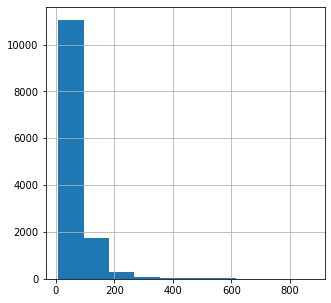

In [0]:
#Puedo ver la distribución también con un histograma
house_madrid['Price'].hist(figsize=(5,5));

### Experiences Offered

Compruebo los valores que puede tener esta caractística

In [0]:
house_madrid ['Experiences Offered'].value_counts()


none    13238
Name: Experiences Offered, dtype: int64

Todo el listado tiene en esta característica el valor none, por tanto la puedo eliminar

In [0]:
house_madrid.drop (['Experiences Offered'], axis=1, inplace=True)

### Host Since
Esta característica representa el momento en el que el propietario se une a Airbnb. Es una columna que habría que tranformar para que fuera de tipo datatime. Una vez transformada la voy a convertir en una medida del número de dias que ha estado la vivienda en la plataforma tomando la fecha de scraped de datos que era 8 de abril del 2017. Creo por tanto una nueva columna que se llamará Dias_activo y al final podré eliminar la columna Host Since

In [0]:
#Convierto a datatime
house_madrid ['Host Since'] = pd.to_datetime(house_madrid ['Host Since']) 
# Calculo el número de dias
house_madrid['Dias_activo'] = (datetime(2017, 4, 8) - house_madrid['Host Since']).astype('timedelta64[D]')
# Media y mediana
print("Media de dias como host:", round(house_madrid['Dias_activo'].mean(),0))
print("Mediana de dias como host:", house_madrid['Dias_activo'].median())

# Si hay valores nulos los sustituyo por la mediana
mediana_host_since = house_madrid.Dias_activo.median()  #Guardo este valor para usarlo después con las muestras de test
house_madrid.Dias_activo.fillna(house_madrid.Dias_activo.median(), inplace=True)


Media de dias como host: 905.0
Mediana de dias como host: 788.0


In [0]:
house_madrid.head(3)

ID                                        Picture Url Host Since  \
40   6478626  https://public.opendatasoft.com/api/v2/catalog... 2015-01-06   
41   4941335  https://public.opendatasoft.com/api/v2/catalog... 2015-01-01   
42  12510355  https://public.opendatasoft.com/api/v2/catalog... 2016-04-18   

    Host Response Time  Host Response Rate  Host Listings Count  \
40      within an hour                84.0                  3.0   
41  within a few hours               100.0                  1.0   
42      within an hour               100.0                  2.0   

   Neighbourhood Cleansed Property Type        Room Type  Accommodates  \
40             Niño Jesús     Apartment     Private room             2   
41              Recoletos     Apartment  Entire home/apt             2   
42              Recoletos     Apartment  Entire home/apt             3   

    Bathrooms  Bedrooms  Beds  Bed Type  \
40        2.0       1.0   1.0  Real Bed   
41        1.0       0.0   1.0  Real Bed   
42        1.0       0.0   2.0  Real Bed   

                                            Amenities  Price  \
40  TV,Wireless Internet,Kitchen,Heating,Essential...   28.0   
41  TV,Internet,Wireless Internet,Air conditioning...   58.0   
42  TV,Internet,Wireless Internet,Air conditioning...   70.0   

    Security Deposit  Cleaning Fee  Guests Included  Extra People  \
40               NaN           NaN                1             5   
41             100.0           NaN                1             0   
42             150.0          30.0                2            15   

    Minimum Nights  Maximum Nights Calendar Updated  Availability 30  \
40               1            1125      2 weeks ago                0   
41               2            1125       6 days ago                4   
42               2            1125            today                7   

    Availability 60  Availability 90  Availability 365  Number of Reviews  \
40                3               12               240                171   
41                9                9                15                 52   
42               15               32               292                 36   

   First Review Last Review  Review Scores Rating  Review Scores Accuracy  \
40   2015-06-14  2017-03-22                  87.0                     9.0   
41   2015-03-02  2017-02-12                  96.0                    10.0   
42   2016-05-15  2017-04-02                  87.0                     9.0   

    Review Scores Cleanliness  Review Scores Checkin  \
40                        9.0                    9.0   
41                       10.0                   10.0   
42                        9.0                   10.0   

    Review Scores Communication  Review Scores Location  Review Scores Value  \
40                          9.0                     9.0                  9.0   
41                         10.0                    10.0                 10.0   
42                         10.0                    10.0                  9.0   

   Cancellation Policy  Reviews per Month  \
40            flexible               7.71   
41            moderate               2.03   
42            flexible               3.28   

                                             Features  Dias_activo  
40  Host Has Profile Pic,Requires License,Instant ...        823.0  
41  Host Has Profile Pic,Is Location Exact,Require...        828.0  
42  Host Has Profile Pic,Host Identity Verified,Is...        355.0

Tras realizar la transformación elimino la columna original

In [0]:

house_madrid.drop (['Host Since'], axis=1, inplace=True)

### Host Response Time

Esta característica indica el promedio de tiempo que tarda el host en responder a los mensajes. Es de tipo categórico

In [0]:
print("Valores nulos:", house_madrid['Host Response Time'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Host Response Time'].isna().sum()/len(house_madrid))*100, 1)}%")



Valores nulos: 1657
Proporcion: 12.5%


Un 12,5% es desconocido. Voy a ver el resto de posibles valores

In [0]:
house_madrid ['Host Response Time'].value_counts()

within an hour        7132
within a few hours    2657
within a day          1524
a few days or more     268
Name: Host Response Time, dtype: int64

A los valores nulos le voy a dar la categoría de 'desconocido'

In [0]:
house_madrid ['Host Response Time'].fillna("unknown", inplace=True)

In [0]:
house_madrid ['Host Response Time'].value_counts()

within an hour        7132
within a few hours    2657
unknown               1657
within a day          1524
a few days or more     268
Name: Host Response Time, dtype: int64

Tenemos por tanto que 'Host Response Time' es una variable categórica con 5 posibles valores. 

### Host Response Rate

Esta característica representa el porcentaje de mensajes a los que el anfitrión responde. Es de tipo continuo. 



In [0]:
house_madrid ['Host Response Rate'] = pd.to_numeric(house_madrid ['Host Response Rate']) 

Voy a comprobar al igual que antes el número de nulos que tengo


In [0]:
print("Valores nulos:", house_madrid['Host Response Rate'].isna().sum())
print(f"Proporcion: {round((house_madrid['Host Response Rate'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 1657
Proporcion: 12.5%


Miro la mediana y media de esta característica y también el porcentaje que hay del 100%

In [0]:
print("Media host response rate:", round(house_madrid['Host Response Rate'].mean(),0))
print("Mediana host response rate:", house_madrid['Host Response Rate'].median())
print(f"Proporcion de 100% host response rates: {round(((house_madrid['Host Response Rate'] == 100.0).sum()/house_madrid['Host Response Rate'].count())*100,1)}%")

Media host response rate: 95.0
Mediana host response rate: 100.0
Proporcion de 100% host response rates: 76.8%


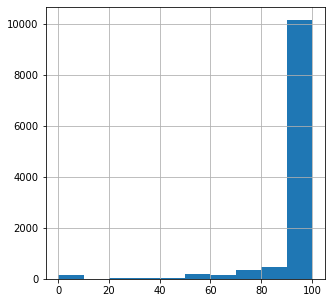

In [0]:
#Puedo ver la distribución también con un histograma
house_madrid['Host Response Rate'].hist(figsize=(5,5));

In [0]:
# Los agrupo en 4 categorías
house_madrid['Host Response Rate'] = pd.cut(house_madrid['Host Response Rate'], 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Convierto a cadena
house_madrid['Host Response Rate'] = house_madrid['Host Response Rate'].astype('str')

# Sustituyo los null por 'unknown'
house_madrid['Host Response Rate'].replace('nan', 'unknown', inplace=True)

# 
house_madrid['Host Response Rate'].value_counts()

100%       8894
unknown    1657
50-89%     1304
90-99%      969
0-49%       414
Name: Host Response Rate, dtype: int64

La transformo en una variable de tipo categórico

### Host Listings Count

Esta característica representa el número de viviendas que tiene el anfitrión en total y es de tipo continuo.



In [0]:
house_madrid ['Host Listings Count'] = pd.to_numeric(house_madrid ['Host Listings Count']) 

Voy a comprobar si tengo valores nulos

In [0]:
print("Valores nulos:", house_madrid['Host Listings Count'].isna().sum())
print(f"Proporcion: {round((house_madrid['Host Listings Count'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 3
Proporcion: 0.0%


Miro la mediana y media de esta característica

In [0]:
print("Media Host Listings Count:", round(house_madrid['Host Listings Count'].mean(),0))
print("Mediana Host Listings Count:", house_madrid['Host Listings Count'].median())


Media Host Listings Count: 10.0
Mediana Host Listings Count: 2.0


Los 3 valores nulos los sustiuiré  por la mediana una vez haga tratamiento de outliers

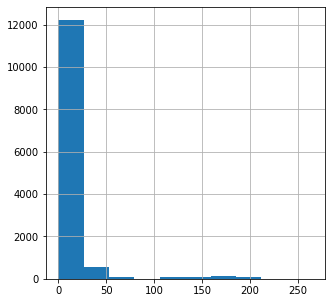

In [0]:
#Puedo ver la distribución también con un histograma
house_madrid['Host Listings Count'].hist(figsize=(5,5));

### Neighbourhood Cleansed

Esta característica representa el barrio de Madrid en el que está la vivienda y es de tipo categórico
Voy a comprobar los valores que tiene. Al principio ya comprobé que no tenía nulos. De todas formas para el caso de presentación de nuevos valores si hubiera nulos los elimino

In [0]:
house_madrid.dropna(subset=['Neighbourhood Cleansed'], inplace=True) 

In [0]:
house_madrid ['Neighbourhood Cleansed'].value_counts()

Embajadores       1848
Universidad       1361
Palacio           1083
Sol                941
Justicia           787
                  ... 
El Goloso            3
Cuatro Vientos       3
El Plantío           3
Orcasitas            2
El Pardo             1
Name: Neighbourhood Cleansed, Length: 126, dtype: int64

Tengo 124 categorías. 

Son demasiadas categorias y además en las muestras de test o nuevas muestras pueden venir nuevos barrios que aquí no aparezcan. Lo que voy a hacer es quedarme con los 20 más frecuentes y el resto los agrupo como "Otro Barrio". Para las muestras de test o nuevas muestras compararé con los 20 más frecuentes de train y pondré "Otro Barrio" caso que no coincidan

In [0]:
barrios_frecuentes =  (list (house_madrid ['Neighbourhood Cleansed'].value_counts().index [0:20]))
barrios_frecuentes


['Embajadores',
 'Universidad',
 'Palacio',
 'Sol',
 'Justicia',
 'Cortes',
 'Trafalgar',
 'Argüelles',
 'Palos de Moguer',
 'Goya',
 'Puerta del Angel',
 'Guindalera',
 'Arapiles',
 'Recoletos',
 'Almagro',
 'Acacias',
 'Gaztambide',
 'Pacífico',
 'Delicias',
 'Lista']

In [0]:
house_madrid['Neighbourhood Cleansed'] [~house_madrid['Neighbourhood Cleansed'].isin(barrios_frecuentes)]='Otro_Barrio'

In [0]:
house_madrid ['Neighbourhood Cleansed'].value_counts()

Otro_Barrio    3820
Embajadores    1848
Universidad    1361
Palacio        1083
Sol             941
               ... 
Acacias         145
Gaztambide      142
Pacífico        138
Delicias        129
Lista           129
Name: Neighbourhood Cleansed, Length: 21, dtype: int64

### Property Type

Esta característica representa el tipo de propiedad y es de tipo categórico. Al principio ya comprobé que no tenía nulos la muestra de train.
Veo sus posibles valores

In [0]:
house_madrid ['Property Type'].value_counts()

Apartment          10917
House                967
Condominium          345
Bed & Breakfast      338
Loft                 284
                   ...  
Camper/RV              2
Tent                   1
Timeshare              1
Bungalow               1
Boat                   1
Name: Property Type, Length: 22, dtype: int64

Veo que la mayoritaria es "Apartment" por tanto caso de que aparezcan datos nuevos y tengan un null en esta característica les asociaré "Apartment"

In [0]:
house_madrid ['Property Type'] [house_madrid ['Property Type'].isnull()]="Apartment"

Revisando las categorias se ve que se puede agrupar ya que hay algunas que tienen muy pocas viviendas. Podemos usar como categorías: Apartment, House y Other. El resto las vamos a agrupar en cada una de estas categorías

In [0]:
tipos_propiedades =  (list (house_madrid ['Property Type'].value_counts().index [:]))
tipos_propiedades     #Lo voy a usar despues en test

['Apartment',
 'House',
 'Condominium',
 'Bed & Breakfast',
 'Loft',
 'Other',
 'Dorm',
 'Guesthouse',
 'Chalet',
 'Hostel',
 'Serviced apartment',
 'Townhouse',
 'Boutique hotel',
 'Villa',
 'Casa particular',
 'Earth House',
 'Guest suite',
 'Camper/RV',
 'Tent',
 'Timeshare',
 'Bungalow',
 'Boat']

In [0]:
# Sustituyo categorias por House ó Aparment ó Other
house_madrid ['Property Type'].replace({
    'Condominium': 'Other',
    'Bed & Breakfast': 'Other',  
    'Loft': 'Apartment',
    'Dorm': 'Other',
    'Guesthouse': 'Other',
    'Chalet': 'House',
    'Hostel':  'Other',
    'Serviced apartment': 'Apartment',  
    'Townhouse': 'House',
    'Boutique hotel': 'Other',
    'Villa': 'House',
    'Earth House': 'House',
    'Guest suite': 'Other',
    'Casa particular': 'House',
    'Camper/RV': 'Other',
    'Boat': 'Other',
    'Tent': 'Other',
    'Timeshare': 'Other',  
    'Bungalow': 'House',
    
    }, inplace=True)

In [0]:
house_madrid ['Property Type'].value_counts()

Apartment    11214
Other         1015
House         1009
Name: Property Type, dtype: int64

Las tengo agrupadas en 3 categorías 

### Room Type

Esta característica representa el tipo de vivienda y es de tipo categórico. Al principio ya comprobé que no tenía nulos. Veamos sus posibles valores:

In [0]:
house_madrid ['Room Type'].value_counts()

Entire home/apt    7915
Private room       5132
Shared room         191
Name: Room Type, dtype: int64

En este caso a los valores nulos si los hubiera en nuevos datos les voy a asignar la categoría mas frecuente

In [0]:
house_madrid ['Room Type'] [house_madrid ['Room Type'].isnull()]="Entire home/apt"

### Accommodates

Es una característica de tipo numérico que representa el número de personas que se pueden alojar en la propiedad. Ya se vio al principio que no tenía valores nulos

In [0]:
house_madrid ['Accommodates'] = pd.to_numeric(house_madrid ['Accommodates']) 

In [0]:
house_madrid ['Accommodates'].value_counts()

2     4724
4     2978
1     1936
3     1308
6     1015
      ... 
16      31
11      16
14      10
13       3
15       1
Name: Accommodates, Length: 16, dtype: int64

Miro la mediana y media de esta característica

In [0]:
print("Media Accommodates:", round(house_madrid['Accommodates'].mean(),0))
print("Mediana Accommodates:", house_madrid['Accommodates'].median())
    

Media Accommodates: 3.0
Mediana Accommodates: 2.0


Caso de que hubiera valores nulos en nuevos datos les asigno la mediana

In [0]:
mediana_accomodates = house_madrid['Accommodates'].median()  #lo guardo para usarlo después en test
house_madrid['Accommodates'].fillna(house_madrid['Accommodates'].median(), inplace=True)

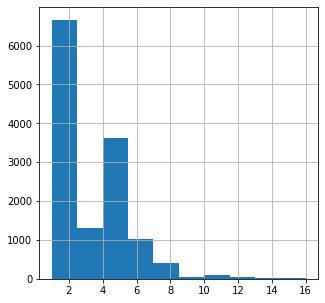

In [0]:
#Puedo ver la distribución también con un histograma
house_madrid['Accommodates'].hist(figsize=(5,5));

### Bathrooms

Variable de tipo numérico que representa el número de cuartos de baño de la vivienda. Al principio vi que tenía algunos valores nulos:

In [0]:
house_madrid ['Bathrooms'] = pd.to_numeric(house_madrid ['Bathrooms']) 

In [0]:
print("Valores nulos:", house_madrid['Bathrooms'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Bathrooms'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 48
Proporcion: 0.4%


Voy a sustituir los valores nulos por la mediana

In [0]:
print("Media Bathrooms:", round(house_madrid['Bathrooms'].mean(),0))
print("Mediana Bathrooms:", house_madrid['Bathrooms'].median())

Media Bathrooms: 1.0
Mediana Bathrooms: 1.0


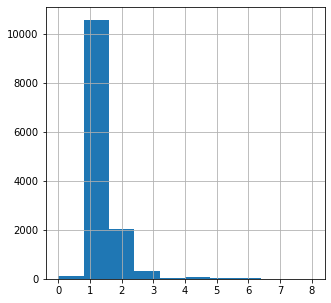

In [0]:
#Puedo ver la distribución también con un histograma
house_madrid['Bathrooms'].hist(figsize=(5,5));

In [0]:
mediana_bathrooms = house_madrid['Bathrooms'].median()  #Lo guardo para usarlo después en test
house_madrid['Bathrooms'].fillna(house_madrid['Bathrooms'].median(), inplace=True)

In [0]:
#Compruebo que ya no tengo nulos
print("Valores nulos:", house_madrid['Bathrooms'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Bathrooms'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


### Bedrooms

Variable de tipo numérico que representa el número de dormitorios de la vivienda. Al principio vi que tenía algunos valores nulos:

In [0]:
house_madrid ['Bedrooms'] = pd.to_numeric(house_madrid ['Bedrooms']) 

In [0]:
print("Valores nulos:", house_madrid['Bedrooms'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Bedrooms'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 23
Proporcion: 0.2%


Voy a sustituir los valores nulos por la mediana

In [0]:
print("Media Bedrooms:", round(house_madrid['Bedrooms'].mean(),0))
print("Mediana Bedrooms:", house_madrid['Bedrooms'].median())

Media Bedrooms: 1.0
Mediana Bedrooms: 1.0


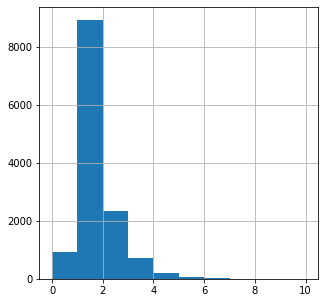

In [0]:
#Puedo ver la distribución también con un histograma
house_madrid['Bedrooms'].hist(figsize=(5,5));

In [0]:
mediana_bedrooms = house_madrid['Bedrooms'].median()    #Lo guardo para usarlo después en test
house_madrid['Bedrooms'].fillna(house_madrid['Bedrooms'].median(), inplace=True)

In [0]:
#Compruebo que ya no tengo nulos
print("Valores nulos:", house_madrid['Bedrooms'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Bedrooms'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


### Beds

Variable de tipo numérico que representa el número de camas de la vivienda. Al principio vi que tenía algunos valores nulos:

In [0]:
house_madrid ['Beds'] = pd.to_numeric(house_madrid ['Beds']) 

In [0]:
print("Valores nulos:", house_madrid['Beds'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Beds'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 48
Proporcion: 0.4%


Voy a sustituir los valores nulos por la mediana

In [0]:
print("Media Beds:", round(house_madrid['Beds'].mean(),0))
print("Mediana Beds:", house_madrid['Beds'].median())

Media Beds: 2.0
Mediana Beds: 2.0


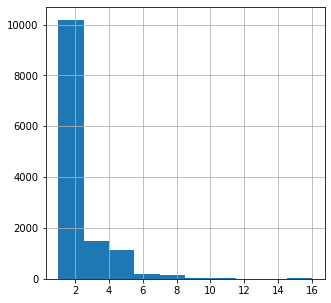

In [0]:
#Puedo ver la distribución también con un histograma
house_madrid['Beds'].hist(figsize=(5,5));

In [0]:
mediana_beds = house_madrid['Beds'].median()   #Lo guardo para usarlo después en test
house_madrid['Beds'].fillna(house_madrid['Beds'].median(), inplace=True)

In [0]:
#Compruebo que ya no tengo nulos
print("Valores nulos:", house_madrid['Beds'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Beds'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


### Bed Type

Esta característica representa el tipo cama y es de tipo categórico. Vi al principio que no tenía valores nulos

Voy a comprobar los valores que tiene:


In [0]:
house_madrid ['Bed Type'].value_counts()

Real Bed         12943
Pull-out Sofa      240
Futon               35
Couch               15
Airbed               5
Name: Bed Type, dtype: int64

La mayoria de las viviendas tiene el mismo tipo de capa "Real Bed", hay muy pocas que tenga otro tipo de cama por lo que esta característica no representa ninguna ventaja y no va a influir en el precio, así que la elimino

In [0]:
house_madrid.drop('Bed Type', axis=1, inplace=True)

In [0]:
house_madrid.head(5)

ID                                        Picture Url  \
40   6478626  https://public.opendatasoft.com/api/v2/catalog...   
41   4941335  https://public.opendatasoft.com/api/v2/catalog...   
42  12510355  https://public.opendatasoft.com/api/v2/catalog...   
43   4756811  https://public.opendatasoft.com/api/v2/catalog...   
44  15332216  https://public.opendatasoft.com/api/v2/catalog...   

    Host Response Time Host Response Rate  Host Listings Count  \
40      within an hour             50-89%                  3.0   
41  within a few hours               100%                  1.0   
42      within an hour               100%                  2.0   
43      within an hour               100%                  8.0   
44      within an hour               100%                  2.0   

   Neighbourhood Cleansed Property Type        Room Type  Accommodates  \
40            Otro_Barrio     Apartment     Private room             2   
41              Recoletos     Apartment  Entire home/apt             2   
42              Recoletos     Apartment  Entire home/apt             3   
43              Recoletos     Apartment     Private room             1   
44              Recoletos     Apartment  Entire home/apt             6   

    Bathrooms  Bedrooms  Beds  \
40        2.0       1.0   1.0   
41        1.0       0.0   1.0   
42        1.0       0.0   2.0   
43        1.0       1.0   1.0   
44        1.0       2.0   3.0   

                                            Amenities  Price  \
40  TV,Wireless Internet,Kitchen,Heating,Essential...   28.0   
41  TV,Internet,Wireless Internet,Air conditioning...   58.0   
42  TV,Internet,Wireless Internet,Air conditioning...   70.0   
43  Internet,Wireless Internet,Kitchen,Doorman,Ele...   26.0   
44  TV,Internet,Wireless Internet,Air conditioning...   70.0   

    Security Deposit  Cleaning Fee  Guests Included  Extra People  \
40               NaN           NaN                1             5   
41             100.0           NaN                1             0   
42             150.0          30.0                2            15   
43               NaN           NaN                1             0   
44               NaN          20.0                1            10   

    Minimum Nights  Maximum Nights Calendar Updated  Availability 30  \
40               1            1125      2 weeks ago                0   
41               2            1125       6 days ago                4   
42               2            1125            today                7   
43               7            1125      4 weeks ago               14   
44               2            1125      5 weeks ago                0   

    Availability 60  Availability 90  Availability 365  Number of Reviews  \
40                3               12               240                171   
41                9                9                15                 52   
42               15               32               292                 36   
43               37               59               334                 15   
44                0                0                52                  0   

   First Review Last Review  Review Scores Rating  Review Scores Accuracy  \
40   2015-06-14  2017-03-22                  87.0                     9.0   
41   2015-03-02  2017-02-12                  96.0                    10.0   
42   2016-05-15  2017-04-02                  87.0                     9.0   
43   2015-02-05  2016-11-05                  95.0                    10.0   
44          NaN         NaN                   NaN                     NaN   

    Review Scores Cleanliness  Review Scores Checkin  \
40                        9.0                    9.0   
41                       10.0                   10.0   
42                        9.0                   10.0   
43                        9.0                   10.0   
44                        NaN                    NaN   

    Review Scores Communication  Review Scores Location  Review Scores

### Amenities

Esta columna contiene un listado de comodidades de la vivienda

In [0]:
#Esto es un ejemplo de como vienen listadas esas comodidades
house_madrid ['Amenities'][:1].values

array(['TV,Wireless Internet,Kitchen,Heating,Essentials,Hair dryer,Iron'],
      dtype=object)

Vi también al principio que había valores nulos:

In [0]:
print("Valores nulos:", house_madrid['Amenities'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Amenities'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 107
Proporcion: 0.8%


Como voy a hacer un tratamiento de cadenas de caracteres a esos valores nulos les voy a asignar la cadena "nada"

In [0]:
house_madrid['Amenities'].fillna("nada", inplace=True)

In [0]:
#Creo un conjunto con las "amenities" que me encuentro en el dataset
amenities_list = list(house_madrid ['Amenities'])
amenities_list_string = "".join(str(amenities_list))
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', '')
amenities_list_string = amenities_list_string.replace("'", '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'24-hour check-in',
 'Air conditioning',
 'Baby bath',
 'Babysitter recommendations',
 'Bathtub',
 'Breakfast',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Crib',
 'Dog(s)',
 'Doorman',
 'Doorman Entry',
 'Dryer',
 'Elevator in building',
 'Essentials',
 'Family/kid friendly',
 'Fire extinguisher',
 'First aid kit',
 'Free parking on premises',
 'Free parking on street',
 'Game console',
 'Gym',
 'Hair dryer',
 'Hangers',
 'Heating',
 'High chair',
 'Hot tub',
 'Indoor fireplace',
 'Internet',
 'Iron',
 'Keypad',
 'Kitchen',
 'Laptop friendly workspace',
 'Lock on bedroom door',
 'Lockbox',
 'Other pet(s)',
 'Outlet covers',
 'Pack ’n Play/travel crib',
 'Paid parking off premises',
 'Pets allowed',
 'Pets live on this property',
 'Pool',
 'Private entrance',
 'Private living room',
 'Room-darkening shades',
 'Safety card',
 'Self Check-In',
 'Shampoo',
 'Smartlock',
 'Sm

In [0]:
#Añado al dataset una columna por cada Amenities. Después eliminaré algunas
for amenities in amenities_set:
    house_madrid.loc[house_madrid['Amenities'].str.contains(amenities), amenities] = 1
    
    

In [0]:
indice = house_madrid.columns.get_loc("Dias_activo")+1

In [0]:
# Los nulos de las nuevas columnas que he añadido los sustituyo por 0 

cols_to_replace_nulls = house_madrid.iloc[:,indice:].columns
house_madrid[cols_to_replace_nulls] = house_madrid[cols_to_replace_nulls].fillna(0)

In [0]:
house_madrid.head(2)

ID                                        Picture Url  \
40  6478626  https://public.opendatasoft.com/api/v2/catalog...   
41  4941335  https://public.opendatasoft.com/api/v2/catalog...   

    Host Response Time Host Response Rate  Host Listings Count  \
40      within an hour             50-89%                  3.0   
41  within a few hours               100%                  1.0   

   Neighbourhood Cleansed Property Type        Room Type  Accommodates  \
40            Otro_Barrio     Apartment     Private room             2   
41              Recoletos     Apartment  Entire home/apt             2   

    Bathrooms  Bedrooms  Beds  \
40        2.0       1.0   1.0   
41        1.0       0.0   1.0   

                                            Amenities  Price  \
40  TV,Wireless Internet,Kitchen,Heating,Essential...   28.0   
41  TV,Internet,Wireless Internet,Air conditioning...   58.0   

    Security Deposit  Cleaning Fee  Guests Included  Extra People  \
40               NaN           NaN                1             5   
41             100.0           NaN                1             0   

    Minimum Nights  Maximum Nights Calendar Updated  Availability 30  \
40               1            1125      2 weeks ago                0   
41               2            1125       6 days ago                4   

    Availability 60  Availability 90  Availability 365  Number of Reviews  \
40                3               12               240                171   
41                9                9                15                 52   

   First Review Last Review  Review Scores Rating  Review Scores Accuracy  \
40   2015-06-14  2017-03-22                  87.0                     9.0   
41   2015-03-02  2017-02-12                  96.0                    10.0   

    Review Scores Cleanliness  Review Scores Checkin  \
40                        9.0                    9.0   
41                       10.0                   10.0   

    Review Scores Communication  Review Scores Location  Review Scores Value  \
40                          9.0                     9.0                  9.0   
41                         10.0                    10.0                 10.0   

   Cancellation Policy  Reviews per Month  \
40            flexible               7.71   
41            moderate               2.03   

                                             Features  Dias_activo  Dryer  \
40  Host Has Profile Pic,Requires License,Instant ...        823.0    0.0   
41  Host Has Profile Pic,Is Location Exact,Require...        828.0    0.0   

    Air conditioning  Suitable for events  Heating  Dog(s)  Game console  \
40               0.0                  0.0      1.0     0.0           0.0   
41               1.0                  0.0      1.0     0.0           0.0   

    Pool  Carbon monoxide detector  Private living room  Smoke detector  \
40   0.0                       0.0                  0.0             0.0   
41   0.0                       0.0                  0.0             0.0   

    Lockbox  Bathtub  Keypad  Smoking allowed  Elevator in building  Cable TV  \
40      0.0      0.0     0.0              0.0                   0.0       0.0   
41      0.0      0.0     0.0              0.0                   1.0       0.0   

    Kitchen  Private entrance  Crib  Hangers  Window guards  \
40      1.0               0.0   0.0      0.0            0.0   
41      1.0               0.0   0.0      0.0            0.0   

    Laptop friendly workspace  Baby bath  High chair  Fire extinguisher  \
40                        0.0        0.0         0.0                0.0   
41                        0.0        0.0         0.0                0.0   

    Pets live on this property  Hair dryer  \
40                         0.0         1.0   
41                         0.0         0.0   

    translation missing: en.hosting_amenity_50  Paid parking off premises  \
40                                         0.0                        0.0   
41                  

Puedo reducir el número de características nuevas añadidas eliminando aquellas comodidades que añadan poca información o que no sea útiles para diferenciar las viviendas. Las comodidades que contenga menos del 10% de viviendas se podrían borrar


In [0]:
infrequent_amenities = []
for col in house_madrid.iloc[:,indice:].columns:
    if house_madrid[col].sum() < len(house_madrid)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)



['Suitable for events', 'Dog(s)', 'Game console', 'Pool', 'Private living room', 'Lockbox', 'Bathtub', 'Keypad', 'Cable TV', 'Private entrance', 'Crib', 'Window guards', 'Baby bath', 'High chair', 'Pets live on this property', 'Paid parking off premises', 'Free parking on premises', 'Changing table', 'Smartlock', 'Free parking on street', 'Self Check-In', 'Room-darkening shades', 'Doorman Entry', 'Other pet(s)', 'Gym', 'Stair gates', 'Children’s dinnerware', 'Cat(s)', 'Lock on bedroom door', 'Hot tub', 'Washer / Dryer', 'Table corner guards', 'Children’s books and toys', 'nada', 'Pack ’n Play/travel crib', 'Babysitter recommendations', 'Indoor fireplace', 'Outlet covers']


In [0]:
# Elimino las menos frecuentes
house_madrid.drop(infrequent_amenities, axis=1, inplace=True)



In [0]:
#Las "amenities" que quedan
indice = house_madrid.columns.get_loc("Dias_activo")+1
house_madrid.columns[indice:]

Index(['Dryer', 'Air conditioning', 'Heating', 'Carbon monoxide detector',
       'Smoke detector', 'Smoking allowed', 'Elevator in building', 'Kitchen',
       'Hangers', 'Laptop friendly workspace', 'Fire extinguisher',
       'Hair dryer', 'translation missing: en.hosting_amenity_50', 'Iron',
       'translation missing: en.hosting_amenity_49', 'Doorman', 'Shampoo',
       'Wireless Internet', 'Family/kid friendly', 'Safety card', 'Internet',
       '24-hour check-in', 'Breakfast', 'Buzzer/wireless intercom',
       'Pets allowed', 'Essentials', 'First aid kit', 'TV',
       'Wheelchair accessible', 'Washer'],
      dtype='object')

Voy a comprobar los valores de cada una de ellas ya que si hay un alto porcentaje del valor 1 las puedo eliminar. Voy a poner mas de un 90%

In [0]:
indice = house_madrid.columns.get_loc("Dias_activo")+1

In [0]:
frequent_amenities = []
for col in house_madrid.iloc[:,indice:].columns:
    if house_madrid[col].sum() > len(house_madrid)*90/100:
        frequent_amenities.append(col)
print(frequent_amenities)

['Heating', 'Kitchen', 'Wireless Internet', 'Internet']


Elimino las más frecuentes >90%

In [0]:
house_madrid.drop(frequent_amenities, axis=1, inplace=True)

In [0]:
house_madrid.head(2)

ID                                        Picture Url  \
40  6478626  https://public.opendatasoft.com/api/v2/catalog...   
41  4941335  https://public.opendatasoft.com/api/v2/catalog...   

    Host Response Time Host Response Rate  Host Listings Count  \
40      within an hour             50-89%                  3.0   
41  within a few hours               100%                  1.0   

   Neighbourhood Cleansed Property Type        Room Type  Accommodates  \
40            Otro_Barrio     Apartment     Private room             2   
41              Recoletos     Apartment  Entire home/apt             2   

    Bathrooms  Bedrooms  Beds  \
40        2.0       1.0   1.0   
41        1.0       0.0   1.0   

                                            Amenities  Price  \
40  TV,Wireless Internet,Kitchen,Heating,Essential...   28.0   
41  TV,Internet,Wireless Internet,Air conditioning...   58.0   

    Security Deposit  Cleaning Fee  Guests Included  Extra People  \
40               NaN           NaN                1             5   
41             100.0           NaN                1             0   

    Minimum Nights  Maximum Nights Calendar Updated  Availability 30  \
40               1            1125      2 weeks ago                0   
41               2            1125       6 days ago                4   

    Availability 60  Availability 90  Availability 365  Number of Reviews  \
40                3               12               240                171   
41                9                9                15                 52   

   First Review Last Review  Review Scores Rating  Review Scores Accuracy  \
40   2015-06-14  2017-03-22                  87.0                     9.0   
41   2015-03-02  2017-02-12                  96.0                    10.0   

    Review Scores Cleanliness  Review Scores Checkin  \
40                        9.0                    9.0   
41                       10.0                   10.0   

    Review Scores Communication  Review Scores Location  Review Scores Value  \
40                          9.0                     9.0                  9.0   
41                         10.0                    10.0                 10.0   

   Cancellation Policy  Reviews per Month  \
40            flexible               7.71   
41            moderate               2.03   

                                             Features  Dias_activo  Dryer  \
40  Host Has Profile Pic,Requires License,Instant ...        823.0    0.0   
41  Host Has Profile Pic,Is Location Exact,Require...        828.0    0.0   

    Air conditioning  Carbon monoxide detector  Smoke detector  \
40               0.0                       0.0             0.0   
41               1.0                       0.0             0.0   

    Smoking allowed  Elevator in building  Hangers  Laptop friendly workspace  \
40              0.0                   0.0      0.0                        0.0   
41              0.0                   1.0      0.0                        0.0   

    Fire extinguisher  Hair dryer  translation missing: en.hosting_amenity_50  \
40                0.0         1.0                                         0.0   
41                0.0         0.0                                         0.0   

    Iron  translation missing: en.hosting_amenity_49  Doorman  Shampoo  \
40   1.0                                         0.0      0.0      0.0   
41   0.0                                         1.0      0.0      1.0   

    Family/kid friendly  Safety card  24-hour check-in  Breakfast  \
40                  0.0          0.0               0.0        0.0   
41                  1.0          0.0               0.0        0.0   

    Buzzer/wireless intercom  Pets allowed  Essentials  First aid kit   TV  \
40                       0.0           0.0         1.0            0.0  1.0   
41                       0.0           0.0         1.0            1.0  1.0   

    Wheelchair accessible  Washer  
40                    0.0     0.0  
41 

Veo también que hay amenities que comienzan por "translation missing: " que se ve que debe ser algún error del scraper. Esas las voy a eliminar también

In [0]:
indice = house_madrid.columns.get_loc("Dias_activo")+1

In [0]:
translation_missing = []
for col in house_madrid.iloc[:,indice:].columns:
    if 'translation missing' in col:
        translation_missing.append(col)
print(translation_missing)

['translation missing: en.hosting_amenity_50', 'translation missing: en.hosting_amenity_49']


In [0]:
house_madrid.drop(translation_missing, axis=1, inplace=True)

In [0]:
#Las "amenities" que quedan
indice = house_madrid.columns.get_loc("Dias_activo")+1
amenities_def = house_madrid.columns[indice:]
amenities_def   #Lo usaré después para train

Index(['Dryer', 'Air conditioning', 'Carbon monoxide detector',
       'Smoke detector', 'Smoking allowed', 'Elevator in building', 'Hangers',
       'Laptop friendly workspace', 'Fire extinguisher', 'Hair dryer', 'Iron',
       'Doorman', 'Shampoo', 'Family/kid friendly', 'Safety card',
       '24-hour check-in', 'Breakfast', 'Buzzer/wireless intercom',
       'Pets allowed', 'Essentials', 'First aid kit', 'TV',
       'Wheelchair accessible', 'Washer'],
      dtype='object')

In [0]:
#Finalmente elimino la columna original "Amenities"

house_madrid.drop('Amenities', axis=1, inplace=True)

In [0]:
house_madrid.head(2)

ID                                        Picture Url  \
40  6478626  https://public.opendatasoft.com/api/v2/catalog...   
41  4941335  https://public.opendatasoft.com/api/v2/catalog...   

    Host Response Time Host Response Rate  Host Listings Count  \
40      within an hour             50-89%                  3.0   
41  within a few hours               100%                  1.0   

   Neighbourhood Cleansed Property Type        Room Type  Accommodates  \
40            Otro_Barrio     Apartment     Private room             2   
41              Recoletos     Apartment  Entire home/apt             2   

    Bathrooms  Bedrooms  Beds  Price  Security Deposit  Cleaning Fee  \
40        2.0       1.0   1.0   28.0               NaN           NaN   
41        1.0       0.0   1.0   58.0             100.0           NaN   

    Guests Included  Extra People  Minimum Nights  Maximum Nights  \
40                1             5               1            1125   
41                1             0               2            1125   

   Calendar Updated  Availability 30  Availability 60  Availability 90  \
40      2 weeks ago                0                3               12   
41       6 days ago                4                9                9   

    Availability 365  Number of Reviews First Review Last Review  \
40               240                171   2015-06-14  2017-03-22   
41                15                 52   2015-03-02  2017-02-12   

    Review Scores Rating  Review Scores Accuracy  Review Scores Cleanliness  \
40                  87.0                     9.0                        9.0   
41                  96.0                    10.0                       10.0   

    Review Scores Checkin  Review Scores Communication  \
40                    9.0                          9.0   
41                   10.0                         10.0   

    Review Scores Location  Review Scores Value Cancellation Policy  \
40                     9.0                  9.0            flexible   
41                    10.0                 10.0            moderate   

    Reviews per Month                                           Features  \
40               7.71  Host Has Profile Pic,Requires License,Instant ...   
41               2.03  Host Has Profile Pic,Is Location Exact,Require...   

    Dias_activo  Dryer  Air conditioning  Carbon monoxide detector  \
40        823.0    0.0               0.0                       0.0   
41        828.0    0.0               1.0                       0.0   

    Smoke detector  Smoking allowed  Elevator in building  Hangers  \
40             0.0              0.0                   0.0      0.0   
41             0.0              0.0                   1.0      0.0   

    Laptop friendly workspace  Fire extinguisher  Hair dryer  Iron  Doorman  \
40                        0.0                0.0         1.0   1.0      0.0   
41                        0.0                0.0         0.0   0.0      0.0   

    Shampoo  Family/kid friendly  Safety card  24-hour check-in  Breakfast  \
40      0.0                  0.0          0.0               0.0        0.0   
41      1.0                  1.0          0.0               0.0        0.0   

    Buzzer/wireless intercom  Pets allowed  Essentials  First aid kit   TV  \
40                       0.0           0.0         1.0            0.0  1.0   
41                       0.0           0.0         1.0            1.0  1.0   

    Wheelchair accessible  Washer  
40                    0.0     0.0  
41                    0.0     1.0

### Security Deposit

Representa la cantidad que se requiere como deposito. Es de tipo numérico. Vimos al principio que tenía valores nulos:

In [0]:
house_madrid ['Security Deposit'] = pd.to_numeric(house_madrid ['Security Deposit']) 

In [0]:
print("Valores nulos:", house_madrid['Security Deposit'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Security Deposit'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 7597
Proporcion: 57.4%


En este caso los valores nulos los transformo en 0 al ser un precio. 

In [0]:
house_madrid['Security Deposit'].fillna(0, inplace=True)

In [0]:
#Compruebo que no queden valores nulos
print("Valores nulos:", house_madrid['Security Deposit'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Security Deposit'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


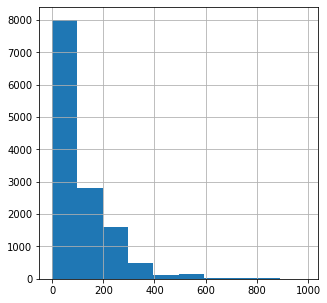

In [0]:
#Puedo ver la distribución también con un histograma
house_madrid['Security Deposit'].hist(figsize=(5,5));

### Cleaning Fee	

Representa la tasa que habría que pagar por limpieza. Es de tipo numérico. También tiene valores nulos:

In [0]:
house_madrid ['Cleaning Fee'] = pd.to_numeric(house_madrid ['Cleaning Fee']) 

In [0]:
print("Valores nulos:", house_madrid['Cleaning Fee'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Cleaning Fee'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 5404
Proporcion: 40.8%


Igual que antes sustituyo los valores nulos por 0 al tratarse de un precio. El tipo de datos es float

In [0]:
house_madrid['Cleaning Fee'].fillna(0, inplace=True)

In [0]:
#Compruebo que no queden valores nulos
print("Valores nulos:", house_madrid['Cleaning Fee'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Cleaning Fee'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


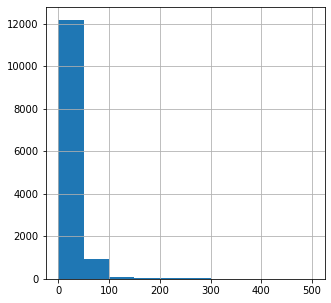

In [0]:
#Puedo ver la distribución también con un histograma
house_madrid['Cleaning Fee'].hist(figsize=(5,5));

### Guests Included

Representa el número de invitados incluidos. Es de tipo int y no tiene valores nulos

In [0]:
house_madrid ['Guests Included'] = pd.to_numeric(house_madrid ['Guests Included']) 

In [0]:
print("Valores nulos:", house_madrid['Guests Included'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Guests Included'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


Caso de que nuevos valores tuvieran valores nulos los remplazo por la mediana

In [0]:
print("Media Guests Included:", round(house_madrid['Guests Included'].mean(),0))
print("Mediana Guests Included:", house_madrid['Guests Included'].median())

Media Guests Included: 2.0
Mediana Guests Included: 1.0


In [0]:
mediana_guests_included = house_madrid['Guests Included'].median()  #lo guardo para usarlo después en test
house_madrid['Guests Included'].fillna(house_madrid['Guests Included'].median(), inplace=True)

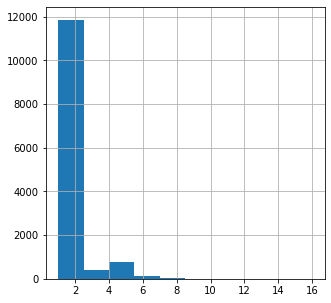

In [0]:
#Puedo ver la distribución también con un histograma
house_madrid['Guests Included'].hist(figsize=(5,5));

### Extra People

Representa el añadido de precio por persona extra. Es de tipo int y no tiene valores nulos:


In [0]:
house_madrid ['Extra People'] = pd.to_numeric(house_madrid ['Extra People']) 

In [0]:
print("Valores nulos:", house_madrid['Extra People'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Extra People'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


Caso de que nuevos valores tuvieran valores nulos los remplazo por la mediana cuando haga el tratamiento de outliers

In [0]:
print("Media Extra People:", round(house_madrid['Extra People'].mean(),0))
print("Mediana Extra People:", house_madrid['Extra People'].median())

Media Extra People: 7.0
Mediana Extra People: 0.0


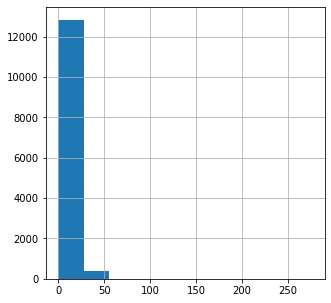

In [0]:
#Puedo ver la distribución también con un histograma
house_madrid['Extra People'].hist(figsize=(5,5));

### Minimum Nights

Representa el mínimo número de noches para la estancia. Es de tipo int y no tiene valores nulos.


In [0]:
house_madrid ['Minimum Nights'] = pd.to_numeric(house_madrid ['Minimum Nights']) 

In [0]:
print("Valores nulos:", house_madrid['Minimum Nights'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Minimum Nights'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


Caso de que nuevos valores tuvieran valores nulos los remplazo por la mediana tras el tratamiento de outliers

In [0]:
print("Media Minimum Nights:", round(house_madrid['Minimum Nights'].mean(),0))
print("Mediana Minimum Nights:", house_madrid['Minimum Nights'].median())

Media Minimum Nights: 3.0
Mediana Minimum Nights: 2.0


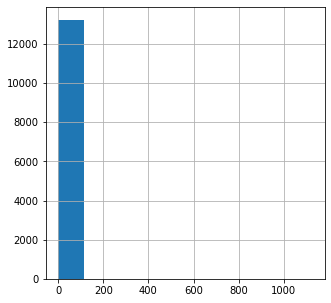

In [0]:
#Puedo ver la distribución también con un histograma
house_madrid['Minimum Nights'].hist(figsize=(5,5));

### Maximum Nights

El número máximo de noches que puede durar la estancia. Es de tipo int y no tiene valores nulos

In [0]:
house_madrid ['Maximum Nights'] = pd.to_numeric(house_madrid ['Maximum Nights']) 

In [0]:
print("Valores nulos:", house_madrid['Maximum Nights'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Maximum Nights'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


Caso de que nuevos valores tuvieran valores nulos los remplazo por la mediana cuando se haga el tratamiento de missings

In [0]:
print("Media Maximum Nights:", round(house_madrid['Maximum Nights'].mean(),0))
print("Mediana Maximum Nights:", house_madrid['Maximum Nights'].median())

Media Maximum Nights: 959.0
Mediana Maximum Nights: 1125.0


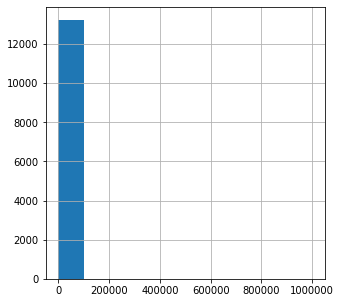

In [0]:
#Puedo ver la distribución también con un histograma
house_madrid['Maximum Nights'].hist(figsize=(5,5));

### Calendar Updated

Representa cuando realizó el anfitrión la última actualización del calendario. Esta columna no debe afectar al precio así que la voy a eliminar

In [0]:
house_madrid.drop('Calendar Updated', axis=1, inplace=True)

### Availability

Representa cuantas noches está disponibles para ser alquilado en los próximos, 30, 60, 90 y 365 dias
Vemos que tenemos 4 características: Availability 30, Availability 60, Availability 90, Availability 365. La 4 estarán correladas unas con otras así que me voy a quedar solo con una Availability 90, ya que en muchos sitios el límite legal de alquilér para este tipo de viviendas es de 90 dias. Elimino por tanto las otras columnas

In [0]:
house_madrid.drop(['Availability 30', 'Availability 60', 'Availability 365'], axis=1, inplace=True)

In [0]:
house_madrid ['Availability 90'] = pd.to_numeric(house_madrid ['Availability 90']) 

Si hubiera valores nulos los reemplazo por la mediana

In [0]:
mediana_availability_90 = house_madrid['Availability 90'].median()   #lo guardo para usarlo en test
house_madrid['Availability 90'].fillna(house_madrid['Availability 90'].median(), inplace=True)

### Number of Reviews

Número de reviews que tiene la propiedad. Es de tipo int y no tiene valores nulos.

In [0]:
house_madrid ['Number of Reviews'] = pd.to_numeric(house_madrid ['Number of Reviews']) 

In [0]:
print("Valores nulos:", house_madrid['Number of Reviews'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Number of Reviews'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


Si tuviera valores nulos lo reemplazamos con un 0

In [0]:
house_madrid['Number of Reviews'].fillna(0, inplace=True)

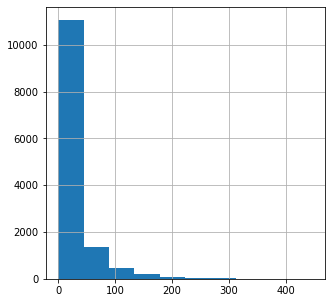

In [0]:
#Puedo ver la distribución también con un histograma
house_madrid['Number of Reviews'].hist(figsize=(5,5));

In [0]:
house_madrid.head(3)

ID                                        Picture Url  \
40   6478626  https://public.opendatasoft.com/api/v2/catalog...   
41   4941335  https://public.opendatasoft.com/api/v2/catalog...   
42  12510355  https://public.opendatasoft.com/api/v2/catalog...   

    Host Response Time Host Response Rate  Host Listings Count  \
40      within an hour             50-89%                  3.0   
41  within a few hours               100%                  1.0   
42      within an hour               100%                  2.0   

   Neighbourhood Cleansed Property Type        Room Type  Accommodates  \
40            Otro_Barrio     Apartment     Private room             2   
41              Recoletos     Apartment  Entire home/apt             2   
42              Recoletos     Apartment  Entire home/apt             3   

    Bathrooms  Bedrooms  Beds  Price  Security Deposit  Cleaning Fee  \
40        2.0       1.0   1.0   28.0               0.0           0.0   
41        1.0       0.0   1.0   58.0             100.0           0.0   
42        1.0       0.0   2.0   70.0             150.0          30.0   

    Guests Included  Extra People  Minimum Nights  Maximum Nights  \
40                1             5               1            1125   
41                1             0               2            1125   
42                2            15               2            1125   

    Availability 90  Number of Reviews First Review Last Review  \
40               12                171   2015-06-14  2017-03-22   
41                9                 52   2015-03-02  2017-02-12   
42               32                 36   2016-05-15  2017-04-02   

    Review Scores Rating  Review Scores Accuracy  Review Scores Cleanliness  \
40                  87.0                     9.0                        9.0   
41                  96.0                    10.0                       10.0   
42                  87.0                     9.0                        9.0   

    Review Scores Checkin  Review Scores Communication  \
40                    9.0                          9.0   
41                   10.0                         10.0   
42                   10.0                         10.0   

    Review Scores Location  Review Scores Value Cancellation Policy  \
40                     9.0                  9.0            flexible   
41                    10.0                 10.0            moderate   
42                    10.0                  9.0            flexible   

    Reviews per Month                                           Features  \
40               7.71  Host Has Profile Pic,Requires License,Instant ...   
41               2.03  Host Has Profile Pic,Is Location Exact,Require...   
42               3.28  Host Has Profile Pic,Host Identity Verified,Is...   

    Dias_activo  Dryer  Air conditioning  Carbon monoxide detector  \
40        823.0    0.0               0.0                       0.0   
41        828.0    0.0               1.0                       0.0   
42        355.0    0.0               1.0                       0.0   

    Smoke detector  Smoking allowed  Elevator in building  Hangers  \
40             0.0              0.0                   0.0      0.0   
41             0.0              0.0                   1.0      0.0   
42             0.0              1.0                   1.0      1.0   

    Laptop friendly workspace  Fire extinguisher  Hair dryer  Iron  Doorman  \
40                        0.0                0.0         1.0   1.0      0.0   
41                        0.0                0.0         0.0   0.0      0.0   
42                        1.0                0.0         1.0   0.0      0.0   

    Shampoo  Family/kid friendly  Safety card  24-hour check-in  Breakfast  \
40      0.0                  0.0          0.0               0.0        0.0   
41      1.0                  1.0          0.0               0.0        0.0   
42      1.0                  1.0          0.0               1.0        0.0   

    Buzzer/w

### First Review y Last Review

Las fecha en la que la vivienda recibe la primera y la última review. Compruebo los valores nulos de First Review

In [0]:
print("Valores nulos:", house_madrid['First Review'].isna().sum())
print(f"Proporcion: {round((house_madrid ['First Review'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 2716
Proporcion: 20.5%


Se puede ver que hay un alto porcentaje 20.6% de viviendas que no tienen Reviews. Es un porcentaje demasiado alto para prescindir de esa característica que además es una de las que los usuarios miramos más a la hora de alquilar una casa. Por otro lado el porcentaje también es muy alto para sustituirlo por la media o la mediana. Lo que voy a hacer es categorizar incluyendo una etiqueta de "no review"

En primer lugar transformo First Review a datatime

In [0]:
house_madrid['First Review'] = pd.to_datetime(house_madrid['First Review']) 

Me creo una nueva columna con el número de dias entre la primera review y la fecha del scraper:

In [0]:

house_madrid['time_since_first_review'] = (pd.datetime(2017, 4, 8) - house_madrid['First Review']).astype('timedelta64[D]')

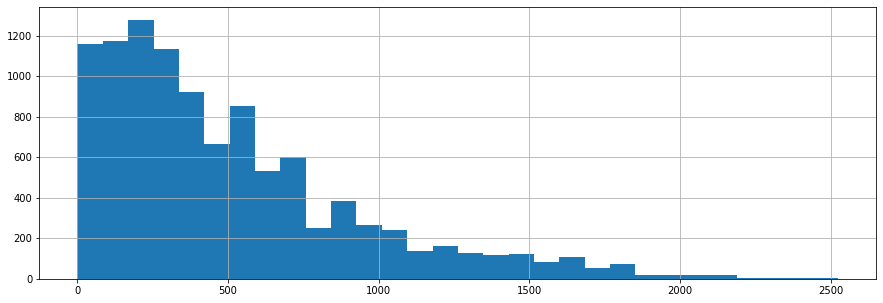

In [0]:
# Distribución del número de dias desde la primera review
house_madrid['time_since_first_review'].hist(figsize=(15,5), bins=30);

In [0]:
#Función de agrupación
def bin_column(col, bins, labels):
    """
    Toma la columna, agrupa por etiquetas y reemplaza el contenido original por la
    nueva etiqueta. Si hay un nulo lo sustituyo por unknown si no se especifica
    Takes in a column name, bin cut points and labels).
    """
    house_madrid[col] = pd.cut(house_madrid[col], bins=bins, labels=labels, include_lowest=True)
    house_madrid[col] = house_madrid[col].astype('str')
    
    

In [0]:
# Agrupación de time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(house_madrid['time_since_first_review'])],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'])

In [0]:
#Los nan los sustituo por 'no reviews'
house_madrid.loc[house_madrid['time_since_first_review'].str.contains('nan'), 'time_since_first_review'] = 'no reviews'

Con esto lo tengo ya convertido a una variable de tipo categórico

Finalmente elimino la columna original First Review 

In [0]:
house_madrid.drop(['First Review'], axis=1, inplace=True)

Realizo el mismo proceso con Last Review

In [0]:
print("Valores nulos:", house_madrid['Last Review'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Last Review'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 2717
Proporcion: 20.5%


In [0]:
#transformo a datatime
house_madrid['Last Review'] = pd.to_datetime(house_madrid['Last Review'])

Me creo una nueva columna con el número de dias entre la primera review y la fecha del scraper:

In [0]:
house_madrid['time_since_last_review'] = (pd.datetime(2017, 4, 8) - house_madrid['Last Review']).astype('timedelta64[D]')

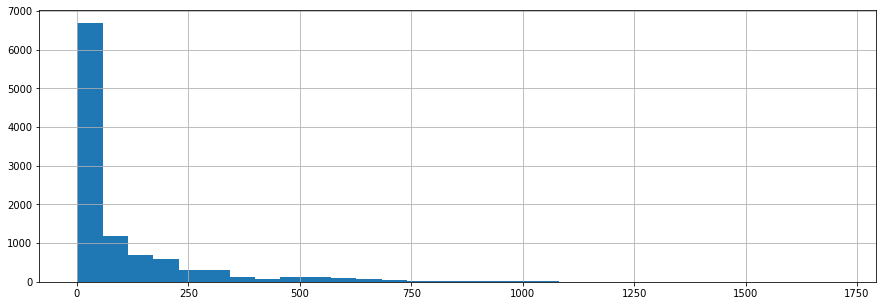

In [0]:
# Distribución del número de dias desde la primera review
house_madrid['time_since_last_review'].hist(figsize=(15,5), bins=30);

In [0]:
# Agrupación
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(house_madrid['time_since_last_review'])],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'])

In [0]:
#Los nan los sustituo por 'no reviews'
house_madrid.loc[house_madrid['time_since_last_review'].str.contains('nan'), 'time_since_last_review'] = 'no reviews'

Con esto lo tengo ya convertido a una variable de tipo categórico.

Finalmente elimino la columna original Last Review

In [0]:
house_madrid.drop(['Last Review'], axis=1, inplace=True)

In [0]:
house_madrid.head(5)

ID                                        Picture Url  \
40   6478626  https://public.opendatasoft.com/api/v2/catalog...   
41   4941335  https://public.opendatasoft.com/api/v2/catalog...   
42  12510355  https://public.opendatasoft.com/api/v2/catalog...   
43   4756811  https://public.opendatasoft.com/api/v2/catalog...   
44  15332216  https://public.opendatasoft.com/api/v2/catalog...   

    Host Response Time Host Response Rate  Host Listings Count  \
40      within an hour             50-89%                  3.0   
41  within a few hours               100%                  1.0   
42      within an hour               100%                  2.0   
43      within an hour               100%                  8.0   
44      within an hour               100%                  2.0   

   Neighbourhood Cleansed Property Type        Room Type  Accommodates  \
40            Otro_Barrio     Apartment     Private room             2   
41              Recoletos     Apartment  Entire home/apt             2   
42              Recoletos     Apartment  Entire home/apt             3   
43              Recoletos     Apartment     Private room             1   
44              Recoletos     Apartment  Entire home/apt             6   

    Bathrooms  Bedrooms  Beds  Price  Security Deposit  Cleaning Fee  \
40        2.0       1.0   1.0   28.0               0.0           0.0   
41        1.0       0.0   1.0   58.0             100.0           0.0   
42        1.0       0.0   2.0   70.0             150.0          30.0   
43        1.0       1.0   1.0   26.0               0.0           0.0   
44        1.0       2.0   3.0   70.0               0.0          20.0   

    Guests Included  Extra People  Minimum Nights  Maximum Nights  \
40                1             5               1            1125   
41                1             0               2            1125   
42                2            15               2            1125   
43                1             0               7            1125   
44                1            10               2            1125   

    Availability 90  Number of Reviews  Review Scores Rating  \
40               12                171                  87.0   
41                9                 52                  96.0   
42               32                 36                  87.0   
43               59                 15                  95.0   
44                0                  0                   NaN   

    Review Scores Accuracy  Review Scores Cleanliness  Review Scores Checkin  \
40                     9.0                        9.0                    9.0   
41                    10.0                       10.0                   10.0   
42                     9.0                        9.0                   10.0   
43                    10.0                        9.0                   10.0   
44                     NaN                        NaN                    NaN   

    Review Scores Communication  Review Scores Location  Review Scores Value  \
40                          9.0                     9.0                  9.0   
41                         10.0                    10.0                 10.0   
42                         10.0                    10.0                  9.0   
43                         10.0                    10.0                  9.0   
44                          NaN                     NaN                  NaN   

   Cancellation Policy  Reviews per Month  \
40            flexible               7.71   
41            moderate               2.03   
42            flexible               3.28   
43              strict               0.57   
44            moderate                NaN   

                                             Features  Dias_activo  Dryer  \
40  Host Has Profile Pic,Requires License,Instant ...        823.0    0.0   
41  Host Has Profile Pic,Is Location Exact,Require...        828.0    0.0   
42  Host Has Profile Pic,Host Identity Verified,Is...        355.0  

### Columnas Reviews Scores

Representan la puntación que le dan los visitantes a los diferentes servicios.
Estamos en un caso parecido a las anteriores caracterísitcas, contienen bastantes valores nulos y no podemos prescindir de ellos ni tampoco sustituirlos por la media o la mediana al ser un porcentaje alto, así que volvemos a categorizar incluyendo la categoría "no reviews" 

In [0]:
house_madrid ['Review Scores Rating'] = pd.to_numeric(house_madrid ['Review Scores Rating'])
house_madrid ['Review Scores Accuracy'] = pd.to_numeric(house_madrid ['Review Scores Accuracy'])
house_madrid ['Review Scores Cleanliness'] = pd.to_numeric(house_madrid ['Review Scores Cleanliness'])
house_madrid ['Review Scores Checkin'] = pd.to_numeric(house_madrid ['Review Scores Checkin'])
house_madrid ['Review Scores Communication'] = pd.to_numeric(house_madrid ['Review Scores Communication'])
house_madrid ['Review Scores Location'] = pd.to_numeric(house_madrid ['Review Scores Location'])
house_madrid ['Review Scores Value'] = pd.to_numeric(house_madrid ['Review Scores Value'])

In [0]:
print("Valores nulos:", house_madrid['Review Scores Rating'].isna().sum())
print(f"Proporcion: {round((house_madrid ['Review Scores Rating'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 2841
Proporcion: 21.5%


Voy a dibujar la distribución de los diferentes ratings para ver como puedo ir agrupando cada característica

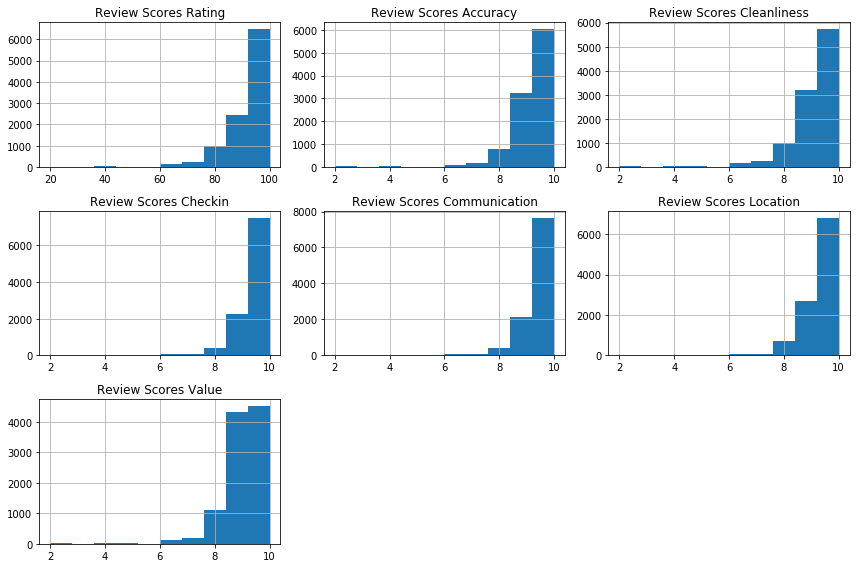

In [0]:
variables_to_plot = list(house_madrid.columns[house_madrid.columns.str.startswith("Review Scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    house_madrid[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()


Se puede ver que la primera de ellas Review Score Rating tiene una distribución diferente a las otras. Voy a tratar esa por un lado y el resto por otro

In [0]:
#Quito la primera, Review Score Rating
variables_to_plot.pop(0)

'Review Scores Rating'

In [0]:
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 4, 7, 8, 9, 10],
               labels=['0-4/10','5-7/10','8/10', '9/10', '10/10'])

In [0]:
#Los nan los sustituo por 'no reviews'
for col in variables_to_plot:
    house_madrid.loc[house_madrid[col].str.contains('nan'), col] = 'no reviews'

In [0]:
# Voy ahora con 
bin_column('Review Scores Rating',
           bins=[0, 50, 80, 95, 100],
           labels=['0-49/100', '50-79/100','80-94/100', '95-100/100'])

In [0]:
#Los nan los sustituo por 'no reviews'
house_madrid.loc[house_madrid['Review Scores Rating'].str.contains('nan'), 'Review Scores Rating'] = 'no reviews'

In [0]:
house_madrid.head (5)

ID                                        Picture Url  \
40   6478626  https://public.opendatasoft.com/api/v2/catalog...   
41   4941335  https://public.opendatasoft.com/api/v2/catalog...   
42  12510355  https://public.opendatasoft.com/api/v2/catalog...   
43   4756811  https://public.opendatasoft.com/api/v2/catalog...   
44  15332216  https://public.opendatasoft.com/api/v2/catalog...   

    Host Response Time Host Response Rate  Host Listings Count  \
40      within an hour             50-89%                  3.0   
41  within a few hours               100%                  1.0   
42      within an hour               100%                  2.0   
43      within an hour               100%                  8.0   
44      within an hour               100%                  2.0   

   Neighbourhood Cleansed Property Type        Room Type  Accommodates  \
40            Otro_Barrio     Apartment     Private room             2   
41              Recoletos     Apartment  Entire home/apt             2   
42              Recoletos     Apartment  Entire home/apt             3   
43              Recoletos     Apartment     Private room             1   
44              Recoletos     Apartment  Entire home/apt             6   

    Bathrooms  Bedrooms  Beds  Price  Security Deposit  Cleaning Fee  \
40        2.0       1.0   1.0   28.0               0.0           0.0   
41        1.0       0.0   1.0   58.0             100.0           0.0   
42        1.0       0.0   2.0   70.0             150.0          30.0   
43        1.0       1.0   1.0   26.0               0.0           0.0   
44        1.0       2.0   3.0   70.0               0.0          20.0   

    Guests Included  Extra People  Minimum Nights  Maximum Nights  \
40                1             5               1            1125   
41                1             0               2            1125   
42                2            15               2            1125   
43                1             0               7            1125   
44                1            10               2            1125   

    Availability 90  Number of Reviews Review Scores Rating  \
40               12                171            80-94/100   
41                9                 52           95-100/100   
42               32                 36            80-94/100   
43               59                 15            80-94/100   
44                0                  0           no reviews   

   Review Scores Accuracy Review Scores Cleanliness Review Scores Checkin  \
40                   9/10                      9/10                  9/10   
41                  10/10                     10/10                 10/10   
42                   9/10                      9/10                 10/10   
43                  10/10                      9/10                 10/10   
44             no reviews                no reviews            no reviews   

   Review Scores Communication Review Scores Location Review Scores Value  \
40                        9/10                   9/10                9/10   
41                       10/10                  10/10               10/10   
42                       10/10                  10/10                9/10   
43                       10/10                  10/10                9/10   
44                  no reviews             no reviews          no reviews   

   Cancellation Policy  Reviews per Month  \
40            flexible               7.71   
41            moderate               2.03   
42            flexible               3.28   
43              strict               0.57   
44            moderate                NaN   

                                             Features  Dias_activo  Dryer  \
40  Host Has Profile Pic,Requires License,Instant ...        823.0    0.0   
41  Host Has Profile Pic,Is Location Exact,Require...        828.0    0.0   
42  Host Has Profile Pic,Host Identity Verified,Is...        355.0    0.0   
43  Host Has Profile Pic,Is Locat

### Cancellation Policy

Es una variable categórica que representa el tipo de política de cancelación. No contiene valores nulos
Vamos a ver que valores puede tener:

In [0]:
house_madrid ['Cancellation Policy'].value_counts()

strict             5000
flexible           4258
moderate           3973
super_strict_60       5
super_strict_30       2
Name: Cancellation Policy, dtype: int64

De la "super_strict_60" y "super_strict_30" hay muy pocas viviendas así que las voy a agrupar junto con los strict para así tener solo 3 categorías 

Caso de que haya un valor nulo le asigno la más frecuente que es "strict"

In [0]:
house_madrid ['Cancellation Policy'] [house_madrid ['Cancellation Policy'].isnull()]="strict"

In [0]:
tipo_cancelacion = ['strict', 'flexible', 'moderate' ]
tipo_cancelacion   #Lo usaré en test

['strict', 'flexible', 'moderate']

In [0]:
house_madrid['Cancellation Policy'] [~house_madrid['Cancellation Policy'].isin(tipo_cancelacion)]='strict'

In [0]:
house_madrid ['Cancellation Policy'].value_counts()

strict      5007
flexible    4258
moderate    3973
Name: Cancellation Policy, dtype: int64

### Reviews per Month

Es un campo calculado que representa el número medio de reviews por mes.
Es una columna que va a estar altamente correlada con la "Number of Reviews" por tanto la voy a eliminar



In [0]:
house_madrid.drop(['Reviews per Month' ], axis=1, inplace=True)

In [0]:
house_madrid.head(5)

ID                                        Picture Url  \
40   6478626  https://public.opendatasoft.com/api/v2/catalog...   
41   4941335  https://public.opendatasoft.com/api/v2/catalog...   
42  12510355  https://public.opendatasoft.com/api/v2/catalog...   
43   4756811  https://public.opendatasoft.com/api/v2/catalog...   
44  15332216  https://public.opendatasoft.com/api/v2/catalog...   

    Host Response Time Host Response Rate  Host Listings Count  \
40      within an hour             50-89%                  3.0   
41  within a few hours               100%                  1.0   
42      within an hour               100%                  2.0   
43      within an hour               100%                  8.0   
44      within an hour               100%                  2.0   

   Neighbourhood Cleansed Property Type        Room Type  Accommodates  \
40            Otro_Barrio     Apartment     Private room             2   
41              Recoletos     Apartment  Entire home/apt             2   
42              Recoletos     Apartment  Entire home/apt             3   
43              Recoletos     Apartment     Private room             1   
44              Recoletos     Apartment  Entire home/apt             6   

    Bathrooms  Bedrooms  Beds  Price  Security Deposit  Cleaning Fee  \
40        2.0       1.0   1.0   28.0               0.0           0.0   
41        1.0       0.0   1.0   58.0             100.0           0.0   
42        1.0       0.0   2.0   70.0             150.0          30.0   
43        1.0       1.0   1.0   26.0               0.0           0.0   
44        1.0       2.0   3.0   70.0               0.0          20.0   

    Guests Included  Extra People  Minimum Nights  Maximum Nights  \
40                1             5               1            1125   
41                1             0               2            1125   
42                2            15               2            1125   
43                1             0               7            1125   
44                1            10               2            1125   

    Availability 90  Number of Reviews Review Scores Rating  \
40               12                171            80-94/100   
41                9                 52           95-100/100   
42               32                 36            80-94/100   
43               59                 15            80-94/100   
44                0                  0           no reviews   

   Review Scores Accuracy Review Scores Cleanliness Review Scores Checkin  \
40                   9/10                      9/10                  9/10   
41                  10/10                     10/10                 10/10   
42                   9/10                      9/10                 10/10   
43                  10/10                      9/10                 10/10   
44             no reviews                no reviews            no reviews   

   Review Scores Communication Review Scores Location Review Scores Value  \
40                        9/10                   9/10                9/10   
41                       10/10                  10/10               10/10   
42                       10/10                  10/10                9/10   
43                       10/10                  10/10                9/10   
44                  no reviews             no reviews          no reviews   

   Cancellation Policy                                           Features  \
40            flexible  Host Has Profile Pic,Requires License,Instant ...   
41            moderate  Host Has Profile Pic,Is Location Exact,Require...   
42            flexible  Host Has Profile Pic,Host Identity Verified,Is...   
43              strict  Host Has Profile Pic,Is Location Exact,Require...   
44            moderate  Host Has Profile Pic,Host Identity Verified,Is...   

    Dias_activo  Dryer  Air conditioning  Carbon monoxide detector  \
40        823.0    0.0               0.0                       0.0   
41       

### Features

Esta columna representa características del host. No tiene valores nulos. 

In [0]:
#Esto es un ejemplo de como vienen listadas esas features
house_madrid ['Features'][:1].values

array(['Host Has Profile Pic,Requires License,Instant Bookable'],
      dtype=object)

Para el caso de que tuviera valores nulos le asigno "nada"

In [0]:
house_madrid['Features'].fillna("nada", inplace=True)

Saco el listado de todas las features

In [0]:
features_list = list(house_madrid ['Features'])
features_list_string = "".join(str(features_list))
features_list_string = features_list_string.replace('{', '')
features_list_string = features_list_string.replace('[', '')
features_list_string = features_list_string.replace(']', '')
features_list_string = features_list_string.replace("'", '')
features_list_string = features_list_string.replace('}', ',')
features_list_string = features_list_string.replace('"', '')
features_set = [x.strip() for x in features_list_string.split(',')]
features_set = set(features_set)
features_set

{'Host Has Profile Pic',
 'Host Identity Verified',
 'Host Is Superhost',
 'Instant Bookable',
 'Is Location Exact',
 'Require Guest Phone Verification',
 'Require Guest Profile Picture',
 'Requires License'}

In [0]:
#Añado al dataset una columna por cada Feature. Después eliminaré algunas
for features in features_set:
    house_madrid.loc[house_madrid['Features'].str.contains(features), features] = 1
    

In [0]:
house_madrid.head(2)

ID                                        Picture Url  \
40  6478626  https://public.opendatasoft.com/api/v2/catalog...   
41  4941335  https://public.opendatasoft.com/api/v2/catalog...   

    Host Response Time Host Response Rate  Host Listings Count  \
40      within an hour             50-89%                  3.0   
41  within a few hours               100%                  1.0   

   Neighbourhood Cleansed Property Type        Room Type  Accommodates  \
40            Otro_Barrio     Apartment     Private room             2   
41              Recoletos     Apartment  Entire home/apt             2   

    Bathrooms  Bedrooms  Beds  Price  Security Deposit  Cleaning Fee  \
40        2.0       1.0   1.0   28.0               0.0           0.0   
41        1.0       0.0   1.0   58.0             100.0           0.0   

    Guests Included  Extra People  Minimum Nights  Maximum Nights  \
40                1             5               1            1125   
41                1             0               2            1125   

    Availability 90  Number of Reviews Review Scores Rating  \
40               12                171            80-94/100   
41                9                 52           95-100/100   

   Review Scores Accuracy Review Scores Cleanliness Review Scores Checkin  \
40                   9/10                      9/10                  9/10   
41                  10/10                     10/10                 10/10   

   Review Scores Communication Review Scores Location Review Scores Value  \
40                        9/10                   9/10                9/10   
41                       10/10                  10/10               10/10   

   Cancellation Policy                                           Features  \
40            flexible  Host Has Profile Pic,Requires License,Instant ...   
41            moderate  Host Has Profile Pic,Is Location Exact,Require...   

    Dias_activo  Dryer  Air conditioning  Carbon monoxide detector  \
40        823.0    0.0               0.0                       0.0   
41        828.0    0.0               1.0                       0.0   

    Smoke detector  Smoking allowed  Elevator in building  Hangers  \
40             0.0              0.0                   0.0      0.0   
41             0.0              0.0                   1.0      0.0   

    Laptop friendly workspace  Fire extinguisher  Hair dryer  Iron  Doorman  \
40                        0.0                0.0         1.0   1.0      0.0   
41                        0.0                0.0         0.0   0.0      0.0   

    Shampoo  Family/kid friendly  Safety card  24-hour check-in  Breakfast  \
40      0.0                  0.0          0.0               0.0        0.0   
41      1.0                  1.0          0.0               0.0        0.0   

    Buzzer/wireless intercom  Pets allowed  Essentials  First aid kit   TV  \
40                       0.0           0.0         1.0            0.0  1.0   
41                       0.0           0.0         1.0            1.0  1.0   

    Wheelchair accessible  Washer time_since_first_review  \
40                    0.0     0.0               1-2 years   
41                    0.0     1.0               2-3 years   

   time_since_last_review  Is Location Exact  Host Identity Verified  \
40              2-8 weeks                NaN                     NaN   
41              2-8 weeks                1.0                     NaN   

    Require Guest Phone Verification  Instant Bookable  Requires License  \
40                               NaN               1.0               1.0   
41                               NaN               NaN               1.0   

    Host Is Superhost  Require Guest Profile Picture  Host Has Profile Pic  
40                NaN                            NaN                   1.0  
41                NaN                            NaN                   1.0

In [0]:
indice = house_madrid.columns.get_loc("time_since_last_review")+1


In [0]:
# Los nulos de las nuevas columnas que he añadido los sustituyo por 0 
cols_to_replace_nulls = house_madrid.iloc[:,indice:].columns
house_madrid[cols_to_replace_nulls] = house_madrid[cols_to_replace_nulls].fillna(0)

Puedo reducir el número de características nuevas añadidas eliminando aquellas features que añadan poca información o que no sea útiles para diferenciar las viviendas. Las features que contenga menos del 10% de viviendas se podrían borrar

In [0]:
infrequent_features = []
for col in house_madrid.iloc[:,indice:].columns:
    if house_madrid[col].sum() < len(house_madrid)/10:
        infrequent_features.append(col)
print(infrequent_features)

['Require Guest Phone Verification', 'Require Guest Profile Picture']


In [0]:
# Elimino las menos frecuentes
house_madrid.drop(infrequent_features, axis=1, inplace=True)

Voy a comprobar los valores de cada una de ellas ya que si hay un alto porcentaje del valor 1 las puedo eliminar. 

In [0]:
indice = house_madrid.columns.get_loc("time_since_last_review")+1

In [0]:
frequent_features = []
for col in house_madrid.iloc[:,indice:].columns:
    if house_madrid[col].sum() > len(house_madrid)*90/100:
        frequent_features.append(col)
print(frequent_features)

['Requires License', 'Host Has Profile Pic']


In [0]:
#Elimino estas columnas frecuentes
house_madrid.drop(frequent_features, axis=1, inplace=True)

In [0]:
#Las "features" que quedan
indice = house_madrid.columns.get_loc("time_since_last_review")+1
features_def = house_madrid.columns[indice:]
features_def

Index(['Is Location Exact', 'Host Identity Verified', 'Instant Bookable',
       'Host Is Superhost'],
      dtype='object')

In [0]:
#Elimino la columna features original
house_madrid.drop('Features', axis=1, inplace=True)

In [0]:
house_madrid.head(5)

ID                                        Picture Url  \
40   6478626  https://public.opendatasoft.com/api/v2/catalog...   
41   4941335  https://public.opendatasoft.com/api/v2/catalog...   
42  12510355  https://public.opendatasoft.com/api/v2/catalog...   
43   4756811  https://public.opendatasoft.com/api/v2/catalog...   
44  15332216  https://public.opendatasoft.com/api/v2/catalog...   

    Host Response Time Host Response Rate  Host Listings Count  \
40      within an hour             50-89%                  3.0   
41  within a few hours               100%                  1.0   
42      within an hour               100%                  2.0   
43      within an hour               100%                  8.0   
44      within an hour               100%                  2.0   

   Neighbourhood Cleansed Property Type        Room Type  Accommodates  \
40            Otro_Barrio     Apartment     Private room             2   
41              Recoletos     Apartment  Entire home/apt             2   
42              Recoletos     Apartment  Entire home/apt             3   
43              Recoletos     Apartment     Private room             1   
44              Recoletos     Apartment  Entire home/apt             6   

    Bathrooms  Bedrooms  Beds  Price  Security Deposit  Cleaning Fee  \
40        2.0       1.0   1.0   28.0               0.0           0.0   
41        1.0       0.0   1.0   58.0             100.0           0.0   
42        1.0       0.0   2.0   70.0             150.0          30.0   
43        1.0       1.0   1.0   26.0               0.0           0.0   
44        1.0       2.0   3.0   70.0               0.0          20.0   

    Guests Included  Extra People  Minimum Nights  Maximum Nights  \
40                1             5               1            1125   
41                1             0               2            1125   
42                2            15               2            1125   
43                1             0               7            1125   
44                1            10               2            1125   

    Availability 90  Number of Reviews Review Scores Rating  \
40               12                171            80-94/100   
41                9                 52           95-100/100   
42               32                 36            80-94/100   
43               59                 15            80-94/100   
44                0                  0           no reviews   

   Review Scores Accuracy Review Scores Cleanliness Review Scores Checkin  \
40                   9/10                      9/10                  9/10   
41                  10/10                     10/10                 10/10   
42                   9/10                      9/10                 10/10   
43                  10/10                      9/10                 10/10   
44             no reviews                no reviews            no reviews   

   Review Scores Communication Review Scores Location Review Scores Value  \
40                        9/10                   9/10                9/10   
41                       10/10                  10/10               10/10   
42                       10/10                  10/10                9/10   
43                       10/10                  10/10                9/10   
44                  no reviews             no reviews          no reviews   

   Cancellation Policy  Dias_activo  Dryer  Air conditioning  \
40            flexible        823.0    0.0               0.0   
41            moderate        828.0    0.0               1.0   
42            flexible        355.0    0.0               1.0   
43              strict       1673.0    0.0               0.0   
44            moderate       1200.0    0.0               1.0   

    Carbon monoxide detector  Smoke detector  Smoking allowed  \
40                       0.0             0.0              0.0   
41                       0.0             0.0              0.0   
42                       0.0    

Con esto ya tendría realizada toda la limpieza de dataset. He añadido nuevas columnas y categorizado

In [0]:
#Tipos de datos y columnas que me quedan finalmente
dato = house_madrid.dtypes
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

ID                               int64
Picture Url                     object
Host Response Time              object
Host Response Rate              object
Host Listings Count            float64
Neighbourhood Cleansed          object
Property Type                   object
Room Type                       object
Accommodates                     int64
Bathrooms                      float64
Bedrooms                       float64
Beds                           float64
Price                          float64
Security Deposit               float64
Cleaning Fee                   float64
Guests Included                  int64
Extra People                     int64
Minimum Nights                   int64
Maximum Nights                   int64
Availability 90                  int64
Number of Reviews                int64
Review Scores Rating            object
Review Scores Accuracy          object
Review Scores Cleanliness       object
Review Scores Checkin           object
Review Scores Communicati

In [0]:
print(f"El dataset limpio train contiene {len(house_madrid)} viviendas Airbnb con {len(house_madrid.columns)} características")
pd.set_option('display.max_columns', len(house_madrid)) # Para ver todas las columnas
house_madrid.head(5)  

El dataset limpio train contiene 13238 viviendas Airbnb con 60 características


ID                                        Picture Url  \
40   6478626  https://public.opendatasoft.com/api/v2/catalog...   
41   4941335  https://public.opendatasoft.com/api/v2/catalog...   
42  12510355  https://public.opendatasoft.com/api/v2/catalog...   
43   4756811  https://public.opendatasoft.com/api/v2/catalog...   
44  15332216  https://public.opendatasoft.com/api/v2/catalog...   

    Host Response Time Host Response Rate  Host Listings Count  \
40      within an hour             50-89%                  3.0   
41  within a few hours               100%                  1.0   
42      within an hour               100%                  2.0   
43      within an hour               100%                  8.0   
44      within an hour               100%                  2.0   

   Neighbourhood Cleansed Property Type        Room Type  Accommodates  \
40            Otro_Barrio     Apartment     Private room             2   
41              Recoletos     Apartment  Entire home/apt             2   
42              Recoletos     Apartment  Entire home/apt             3   
43              Recoletos     Apartment     Private room             1   
44              Recoletos     Apartment  Entire home/apt             6   

    Bathrooms  Bedrooms  Beds  Price  Security Deposit  Cleaning Fee  \
40        2.0       1.0   1.0   28.0               0.0           0.0   
41        1.0       0.0   1.0   58.0             100.0           0.0   
42        1.0       0.0   2.0   70.0             150.0          30.0   
43        1.0       1.0   1.0   26.0               0.0           0.0   
44        1.0       2.0   3.0   70.0               0.0          20.0   

    Guests Included  Extra People  Minimum Nights  Maximum Nights  \
40                1             5               1            1125   
41                1             0               2            1125   
42                2            15               2            1125   
43                1             0               7            1125   
44                1            10               2            1125   

    Availability 90  Number of Reviews Review Scores Rating  \
40               12                171            80-94/100   
41                9                 52           95-100/100   
42               32                 36            80-94/100   
43               59                 15            80-94/100   
44                0                  0           no reviews   

   Review Scores Accuracy Review Scores Cleanliness Review Scores Checkin  \
40                   9/10                      9/10                  9/10   
41                  10/10                     10/10                 10/10   
42                   9/10                      9/10                 10/10   
43                  10/10                      9/10                 10/10   
44             no reviews                no reviews            no reviews   

   Review Scores Communication Review Scores Location Review Scores Value  \
40                        9/10                   9/10                9/10   
41                       10/10                  10/10               10/10   
42                       10/10                  10/10                9/10   
43                       10/10                  10/10                9/10   
44                  no reviews             no reviews          no reviews   

   Cancellation Policy  Dias_activo  Dryer  Air conditioning  \
40            flexible        823.0    0.0               0.0   
41            moderate        828.0    0.0               1.0   
42            flexible        355.0    0.0               1.0   
43              strict       1673.0    0.0               0.0   
44            moderate       1200.0    0.0               1.0   

    Carbon monoxide detector  Smoke detector  Smoking allowed  \
40                       0.0             0.0              0.0   
41                       0.0             0.0              0.0   
42                       0.0    

# 4.- Análisis exploratorio



## 4.1. Analisis exploratorio de variables de tipo numérico

Vamos ahora a realizar un análisis básico de los datos de tipo numérico. 

Voy a resumir toda la información posible de los datos. Me interesa saber la media, desviación estándar y quartiles de cada una de las variables. Esto nos permitirá, por una lado, tener una idea de cómo son las ditribuciones de cada una de las variables y por otra, nos permitirá verificar si existen datos anómalos, también conocidos como outliers 

In [0]:
house_madrid.describe().T

count          mean           std      min  \
ID                         13238.0  1.040597e+07  5.506528e+06  18628.0   
Host Listings Count        13235.0  9.792293e+00  2.754856e+01      0.0   
Accommodates               13238.0  3.188246e+00  1.989602e+00      1.0   
Bathrooms                  13238.0  1.251095e+00  5.967515e-01      0.0   
Bedrooms                   13238.0  1.293549e+00  8.251756e-01      0.0   
Beds                       13238.0  1.984968e+00  1.507003e+00      1.0   
Price                      13238.0  6.587521e+01  5.597470e+01      9.0   
Security Deposit           13238.0  7.816921e+01  1.152697e+02      0.0   
Cleaning Fee               13238.0  1.750476e+01  2.466529e+01      0.0   
Guests Included            13238.0  1.574407e+00  1.082675e+00      1.0   
Extra People               13238.0  7.376039e+00  1.033485e+01      0.0   
Minimum Nights             13238.0  3.020547e+00  1.287270e+01      1.0   
Maximum Nights             13238.0  9.590852e+02  8.915575e+03      1.0   
Availability 90            13238.0  4.004857e+01  2.928132e+01      0.0   
Number of Reviews          13238.0  2.312577e+01  3.847427e+01      0.0   
Dias_activo                13238.0  9.054133e+02  5.841212e+02      1.0   
Dryer                      13238.0  1.732890e-01  3.785112e-01      0.0   
Air conditioning           13238.0  5.487989e-01  4.976318e-01      0.0   
Carbon monoxide detector   13238.0  1.050763e-01  3.066633e-01      0.0   
Smoke detector             13238.0  1.511558e-01  3.582142e-01      0.0   
Smoking allowed            13238.0  2.632573e-01  4.404175e-01      0.0   
Elevator in building       13238.0  6.087778e-01  4.880424e-01      0.0   
Hangers                    13238.0  6.695876e-01  4.703794e-01      0.0   
Laptop friendly workspace  13238.0  5.157123e-01  4.997719e-01      0.0   
Fire extinguisher          13238.0  1.686055e-01  3.744173e-01      0.0   
Hair dryer                 13238.0  5.608098e-01  4.963071e-01      0.0   
Iron                       13238.0  5.743315e-01  4.944626e-01      0.0   
Doorman                    13238.0  1.969331e-01  3.976963e-01      0.0   
Shampoo                    13238.0  6.325729e-01  4.821224e-01      0.0   
Family/kid friendly        13238.0  6.046986e-01  4.889338e-01      0.0   
Safety card                13238.0  1.018281e-01  3.024335e-01      0.0   
24-hour check-in           13238.0  2.437679e-01  4.293705e-01      0.0   
Breakfast                  13238.0  1.557637e-01  3.626449e-01      0.0   
Buzzer/wireless intercom   13238.0  4.623055e-01  4.985959e-01      0.0   
Pets allowed               13238.0  1.755552e-01  3.804557e-01      0.0   
Essentials                 13238.0  8.656141e-01  3.410793e-01      0.0   
First aid kit              13238.0  2.630307e-01  4.402956e-01      0.0   
TV                         13238.0  7.961928e-01  4.028425e-01      0.0   
Wheelchair accessible      13238.0  1.034900e-01  3.046092e-01      0.0   
Washer                     13238.0  8.569270e-01  3.501605e-01      0.0   
Is Location Exact          13238.0  6.500982e-01  4.769567e-01      0.0   
Host Identity Verified     13238.0  5.706300e-01  4.950050e-01      0.0   
Instant Bookable           13238.0  3.718084e-01  4.833059e-01      0.0   
Host Is Superhost          13238.0  1.174649e-01  3.219856e-01      0.0   

                                 25%         50%         75%         max  
ID                         5829981.0  11547809.5  15337638.0  18109842.0  
Host Listings Count              1.0         2.0         5.0       265.0  
Accommodates                     2.0         2.0         4.0        16.0  
Bathrooms                        1.0         1.0         1.0         8.0  
Bedrooms                         1.0         1.0         2.0        10.0  
Beds                             1.0         2.0         2.0        16.0  
Price                           31.0        52.0        80.0       875.0  
Security Deposit                 0.0         0.0     

### Price

In [0]:
print(f"Los precios se encuentran en el rango desde  {min(house_madrid.Price)} € to {max(house_madrid.Price)} €.")

Los precios se encuentran en el rango desde  9.0 € to 875.0 €.


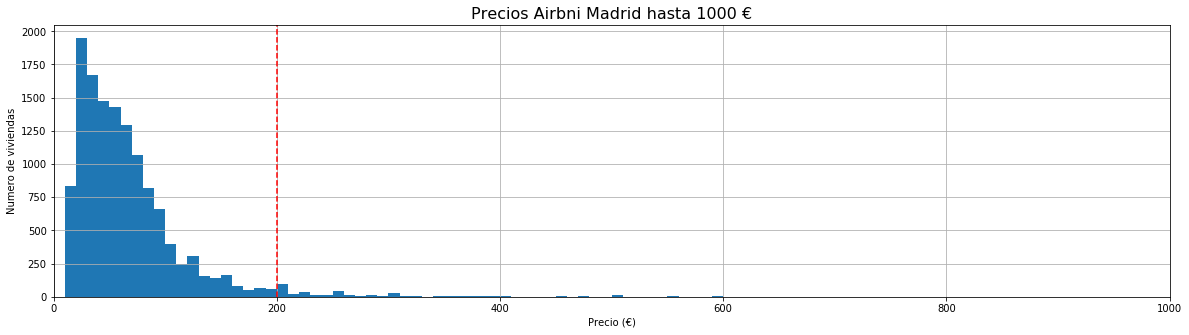

In [0]:
# Distribución  de precios desde 0 € a 1000 €
plt.figure(figsize=(20,5))
house_madrid.Price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='red', linestyle='--')
plt.title("Precios Airbni Madrid hasta 1000 €", fontsize=16)
plt.xlabel("Precio (€)")
plt.ylabel("Numero de viviendas")
plt.show()

Se aprecia que la mayoría de las viviendas tienen un precio por debajo de los 200 € la noche.

In [0]:
#Voy a mirar la vivienda de precio más alto
house_madrid [house_madrid.Price == 875]

ID                                        Picture Url  \
1587  9639826  https://public.opendatasoft.com/api/v2/catalog...   

      Host Response Time Host Response Rate  Host Listings Count  \
1587  within a few hours               100%                 68.0   

     Neighbourhood Cleansed Property Type        Room Type  Accommodates  \
1587            Otro_Barrio         House  Entire home/apt            10   

      Bathrooms  Bedrooms  Beds  Price  Security Deposit  Cleaning Fee  \
1587        5.0       5.0   9.0  875.0               0.0         375.0   

      Guests Included  Extra People  Minimum Nights  Maximum Nights  \
1587                1             0              30            1125   

      Availability 90  Number of Reviews Review Scores Rating  \
1587                0                  0           no reviews   

     Review Scores Accuracy Review Scores Cleanliness Review Scores Checkin  \
1587             no reviews                no reviews            no reviews   

     Review Scores Communication Review Scores Location Review Scores Value  \
1587                  no reviews             no reviews          no reviews   

     Cancellation Policy  Dias_activo  Dryer  Air conditioning  \
1587              strict        712.0    1.0               1.0   

      Carbon monoxide detector  Smoke detector  Smoking allowed  \
1587                       0.0             0.0              1.0   

      Elevator in building  Hangers  Laptop friendly workspace  \
1587                   0.0      1.0                        1.0   

      Fire extinguisher  Hair dryer  Iron  Doorman  Shampoo  \
1587                0.0         1.0   1.0      0.0      0.0   

      Family/kid friendly  Safety card  24-hour check-in  Breakfast  \
1587                  1.0          0.0               1.0        0.0   

      Buzzer/wireless intercom  Pets allowed  Essentials  First aid kit   TV  \
1587                       1.0           0.0         1.0            0.0  1.0   

      Wheelchair accessible  Washer time_since_first_review  \
1587                    0.0     1.0              no reviews   

     time_since_last_review  Is Location Exact  Host Identity Verified  \
1587             no reviews                0.0                     1.0   

      Instant Bookable  Host Is Superhost  
1587               0.0                0.0

Se ve que es una vivienda para 10 personas, con 5 dormitorios

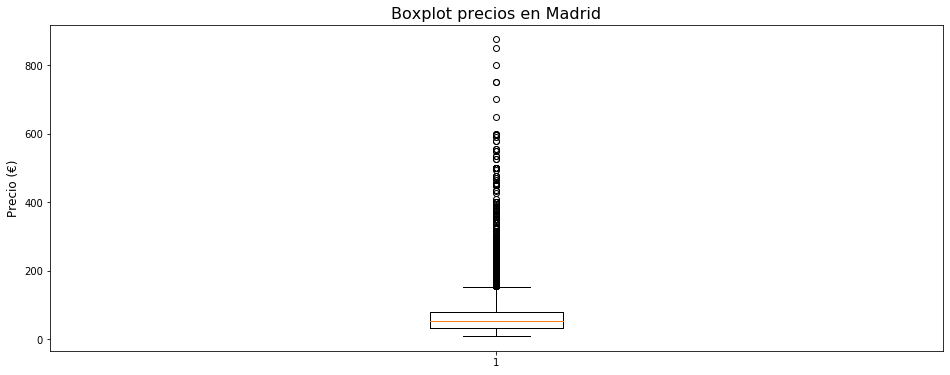

In [0]:
#Dibujo un Boxplot para los precios
plt.figure(figsize=(16,6))
plt.boxplot(house_madrid.Price)
plt.ylabel('Precio (€)', fontsize=12)
plt.title('Boxplot precios en Madrid', fontsize=16)
plt.show()

Tratamiento de outliers: Voy a considerar outiliers a partir de 200. Veo en la distribución que por debajo de ese valor están la mayoría de las observaciones

In [0]:
house_madrid = house_madrid [house_madrid ['Price']<=200]

## Host Listing Count

Revisando los valores llama la atención es Host Listings Count que tiene un máximo de 265


In [0]:
print("Mediana del número de viviendas por host:", int(house_madrid['Host Listings Count'].median()))
print("Media del número de viviendas por host:", int(round(house_madrid['Host Listings Count'].mean())))
print("Mayor número de viviendas por host:", int(round(house_madrid['Host Listings Count'].max())))
print ("Porcentaje de viviendas cuyo anfitrión solo tiene una vivienda:", int(round (100*len(house_madrid[house_madrid["Host Listings Count"] == 1])/len(house_madrid))))

Mediana del número de viviendas por host: 2
Media del número de viviendas por host: 9
Mayor número de viviendas por host: 265
Porcentaje de viviendas cuyo anfitrión solo tiene una vivienda: 44


La media vemos que es significativamente más alta (9) que la mediana lo que significa que hay anfitriones que tienen un número muy alto de propiedades. Se puede ver que el más alto tiene 265 propiedades. El 43% de los anfitriones tienen solo una vivienda pero es muy llamativo que más de la mitad tengan más de una vivienda

In [0]:
#Muestro un listado de los mayores Host Listing Count.
house_madrid.sort_values('Host Listings Count').drop_duplicates('Host Listings Count',keep='last').tail(10)[['Host Listings Count']]

Host Listings Count
8410                  57.0
957                   68.0
8361                  81.0
1437                 114.0
1607                 136.0
13174                142.0
2051                 164.0
10304                207.0
7629                 265.0
14255                  NaN

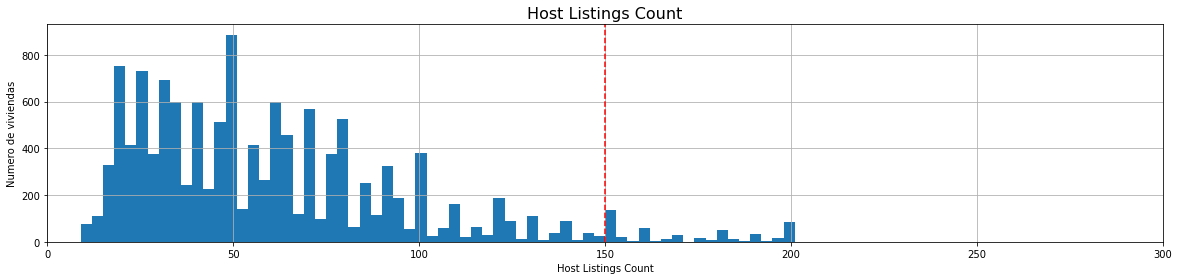

In [0]:
# Distribución  de Host Listings Count desde 0, 300 
plt.figure(figsize=(20,4))
house_madrid.Price.hist(bins=100, range=(0,300))
plt.margins(x=0)
plt.axvline(150, color='red', linestyle='--')
plt.title("Host Listings Count", fontsize=16)
plt.xlabel("Host Listings Count")
plt.ylabel("Numero de viviendas")
plt.show()

De todas formas nos encontramos con dos dificultades para saber el número de propiedades que tiene un anfitrión

1) Anfitriones que tengan más propiedades en Madrid van a aparecer varias veces en el listado ya que el dataset viene a nivel de propiedad y no de anfitrión

2) Un anfitrión puede tener propiedades en otras ciudades

Tratamiento de outliers: Voy a considerar outiliers a partir de 150. Veo en la distribución que por debajo de ese valor están la mayoría de las observaciones

In [0]:
house_madrid = house_madrid [house_madrid ['Host Listings Count']<=150]

Tratamiento de valores missings: Los sustituyo por la mediana

In [0]:
mediana_host_listings_count = house_madrid['Host Listings Count'].median() #Lo guardo para usarlo en test
house_madrid['Host Listings Count'].fillna(house_madrid['Host Listings Count'].median(), inplace=True)

In [0]:
#Compruebo que ya no tengo valores nulos
print("Valores nulos:", house_madrid['Host Listings Count'].isna().sum())
print(f"Proporcion: {round((house_madrid['Host Listings Count'].isna().sum()/len(house_madrid))*100, 1)}%")

Valores nulos: 0
Proporcion: 0.0%


## Accommodates, bathrooms, bedrooms, beds y Guests Included

Analizando lo datos vemos que no parece existir outliers

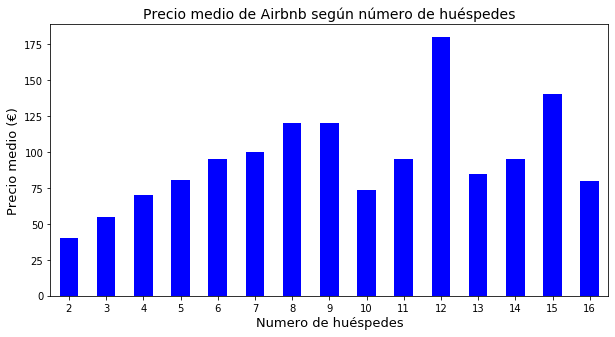

In [0]:
plt.figure(figsize=(10,5))
house_madrid.groupby('Accommodates').Price.median().plot(kind='bar', color='b')
plt.title('Precio medio de Airbnb según número de huéspedes', fontsize=14)
plt.xlabel('Numero de huéspedes', fontsize=13)
plt.ylabel('Precio medio (€)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

Se ve como el precio se va incrementando hasta los 9 huéspedes. Luego sorprendentemente comienza a bajar y a partir de 12 sube de nuevo. Es curioso como el precio para 8 huespedes es similar al de 14

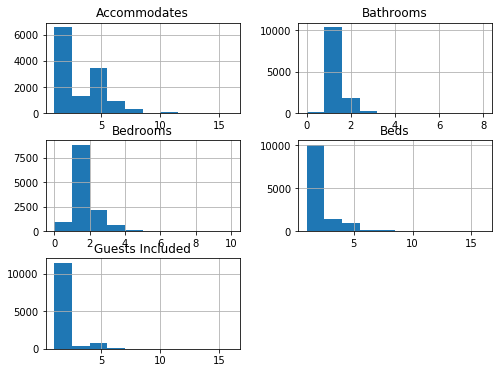

In [0]:
house_madrid[['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included']].hist(figsize=(8,6));

## Security Deposit

In [0]:
print(f"El Security Deposit se encuentran en el rango desde  {min(house_madrid['Security Deposit'])} € to {max(house_madrid['Security Deposit'])} €.")

El Security Deposit se encuentran en el rango desde  0.0 € to 990.0 €.


Me parece un valor muy elevado los 990€. Veamos la distribución que tiene

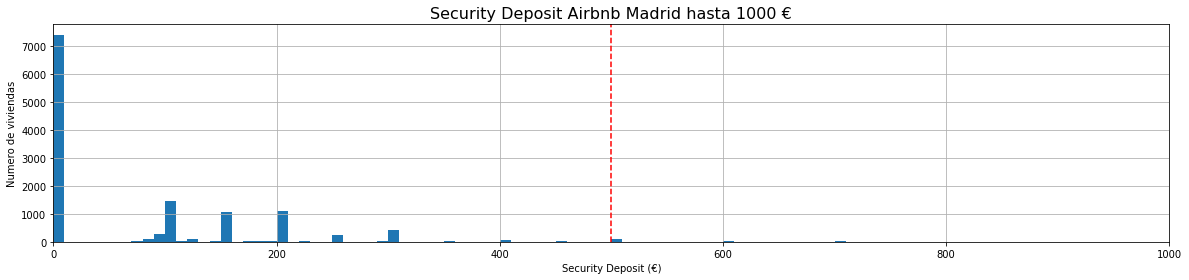

In [0]:
# Distribución  de precios desde 0 € a 1000 €
plt.figure(figsize=(20,4))
house_madrid['Security Deposit'].hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(500, color='red', linestyle='--')
plt.title("Security Deposit Airbnb Madrid hasta 1000 €", fontsize=16)
plt.xlabel("Security Deposit (€)")
plt.ylabel("Numero de viviendas")
plt.show()

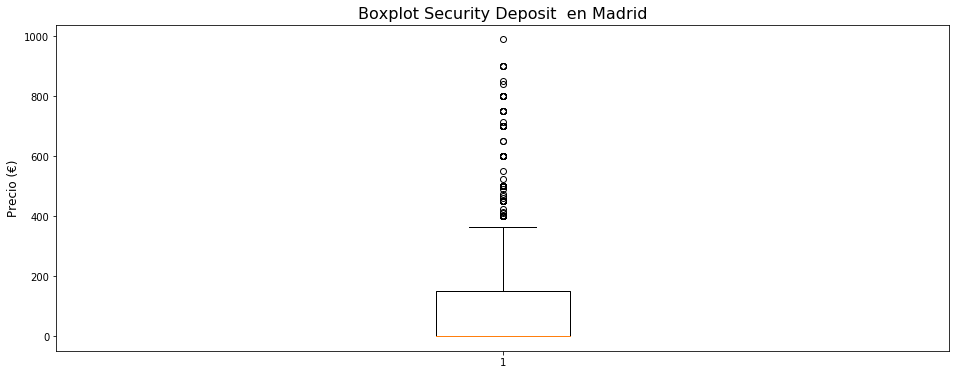

In [0]:
plt.figure(figsize=(16,6))
plt.boxplot(house_madrid['Security Deposit'])
plt.ylabel('Precio (€)', fontsize=12)
plt.title('Boxplot Security Deposit  en Madrid', fontsize=16)
plt.show()

Voy a eliminar aquellos que tienen más de 500 € de Security Deposit

In [0]:
house_madrid = house_madrid [house_madrid ['Security Deposit']<=500]

## Cleaning Fee

In [0]:
print(f"El Cleaning Fee se encuentran en el rango desde  {min(house_madrid['Cleaning Fee'])} € to {max(house_madrid['Cleaning Fee'])} €.")

El Cleaning Fee se encuentran en el rango desde  0.0 € to 250.0 €.


Me parece un valor muy elevado los 250 €. Veamos la distribución que tiene

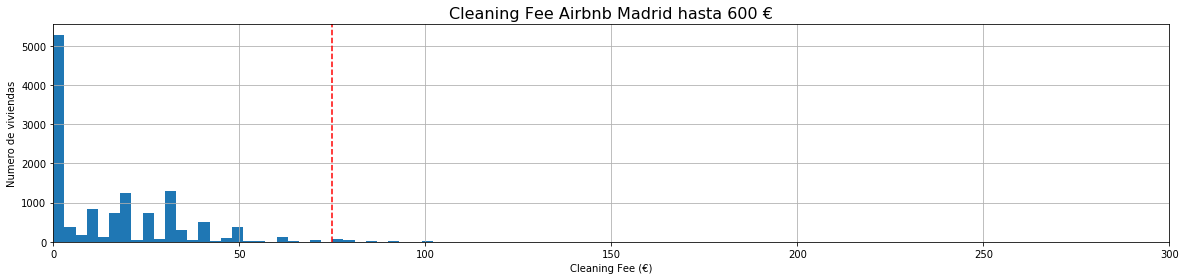

In [0]:
# Distribución  de precios desde 0 € a 300 €
plt.figure(figsize=(20,4))
house_madrid['Cleaning Fee'].hist(bins=100, range=(0,300))
plt.margins(x=0)
plt.axvline(75, color='red', linestyle='--')
plt.title("Cleaning Fee Airbnb Madrid hasta 600 €", fontsize=16)
plt.xlabel("Cleaning Fee (€)")
plt.ylabel("Numero de viviendas")
plt.show()

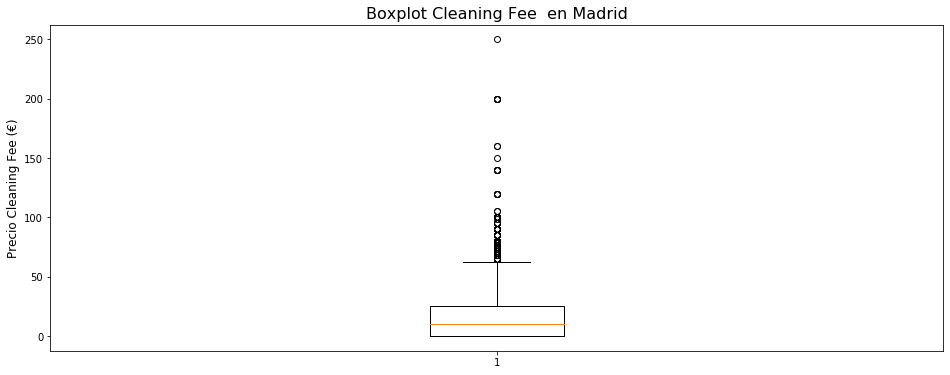

In [0]:
plt.figure(figsize=(16,6))
plt.boxplot(house_madrid['Cleaning Fee'])
plt.ylabel('Precio Cleaning Fee (€)', fontsize=12)
plt.title('Boxplot Cleaning Fee  en Madrid', fontsize=16)
plt.show()

Voy a eliminar aquellos que tienen más de 75 € de Cleaning Fee

In [0]:
house_madrid = house_madrid [house_madrid ['Cleaning Fee']<=75]

## Extra People

In [0]:
print(f"Extra People se encuentran en el rango desde  {min(house_madrid['Extra People'])} € to {max(house_madrid['Extra People'])} €.")

Extra People se encuentran en el rango desde  0 € to 276 €.


Parece que 276 € extra por una persona es un valor demasiado alto. Veamos la distribución

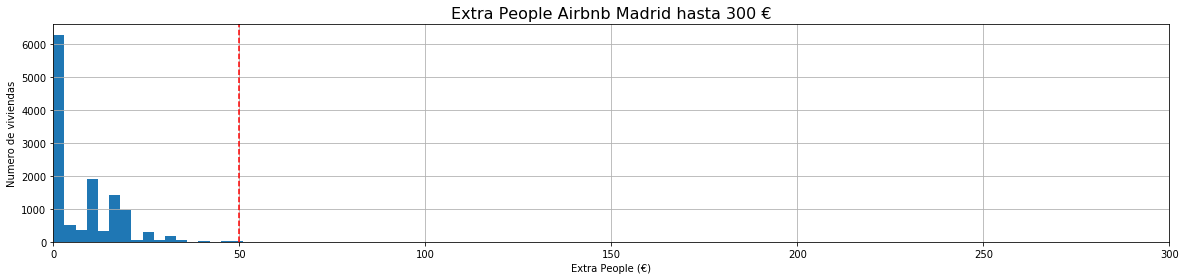

In [0]:
# Distribución  de precios desde 0 € a 300 €
plt.figure(figsize=(20,4))
house_madrid['Extra People'].hist(bins=100, range=(0,300))
plt.margins(x=0)
plt.axvline(50, color='red', linestyle='--')
plt.title("Extra People Airbnb Madrid hasta 300 €", fontsize=16)
plt.xlabel("Extra People (€)")
plt.ylabel("Numero de viviendas")
plt.show()

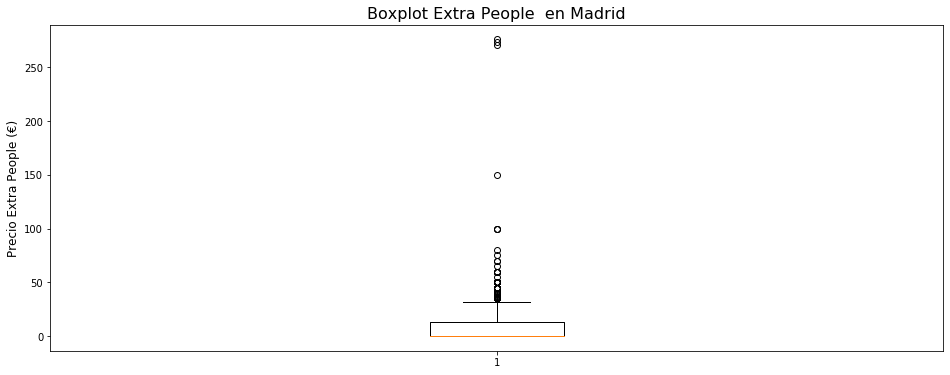

In [0]:
plt.figure(figsize=(16,6))
plt.boxplot(house_madrid['Extra People'])
plt.ylabel('Precio Extra People (€)', fontsize=12)
plt.title('Boxplot Extra People  en Madrid', fontsize=16)
plt.show()

Voy a eliminar aquellos que tienen más de 50 € de Extra People

In [0]:
house_madrid = house_madrid [house_madrid ['Extra People']<=50]

Tratamiento de missings: Lo sustituyo por la mediana

In [0]:
mediana_extra_people = house_madrid['Extra People'].median() #lo guardo para usarlo después en test
house_madrid['Extra People'].fillna(house_madrid['Extra People'].median(), inplace=True)

## Minimum Nights

In [0]:
print(f"Minimum Nights se encuentran en el rango desde  {min(house_madrid['Minimum Nights'])}  to {max(house_madrid['Minimum Nights'])}.")

Minimum Nights se encuentran en el rango desde  1  to 1125.


El valor 1125 es demasiado alto para ser el número mínimo de noches. Veamos la distribución

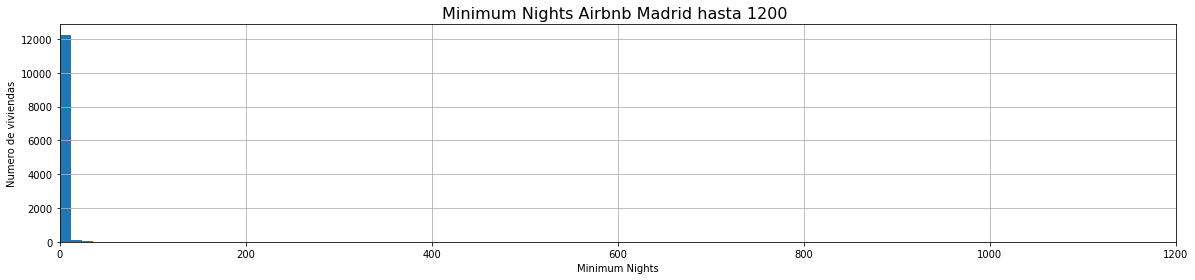

In [0]:
# Distribución  de Minimum Nights desde 0  a 1200 
plt.figure(figsize=(20,4))
house_madrid['Minimum Nights'].hist(bins=100, range=(0,1200))
plt.margins(x=0)
#plt.axvline(50, color='red', linestyle='--')
plt.title("Minimum Nights Airbnb Madrid hasta 1200 ", fontsize=16)
plt.xlabel("Minimum Nights")
plt.ylabel("Numero de viviendas")
plt.show()

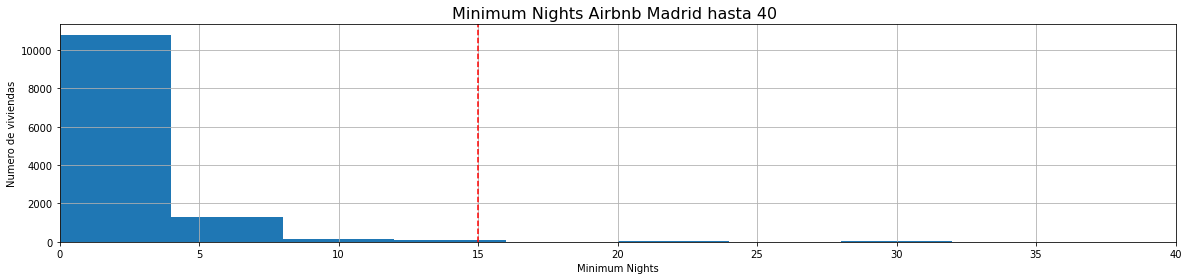

In [0]:
# Distribución  de Minimum Nights desde 0 a 40 
plt.figure(figsize=(20,4))
house_madrid['Minimum Nights'].hist(bins=10, range=(0,40))
plt.margins(x=0)
plt.axvline(15, color='red', linestyle='--')
plt.title("Minimum Nights Airbnb Madrid hasta 40 ", fontsize=16)
plt.xlabel("Minimum Nights")
plt.ylabel("Numero de viviendas")
plt.show()

Voy a eliminar los valores de Minimum Nights mayores a 15

In [0]:
house_madrid = house_madrid [house_madrid ['Minimum Nights']<=15]

Tratamiento de missings: lo sustituyo por la mediana

In [0]:
mediana_minimum_nights = house_madrid['Minimum Nights'].median()  #Lo guardo para usarlo después en test
house_madrid['Minimum Nights'].fillna(house_madrid['Minimum Nights'].median(), inplace=True)

## Maximum Nights

In [0]:
print(f"Maximum Nights se encuentran en el rango desde  {min(house_madrid['Maximum Nights'])}  to {max(house_madrid['Maximum Nights'])}.")

Maximum Nights se encuentran en el rango desde  1  to 1000000.


Claramente hay valores outliers. Veamos la distribución

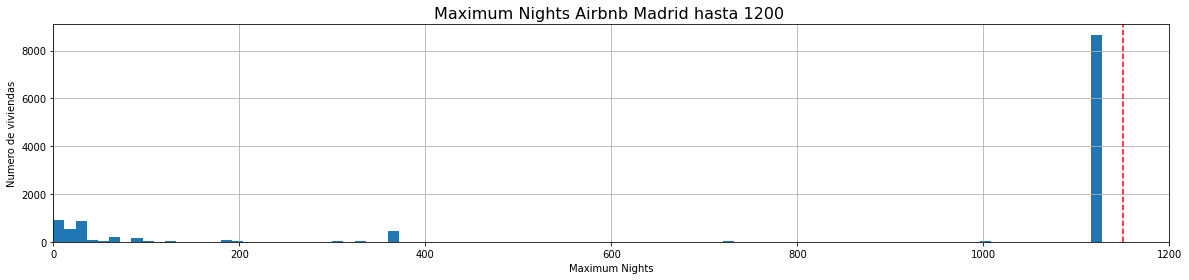

In [0]:
# Distribución  de Minimum Nights desde 0  a 1200 
plt.figure(figsize=(20,4))
house_madrid['Maximum Nights'].hist(bins=100, range=(0,1200))
plt.margins(x=0)
plt.axvline(1150, color='red', linestyle='--')
plt.title("Maximum Nights Airbnb Madrid hasta 1200 ", fontsize=16)
plt.xlabel("Maximum Nights")
plt.ylabel("Numero de viviendas")
plt.show()

Voy a eliminar los valores menos a 1150

In [0]:
house_madrid = house_madrid [house_madrid ['Maximum Nights']<=1150]

Tratamiento de missings: los sustituyo por la mediana

In [0]:
mediana_maximum_nights = house_madrid['Maximum Nights'].median()  #Lo guardo para usarlo después en test
house_madrid['Maximum Nights'].fillna(house_madrid['Maximum Nights'].median(), inplace=True)

In [0]:
house_madrid.describe().T

count          mean           std      min  \
ID                         12289.0  1.045289e+07  5.504631e+06  19864.0   
Host Listings Count        12289.0  5.912442e+00  1.335338e+01      0.0   
Accommodates               12289.0  3.053056e+00  1.821310e+00      1.0   
Bathrooms                  12289.0  1.215762e+00  5.505943e-01      0.0   
Bedrooms                   12289.0  1.235332e+00  7.345090e-01      0.0   
Beds                       12289.0  1.890715e+00  1.368005e+00      1.0   
Price                      12289.0  5.810627e+01  3.539139e+01      9.0   
Security Deposit           12289.0  6.996981e+01  9.935766e+01      0.0   
Cleaning Fee               12289.0  1.439507e+01  1.615257e+01      0.0   
Guests Included            12289.0  1.531044e+00  9.928294e-01      1.0   
Extra People               12289.0  7.143462e+00  8.799969e+00      0.0   
Minimum Nights             12289.0  2.326878e+00  1.893398e+00      1.0   
Maximum Nights             12289.0  8.252499e+02  4.740175e+02      1.0   
Availability 90            12289.0  4.016527e+01  2.926321e+01      0.0   
Number of Reviews          12289.0  2.411002e+01  3.926829e+01      0.0   
Dias_activo                12289.0  8.953742e+02  5.841710e+02      1.0   
Dryer                      12289.0  1.598177e-01  3.664518e-01      0.0   
Air conditioning           12289.0  5.306372e-01  4.990808e-01      0.0   
Carbon monoxide detector   12289.0  1.044023e-01  3.057942e-01      0.0   
Smoke detector             12289.0  1.515176e-01  3.585673e-01      0.0   
Smoking allowed            12289.0  2.691838e-01  4.435537e-01      0.0   
Elevator in building       12289.0  6.011067e-01  4.896907e-01      0.0   
Hangers                    12289.0  6.665310e-01  4.714716e-01      0.0   
Laptop friendly workspace  12289.0  5.145252e-01  4.998093e-01      0.0   
Fire extinguisher          12289.0  1.709659e-01  3.764945e-01      0.0   
Hair dryer                 12289.0  5.546424e-01  4.970255e-01      0.0   
Iron                       12289.0  5.677435e-01  4.954097e-01      0.0   
Doorman                    12289.0  1.915534e-01  3.935395e-01      0.0   
Shampoo                    12289.0  6.414680e-01  4.795889e-01      0.0   
Family/kid friendly        12289.0  5.930507e-01  4.912853e-01      0.0   
Safety card                12289.0  9.821792e-02  2.976212e-01      0.0   
24-hour check-in           12289.0  2.449345e-01  4.300659e-01      0.0   
Breakfast                  12289.0  1.627472e-01  3.691499e-01      0.0   
Buzzer/wireless intercom   12289.0  4.551225e-01  4.980022e-01      0.0   
Pets allowed               12289.0  1.810562e-01  3.850804e-01      0.0   
Essentials                 12289.0  8.630483e-01  3.438104e-01      0.0   
First aid kit              12289.0  2.671495e-01  4.424891e-01      0.0   
TV                         12289.0  7.875336e-01  4.090698e-01      0.0   
Wheelchair accessible      12289.0  1.045651e-01  3.060046e-01      0.0   
Washer                     12289.0  8.517373e-01  3.553746e-01      0.0   
Is Location Exact          12289.0  6.411425e-01  4.796848e-01      0.0   
Host Identity Verified     12289.0  5.685572e-01  4.952978e-01      0.0   
Instant Bookable           12289.0  3.604036e-01  4.801371e-01      0.0   
Host Is Superhost          12289.0  1.201888e-01  3.251954e-01      0.0   

                                 25%         50%         75%         max  
ID                         5948968.0  11608880.0  15369047.0  18109842.0  
Host Listings Count              1.0         2.0         4.0       142.0  
Accommodates                     2.0         2.0         4.0        16.0  
Bathrooms                        1.0         1.0         1.0         8.0  
Bedrooms                         1.0         1.0         1.0        10.0  
Beds                             1.0         1.0         2.0        16.0  
Price                           30.0        50.0        75.0       200.0  
Security Deposit                 0.0         0.0     

##  4.2. Analisis exploratorio de variables de tipo categórico

## Neighbourhood Cleansed

Creo un dataframe para ver el número de viviendas y precio medio por barrio

In [0]:

barrio_df = pd.DataFrame(house_madrid.groupby('Neighbourhood Cleansed').size())
barrio_df.rename(columns={0: 'number_of_listings'}, inplace=True)
barrio_df['median_price'] = house_madrid.groupby('Neighbourhood Cleansed').Price.median().values

In [0]:
#Ordeno de mayor a menor por precio medio de los barrios
barrio_df.sort_values('median_price', ascending=False)

number_of_listings  median_price
Neighbourhood Cleansed                                  
Recoletos                              123          79.0
Sol                                    882          75.0
Cortes                                 662          65.0
Justicia                               713          60.0
Goya                                   201          60.0
Palacio                                977          60.0
Universidad                           1269          60.0
Almagro                                139          58.0
Trafalgar                              260          55.0
Embajadores                           1765          50.0
Lista                                  114          50.0
Argüelles                              248          50.0
Arapiles                               167          49.0
Palos de Moguer                        247          43.0
Gaztambide                             135          39.0
Otro_Barrio                           3619          38.0
Guindalera                             177          37.0
Pacífico                               132          35.5
Acacias                                142          35.5
Delicias                               126          35.0
Puerta del Angel                       191          26.0

## Property Type

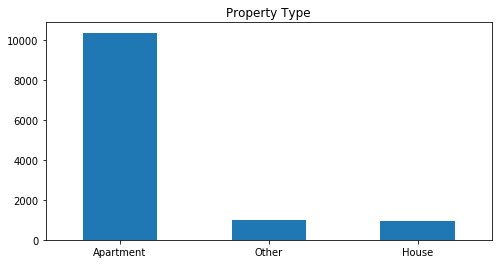

Apartment    0.842542
Other        0.079827
House        0.077630
Name: Property Type, dtype: float64


In [0]:
figsize=(8,4)
plt.figure(figsize=figsize)
house_madrid['Property Type'].value_counts().plot(kind='bar')
plt.title('Property Type')
plt.xticks(rotation=0)
plt.show()
print(house_madrid['Property Type'].value_counts(normalize=True))

El 85% de las viviendas son de tipo "Apartament". El resto está repartido entre los de tipo "House" y "Other" (otros tipos de viviendas, menos comunes)

## Room Type

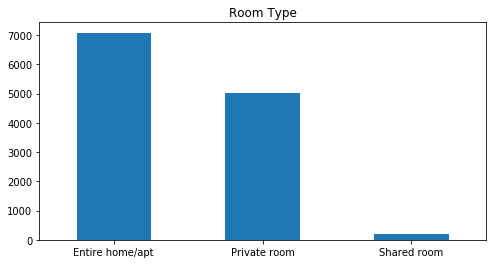

Entire home/apt    0.576044
Private room       0.408577
Shared room        0.015380
Name: Room Type, dtype: float64


In [0]:
figsize=(8,4)
plt.figure(figsize=figsize)
house_madrid['Room Type'].value_counts().plot(kind='bar')
plt.title('Room Type')
plt.xticks(rotation=0)
plt.show()
print(house_madrid['Room Type'].value_counts(normalize=True))

El 58% de las viviendas son de alquiler completo "Entire home/apt". El 40% son "Private Room" mientras que solo un 1% son "Shared room"

## Review Scores

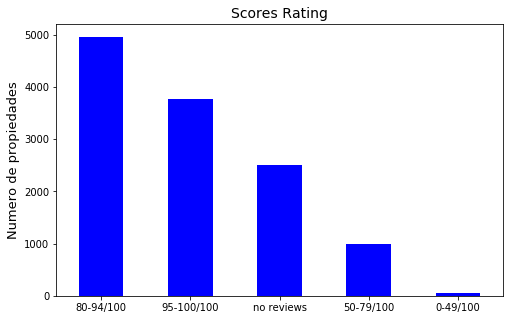

80-94/100     0.403613
95-100/100    0.306453
no reviews    0.204004
50-79/100     0.081129
0-49/100      0.004801
Name: Review Scores Rating, dtype: float64


In [0]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Scores Rating', fontsize=14)
house_madrid['Review Scores Rating'].value_counts().plot(kind='bar', ax=ax, color='b')
plt.xticks(rotation=0)
ax.set_ylabel('Numero de propiedades', fontsize=13)
plt.show()
print(house_madrid['Review Scores Rating'].value_counts(normalize=True))

Se puede ver que la mayoría de las propiedades 40% tienen un rating entre 80-94 sobre 100 y un 30% entre 95-100 por lo que la opinión de los huéspedes es muy favorable

Veamos ahora todos los scores rating con sus categorías:


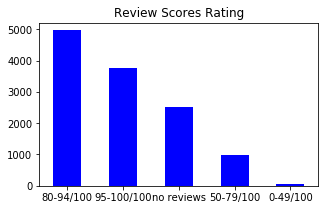

80-94/100     0.403613
95-100/100    0.306453
no reviews    0.204004
50-79/100     0.081129
0-49/100      0.004801
Name: Review Scores Rating, dtype: float64


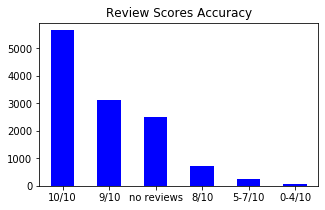

10/10         0.459435
9/10          0.253153
no reviews    0.204899
8/10          0.058345
5-7/10        0.020181
0-4/10        0.003987
Name: Review Scores Accuracy, dtype: float64


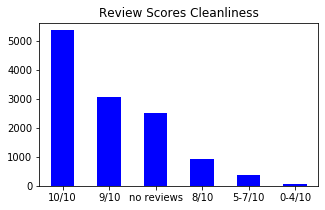

10/10         0.434942
9/10          0.248678
no reviews    0.204492
8/10          0.076410
5-7/10        0.031329
0-4/10        0.004150
Name: Review Scores Cleanliness, dtype: float64


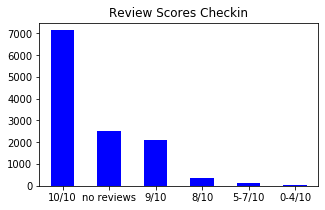

10/10         0.580031
no reviews    0.205631
9/10          0.171617
8/10          0.030922
5-7/10        0.009521
0-4/10        0.002278
Name: Review Scores Checkin, dtype: float64


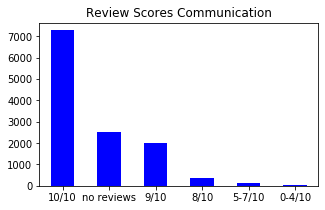

10/10         0.591749
no reviews    0.204492
9/10          0.163561
8/10          0.028399
5-7/10        0.009439
0-4/10        0.002360
Name: Review Scores Communication, dtype: float64


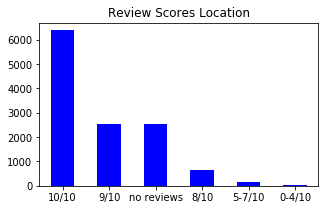

10/10         0.518919
9/10          0.207991
no reviews    0.205875
8/10          0.053300
5-7/10        0.012857
0-4/10        0.001058
Name: Review Scores Location, dtype: float64


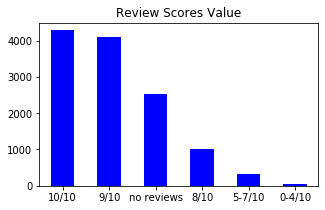

10/10         0.347953
9/10          0.333957
no reviews    0.205875
8/10          0.082187
5-7/10        0.026284
0-4/10        0.003743
Name: Review Scores Value, dtype: float64


In [0]:
figsize= figsize=(5,3)
for col in list(house_madrid.columns[house_madrid.columns.str.startswith("Review Scores") == True]):
    
    plt.figure(figsize=figsize)
    house_madrid[col].value_counts().plot(kind='bar', color='b')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()
    print(house_madrid[col].value_counts(normalize=True))
    
    
    

Vemos que para cada categoría la mayoría de las viviendas tienen una puntación de 10/10. Por debajo de 8 ya son raras las viviendas que hay. La más alta puntación se la lleva la categoría de Checkin con un 58% de viviendas valoradas con un 10 y de Communication con un 59%

## time_since_first_review  y time_since_last_review

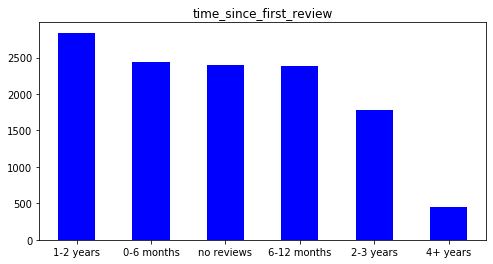

1-2 years      0.231101
0-6 months     0.198470
no reviews     0.195378
6-12 months    0.193588
2-3 years      0.144438
4+ years       0.037025
Name: time_since_first_review, dtype: float64


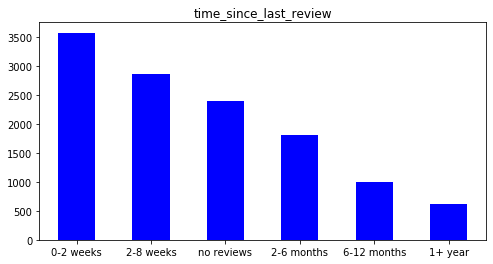

0-2 weeks      0.291236
2-8 weeks      0.233217
no reviews     0.195459
2-6 months     0.147612
6-12 months    0.081618
1+ year        0.050858
Name: time_since_last_review, dtype: float64


In [0]:
figsize = figsize=(8,4)
for col in ['time_since_first_review', 'time_since_last_review']:
    plt.figure(figsize=figsize)
    house_madrid[col].value_counts().plot(kind='bar', color='b')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()
    print(house_madrid[col].value_counts(normalize=True))

La mayoría de las propiedades tienen su primer review 1-2 años antes de la fecha de la toma de datos (08/04/2017), esto significa que la mayoría de las propiedades han estado activas al menos durante 1-2 años. Sin embargo se ve que hay muy pocas que hayan estado activas durante más de 4 años.
Se ve además que la mayoría tienen su último review 0-2 semanas antes de la fecha de la toma de datos lo que significa que la mayoría están activas y recibiendo visitas

## Host Response Rate

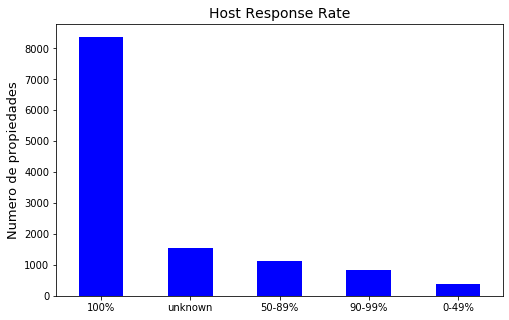

100%       0.681178
unknown    0.126373
50-89%     0.091464
90-99%     0.068923
0-49%      0.032061
Name: Host Response Rate, dtype: float64


In [0]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Host Response Rate', fontsize=14)
house_madrid['Host Response Rate'].value_counts().plot(kind='bar', ax=ax, color='b')
plt.xticks(rotation=0)
ax.set_ylabel('Numero de propiedades', fontsize=13)
plt.show()
print(house_madrid['Host Response Rate'].value_counts(normalize=True))

El 68% de las anfitriones tienen un Host Response Rate del 100%. Hay un 12% que no tienen valoración

##  4.3. Analisis exploratorio de variables de tipo booleano

Muchas características son de tipo booleano (true o false). En esta parte de análisis veremos que proporción es true o false de cada característica y la media del precio de cada categoría para estudiar la relación entre esa categoría y el precio

In [0]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    house_madrid.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    house_madrid.groupby(col).Price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Precio medio (€)')
    ax2.set_xlabel('')
    
    plt.show()

## Host Is Superhost

Vamos a ver que proporción de anfitriones son Superhosts y si merece la pena ser uno de ellos en cuanto al precio

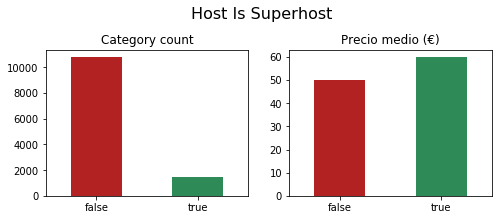

0.0    0.879811
1.0    0.120189
Name: Host Is Superhost, dtype: float64


In [0]:
binary_count_and_price_plot('Host Is Superhost')
print(house_madrid ['Host Is Superhost'].value_counts(normalize=True))

Un 11% son Superhost y si parece que influye en el precio siendo el precio algo más alto, por lo que parece que merece la pena convertirse en Superhost

## Is Location Exact

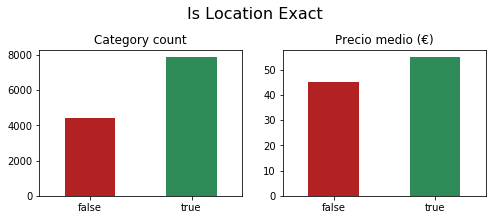

1.0    0.641142
0.0    0.358858
Name: Is Location Exact, dtype: float64


In [0]:
binary_count_and_price_plot('Is Location Exact')
print(house_madrid ['Is Location Exact'].value_counts(normalize=True))

El 64% de las viviendas tiene localización exacta y parece influir positivamente en el precio

## Host Identity Verified


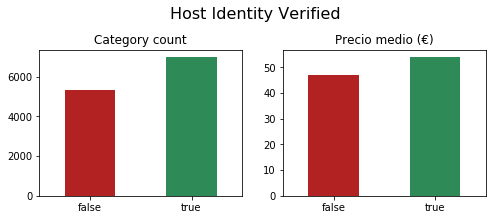

1.0    0.568557
0.0    0.431443
Name: Host Identity Verified, dtype: float64


In [0]:
binary_count_and_price_plot('Host Identity Verified')
print(house_madrid ['Host Identity Verified'].value_counts(normalize=True))

Un 57% de los anfitriones tienen verificada su identidad. Cabría esperar que esto diera más confianza a los huéspedes pero se ve que a nivel de precio la diferencia es poca (aunque la hay). Podríamos plantearnos eliminar esta categoría aunque de momento la dejo por si tuviera interacciones con otras

## Instant Bookable

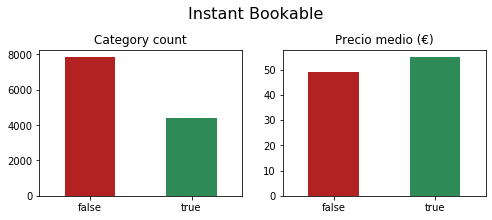

0.0    0.639596
1.0    0.360404
Name: Instant Bookable, dtype: float64


In [0]:
binary_count_and_price_plot('Instant Bookable')
print(house_madrid ['Instant Bookable'].value_counts(normalize=True))

Solo un 36% de las propiedades se pueden alquilar de forma inmediata. Esta característica parece que influye positivamente en el precio.

## Amenities

Voy a ver que comodidad de las ofrecidas es la más común y cuales incrementa el precio de alquilé

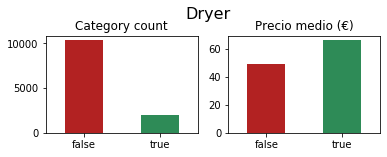

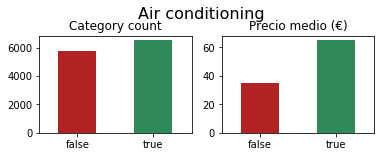

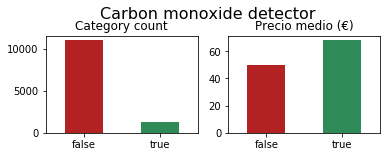

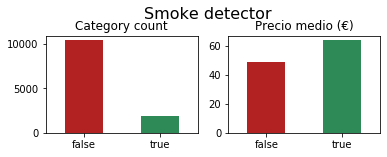

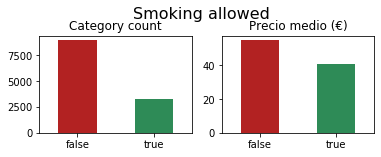

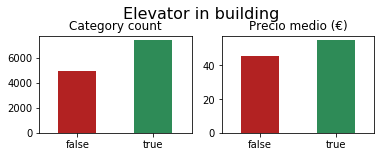

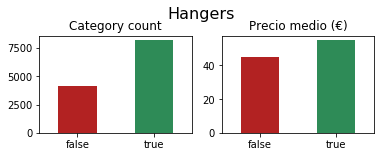

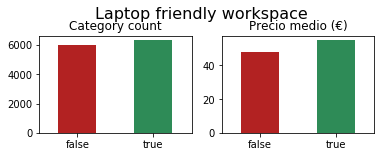

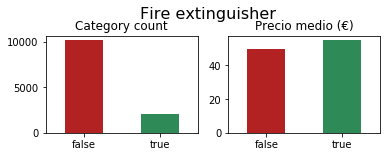

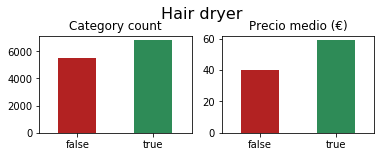

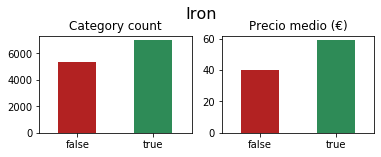

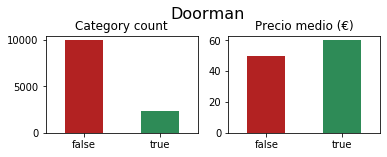

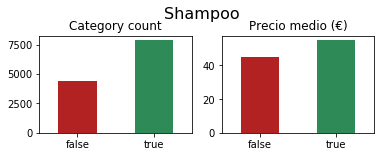

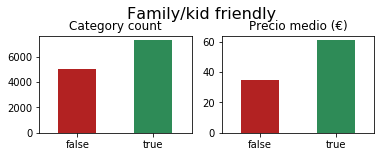

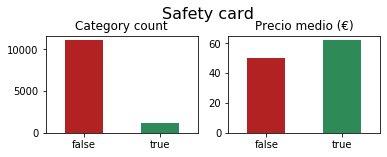

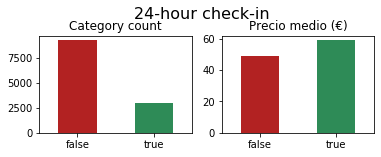

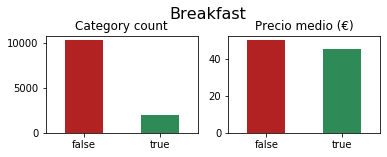

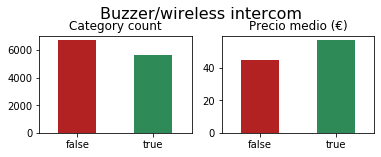

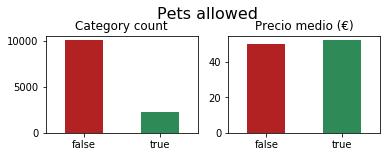

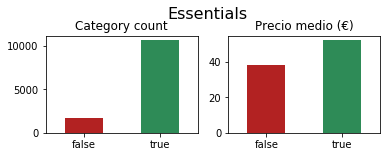

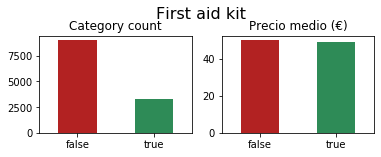

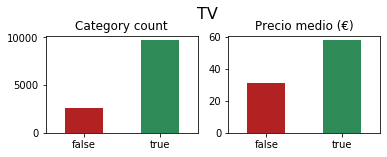

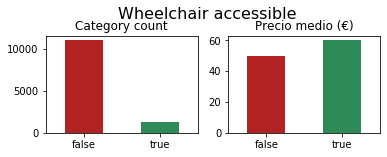

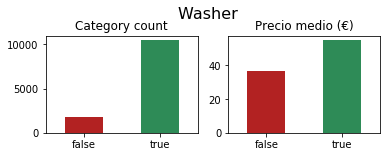

In [0]:
indice_inicial = house_madrid.columns.get_loc("Dias_activo")+1
indice_final = house_madrid.columns.get_loc("time_since_first_review")
for col in house_madrid.iloc[:,indice_inicial:indice_final].columns:
    binary_count_and_price_plot(col, figsize=(6,2))

Tras analizar los gráficos anteriores podemos sacar dividir las características de esta forma:

Características poco comunes pero que aumentan el precio medio:

- Doorman
- Fire extinguisher
- Dryer
- Carbon monixide detector
- Smoke detector
- Wheelchair accesible
- 24-hour check-in
- Safety card

Características muy comunes y que aumentan el precio medio:

- Family/kid friendly
- Iron
- Elevator
- Air conditioning
- Essentials
- Washer
- Shampoo
- TV
- Hair dryer

Características poco comunes y que bajan el precio medio:

- Smoking allowed
- Breakfast (probablemente porque estos sean de tipo bed&breakfast y por tanto no sean de alquilé completo por lo que el precio será menor)

Características poco comunes pero que no provocan diferencia de precio

- First aid kit
- Pets allowed




En base a este análisis para mejorar el precio de una vivienda habría que asegurarse de tener las características comunes y añadir alguna de las poco comunes que mejoran el precio

# 5.- Preparación de datos para el modelado

## 5.1.- Codificación de variables categóricas

Tenemos varias variables categóricas que hay que codificar para el modelado. Utilizo el método get_dummies que se puede aplicar directamente sobre el dataframe. Quito para la transformación la columna Picture URL

In [0]:
transformed_df = pd.get_dummies(house_madrid.drop(['Picture Url'], axis=1))
transformed_df.head()

ID  Host Listings Count  Accommodates  Bathrooms  Bedrooms  Beds  \
40   6478626                  3.0             2        2.0       1.0   1.0   
41   4941335                  1.0             2        1.0       0.0   1.0   
42  12510355                  2.0             3        1.0       0.0   2.0   
43   4756811                  8.0             1        1.0       1.0   1.0   
44  15332216                  2.0             6        1.0       2.0   3.0   

    Price  Security Deposit  Cleaning Fee  Guests Included  Extra People  \
40   28.0               0.0           0.0                1             5   
41   58.0             100.0           0.0                1             0   
42   70.0             150.0          30.0                2            15   
43   26.0               0.0           0.0                1             0   
44   70.0               0.0          20.0                1            10   

    Minimum Nights  Maximum Nights  Availability 90  Number of Reviews  \
40               1            1125               12                171   
41               2            1125                9                 52   
42               2            1125               32                 36   
43               7            1125               59                 15   
44               2            1125                0                  0   

    Dias_activo  Dryer  Air conditioning  Carbon monoxide detector  \
40        823.0    0.0               0.0                       0.0   
41        828.0    0.0               1.0                       0.0   
42        355.0    0.0               1.0                       0.0   
43       1673.0    0.0               0.0                       0.0   
44       1200.0    0.0               1.0                       0.0   

    Smoke detector  Smoking allowed  Elevator in building  Hangers  \
40             0.0              0.0                   0.0      0.0   
41             0.0              0.0                   1.0      0.0   
42             0.0              1.0                   1.0      1.0   
43             0.0              0.0                   1.0      0.0   
44             1.0              0.0                   1.0      1.0   

    Laptop friendly workspace  Fire extinguisher  Hair dryer  Iron  Doorman  \
40                        0.0                0.0         1.0   1.0      0.0   
41                        0.0                0.0         0.0   0.0      0.0   
42                        1.0                0.0         1.0   0.0      0.0   
43                        0.0                1.0         0.0   0.0      1.0   
44                        1.0                1.0         0.0   1.0      1.0   

    Shampoo  Family/kid friendly  Safety card  24-hour check-in  Breakfast  \
40      0.0                  0.0          0.0               0.0        0.0   
41      1.0                  1.0          0.0               0.0        0.0   
42      1.0                  1.0          0.0               1.0        0.0   
43      0.0                  0.0          0.0               0.0        0.0   
44      1.0                  1.0          1.0               1.0        0.0   

    Buzzer/wireless intercom  Pets allowed  Essentials  First aid kit   TV  \
40                       0.0           0.0         1.0            0.0  1.0   
41                       0.0           0.0         1.0            1.0  1.0   
42                       1.0           0.0         1.0            0.0  1.0   
43                       1.0           0.0         0.0            0.0  0.0   
44                       1.0           0.0         1.0            1.0  1.0   

    Wheelchair accessible  Washer  Is Location Exact  Host Identity Verified  \
40                    0.0     0.0                0.0                     0.0   
41                    0.0     1.0                1.0                     0.0   
42                    0.0     1.0                1.0                     1.0   
43                    0.0     1.0                1.0            

## 5.2. Análsis de correlación

El siguiente paso consiste en evaluar las correlaciones entre las diferente variables del problema. Habitualmente, esto nos puede servir para identificar posibles atributos que estén altamente correlacionados. Las altamente correladas se podrían eliminar

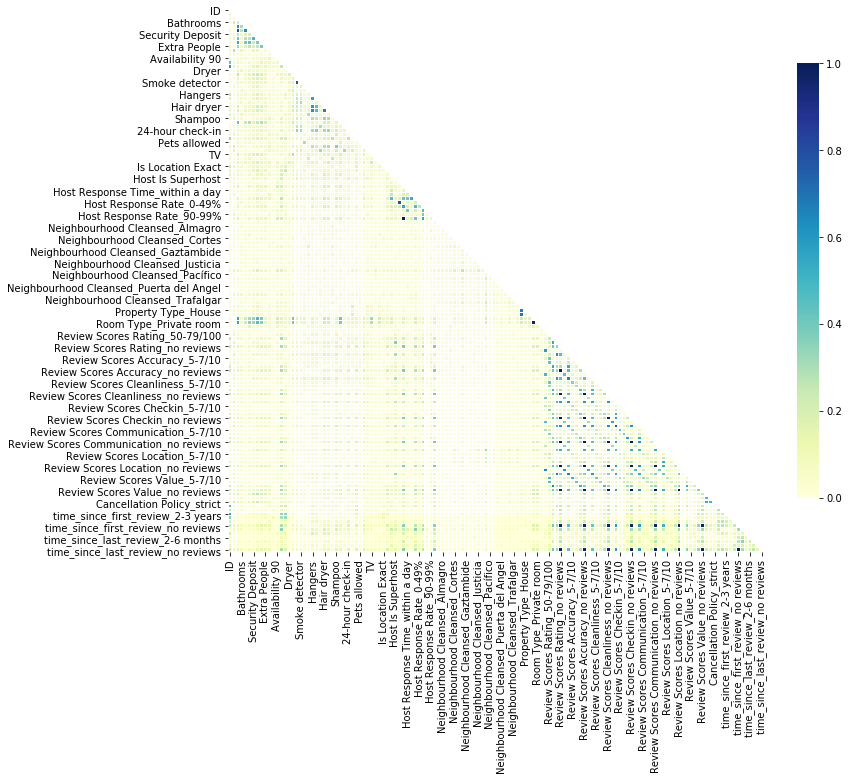

In [0]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(transformed_df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

No parece haber una ninguna correlación relevante con los barrios así que temporalmente los voy a quitar para poder ver el mapa anterior más claro

In [0]:
transformed_df_sinbarrios = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('Neighbourhood')]), axis=1)

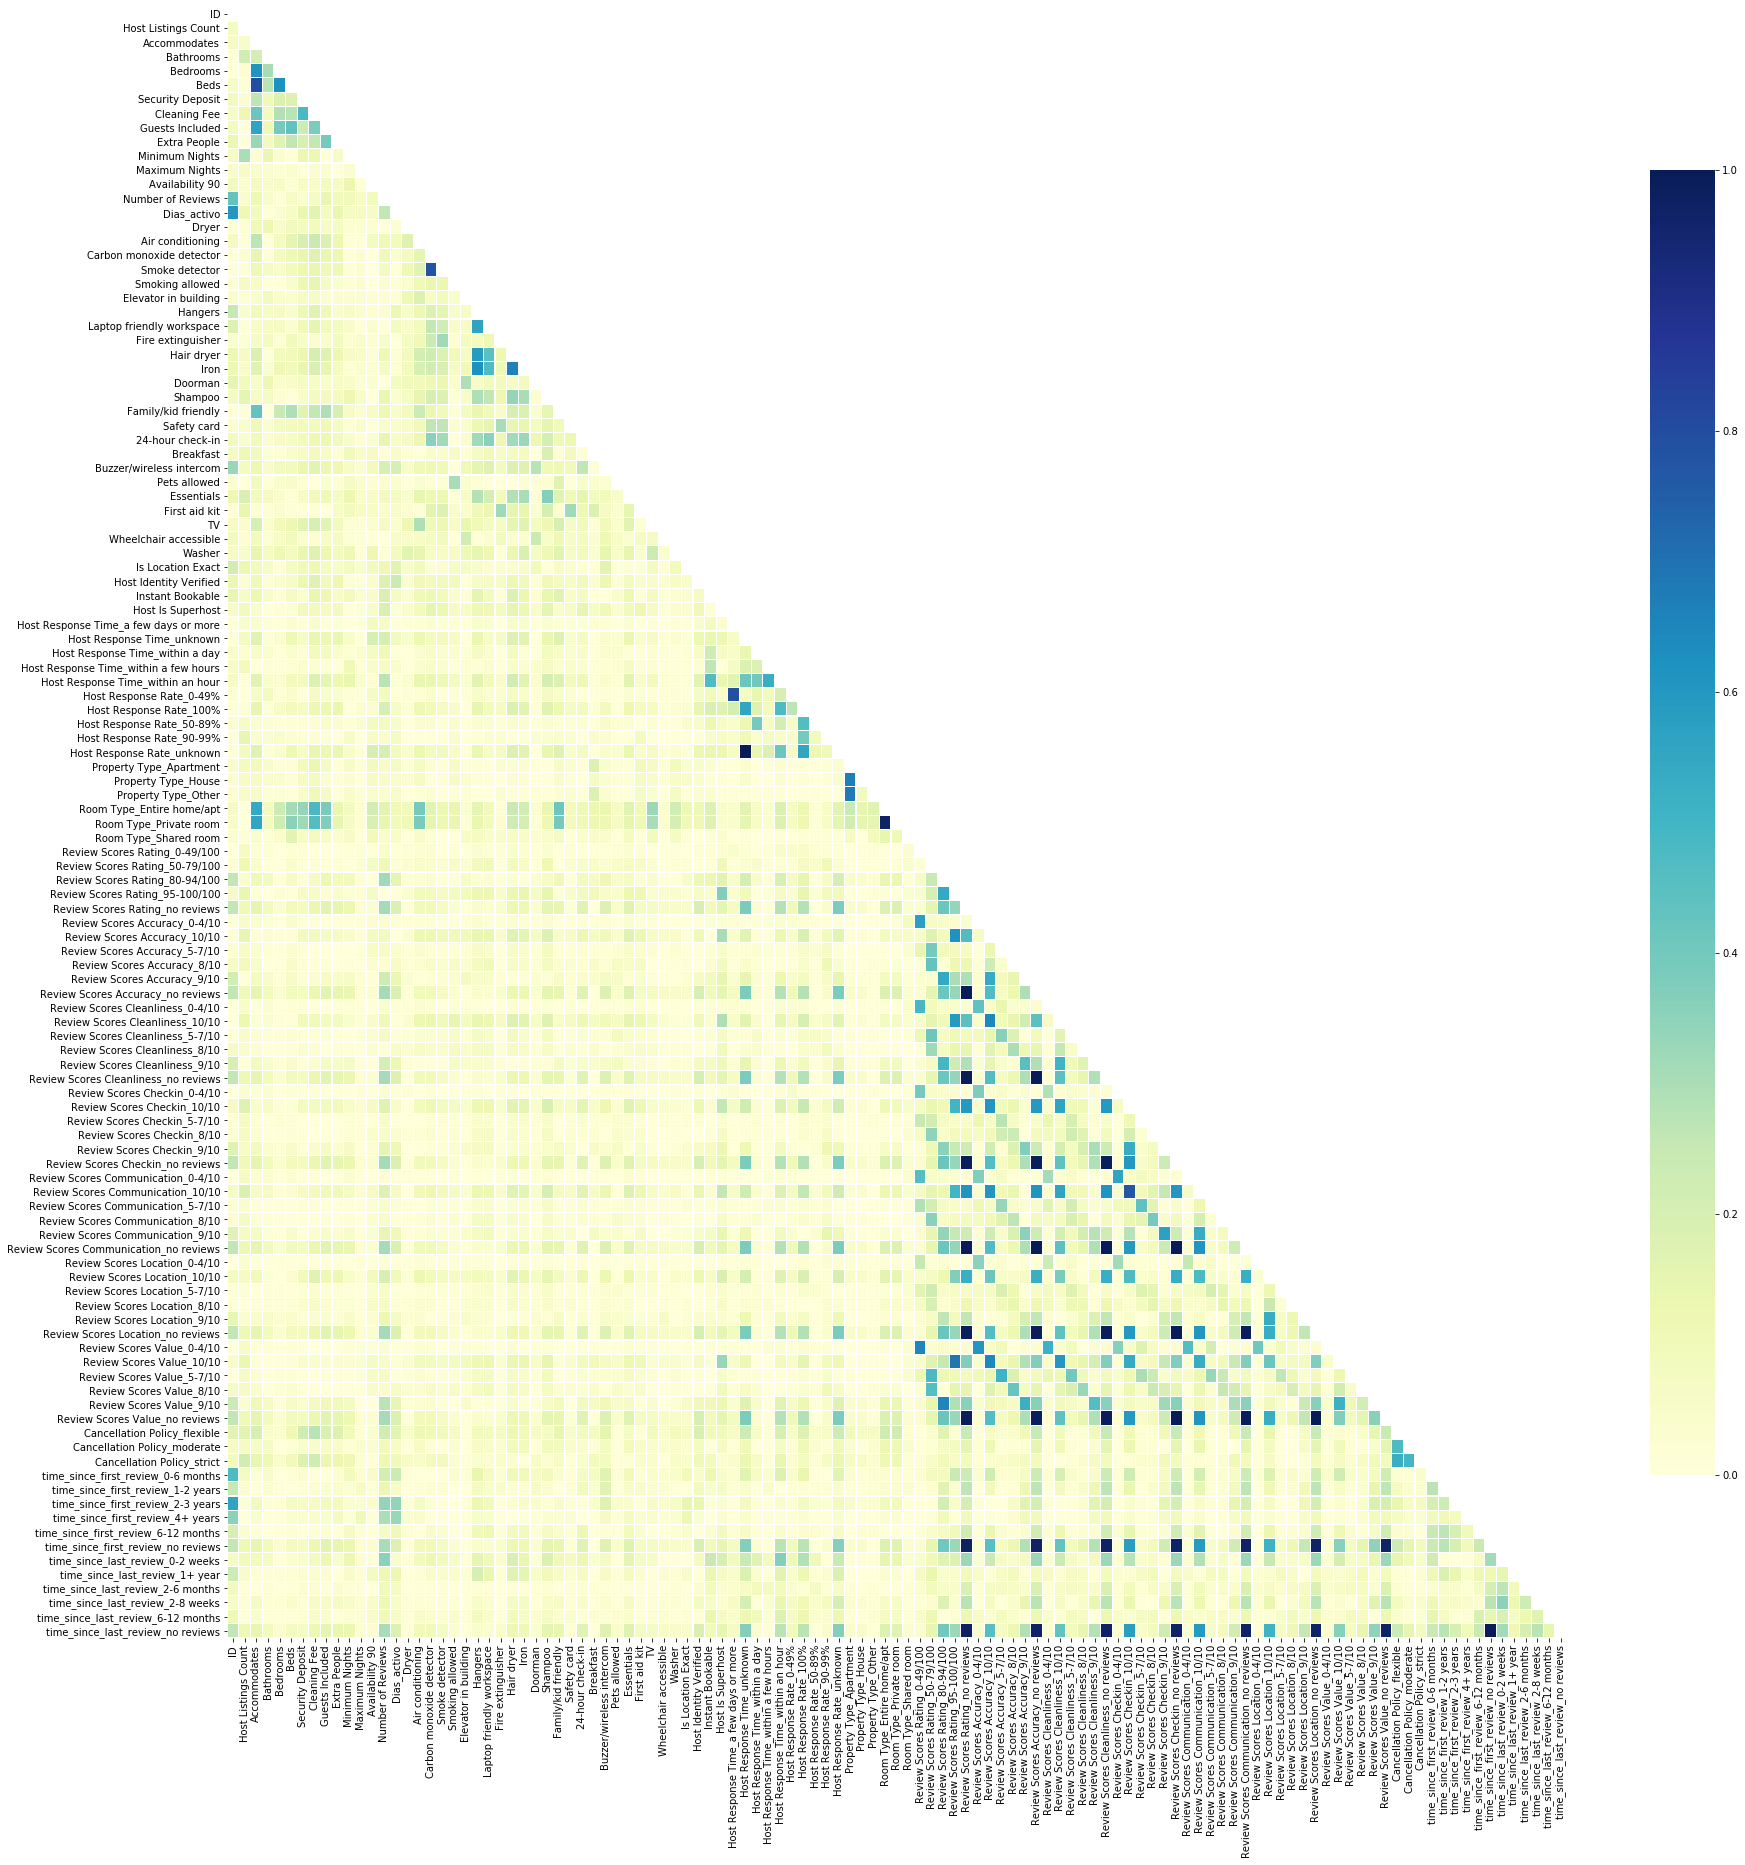

In [0]:
# Compute the correlation matrix
corr = np.abs(transformed_df_sinbarrios.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Tras analizar la matriz de correlación vemos:

- Beds, Beedrooms, Accomodates y Guest Included están altamente correlados. Me voy a quedar con Accomodates que suele ser el parámetro que se usa más en la búsquedas y eliminaré los otros 3

- A nivel de Amenities se ve que existe alta correlación entre " Carbon monoxide detector" y "Smoke detector" lo cual tiene sentido porque seguramente se usa el mismo dispositivo. Me quedo con "Smoke detector" y elimino la otra

- También existe una alta correlación entre "Host Response Rate_0-49%" y "Host Response Time_a few days or more". Elimino "Host Response Rate_0-49%"

- Alta correlación hay también entre "Host Response Rate_unknown" y Host Response Time_unknown. Elimino "Host Response Rate_unknown"


- Igualmente existe alta correlación negativa entre Property Type_Apartment y Property Type_House. Voy a eliminar Property Type_House y me quedo con la de tipo Apartamento.

- Tenemos también alta correlación negativa entre Room Type_Entire home/apt y Room Type_Private room. Voy a eliminar Room Type_Private room

- Y por último obviamente tenemos una alta correlación entre las diferentes categoría de Review Scores de tipo "no reviews" y "time_since_first_review_no reviews" y "time_since_last_review_no reviews". Elimino todas estas caractarísticas "no review"

In [0]:
to_drop = ['Beds',
           'Bedrooms',
           'Guests Included', 
           'Carbon monoxide detector',
           'Host Response Rate_0-49%',
           'Host Response Rate_unknown',
           'Property Type_House',
           'Room Type_Private room']

to_drop.extend(list(transformed_df.columns[transformed_df.columns.str.endswith('no reviews')]))
           
           

In [0]:
transformed_df.drop(to_drop, axis=1, inplace=True)

In [0]:
transformed_df.head(5)

ID  Host Listings Count  Accommodates  Bathrooms  Price  \
40   6478626                  3.0             2        2.0   28.0   
41   4941335                  1.0             2        1.0   58.0   
42  12510355                  2.0             3        1.0   70.0   
43   4756811                  8.0             1        1.0   26.0   
44  15332216                  2.0             6        1.0   70.0   

    Security Deposit  Cleaning Fee  Extra People  Minimum Nights  \
40               0.0           0.0             5               1   
41             100.0           0.0             0               2   
42             150.0          30.0            15               2   
43               0.0           0.0             0               7   
44               0.0          20.0            10               2   

    Maximum Nights  Availability 90  Number of Reviews  Dias_activo  Dryer  \
40            1125               12                171        823.0    0.0   
41            1125                9                 52        828.0    0.0   
42            1125               32                 36        355.0    0.0   
43            1125               59                 15       1673.0    0.0   
44            1125                0                  0       1200.0    0.0   

    Air conditioning  Smoke detector  Smoking allowed  Elevator in building  \
40               0.0             0.0              0.0                   0.0   
41               1.0             0.0              0.0                   1.0   
42               1.0             0.0              1.0                   1.0   
43               0.0             0.0              0.0                   1.0   
44               1.0             1.0              0.0                   1.0   

    Hangers  Laptop friendly workspace  Fire extinguisher  Hair dryer  Iron  \
40      0.0                        0.0                0.0         1.0   1.0   
41      0.0                        0.0                0.0         0.0   0.0   
42      1.0                        1.0                0.0         1.0   0.0   
43      0.0                        0.0                1.0         0.0   0.0   
44      1.0                        1.0                1.0         0.0   1.0   

    Doorman  Shampoo  Family/kid friendly  Safety card  24-hour check-in  \
40      0.0      0.0                  0.0          0.0               0.0   
41      0.0      1.0                  1.0          0.0               0.0   
42      0.0      1.0                  1.0          0.0               1.0   
43      1.0      0.0                  0.0          0.0               0.0   
44      1.0      1.0                  1.0          1.0               1.0   

    Breakfast  Buzzer/wireless intercom  Pets allowed  Essentials  \
40        0.0                       0.0           0.0         1.0   
41        0.0                       0.0           0.0         1.0   
42        0.0                       1.0           0.0         1.0   
43        0.0                       1.0           0.0         0.0   
44        0.0                       1.0           0.0         1.0   

    First aid kit   TV  Wheelchair accessible  Washer  Is Location Exact  \
40            0.0  1.0                    0.0     0.0                0.0   
41            1.0  1.0                    0.0     1.0                1.0   
42            0.0  1.0                    0.0     1.0                1.0   
43            0.0  0.0                    0.0     1.0                1.0   
44            1.0  1.0                    0.0     1.0                1.0   

    Host Identity Verified  Instant Bookable  Host Is Superhost  \
40                     0.0               1.0                0.0   
41                     0.0               0.0                0.0   
42                     1.0               0.0                0.0   
43                     0.0               0.0                0.0   
44                     1.0               0.0                0.0   

    Host Response Time_a few days o

Así quedan ahora las correlaciones:

In [0]:
transformed_df_sinbarrios = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('Neighbourhood')]), axis=1)

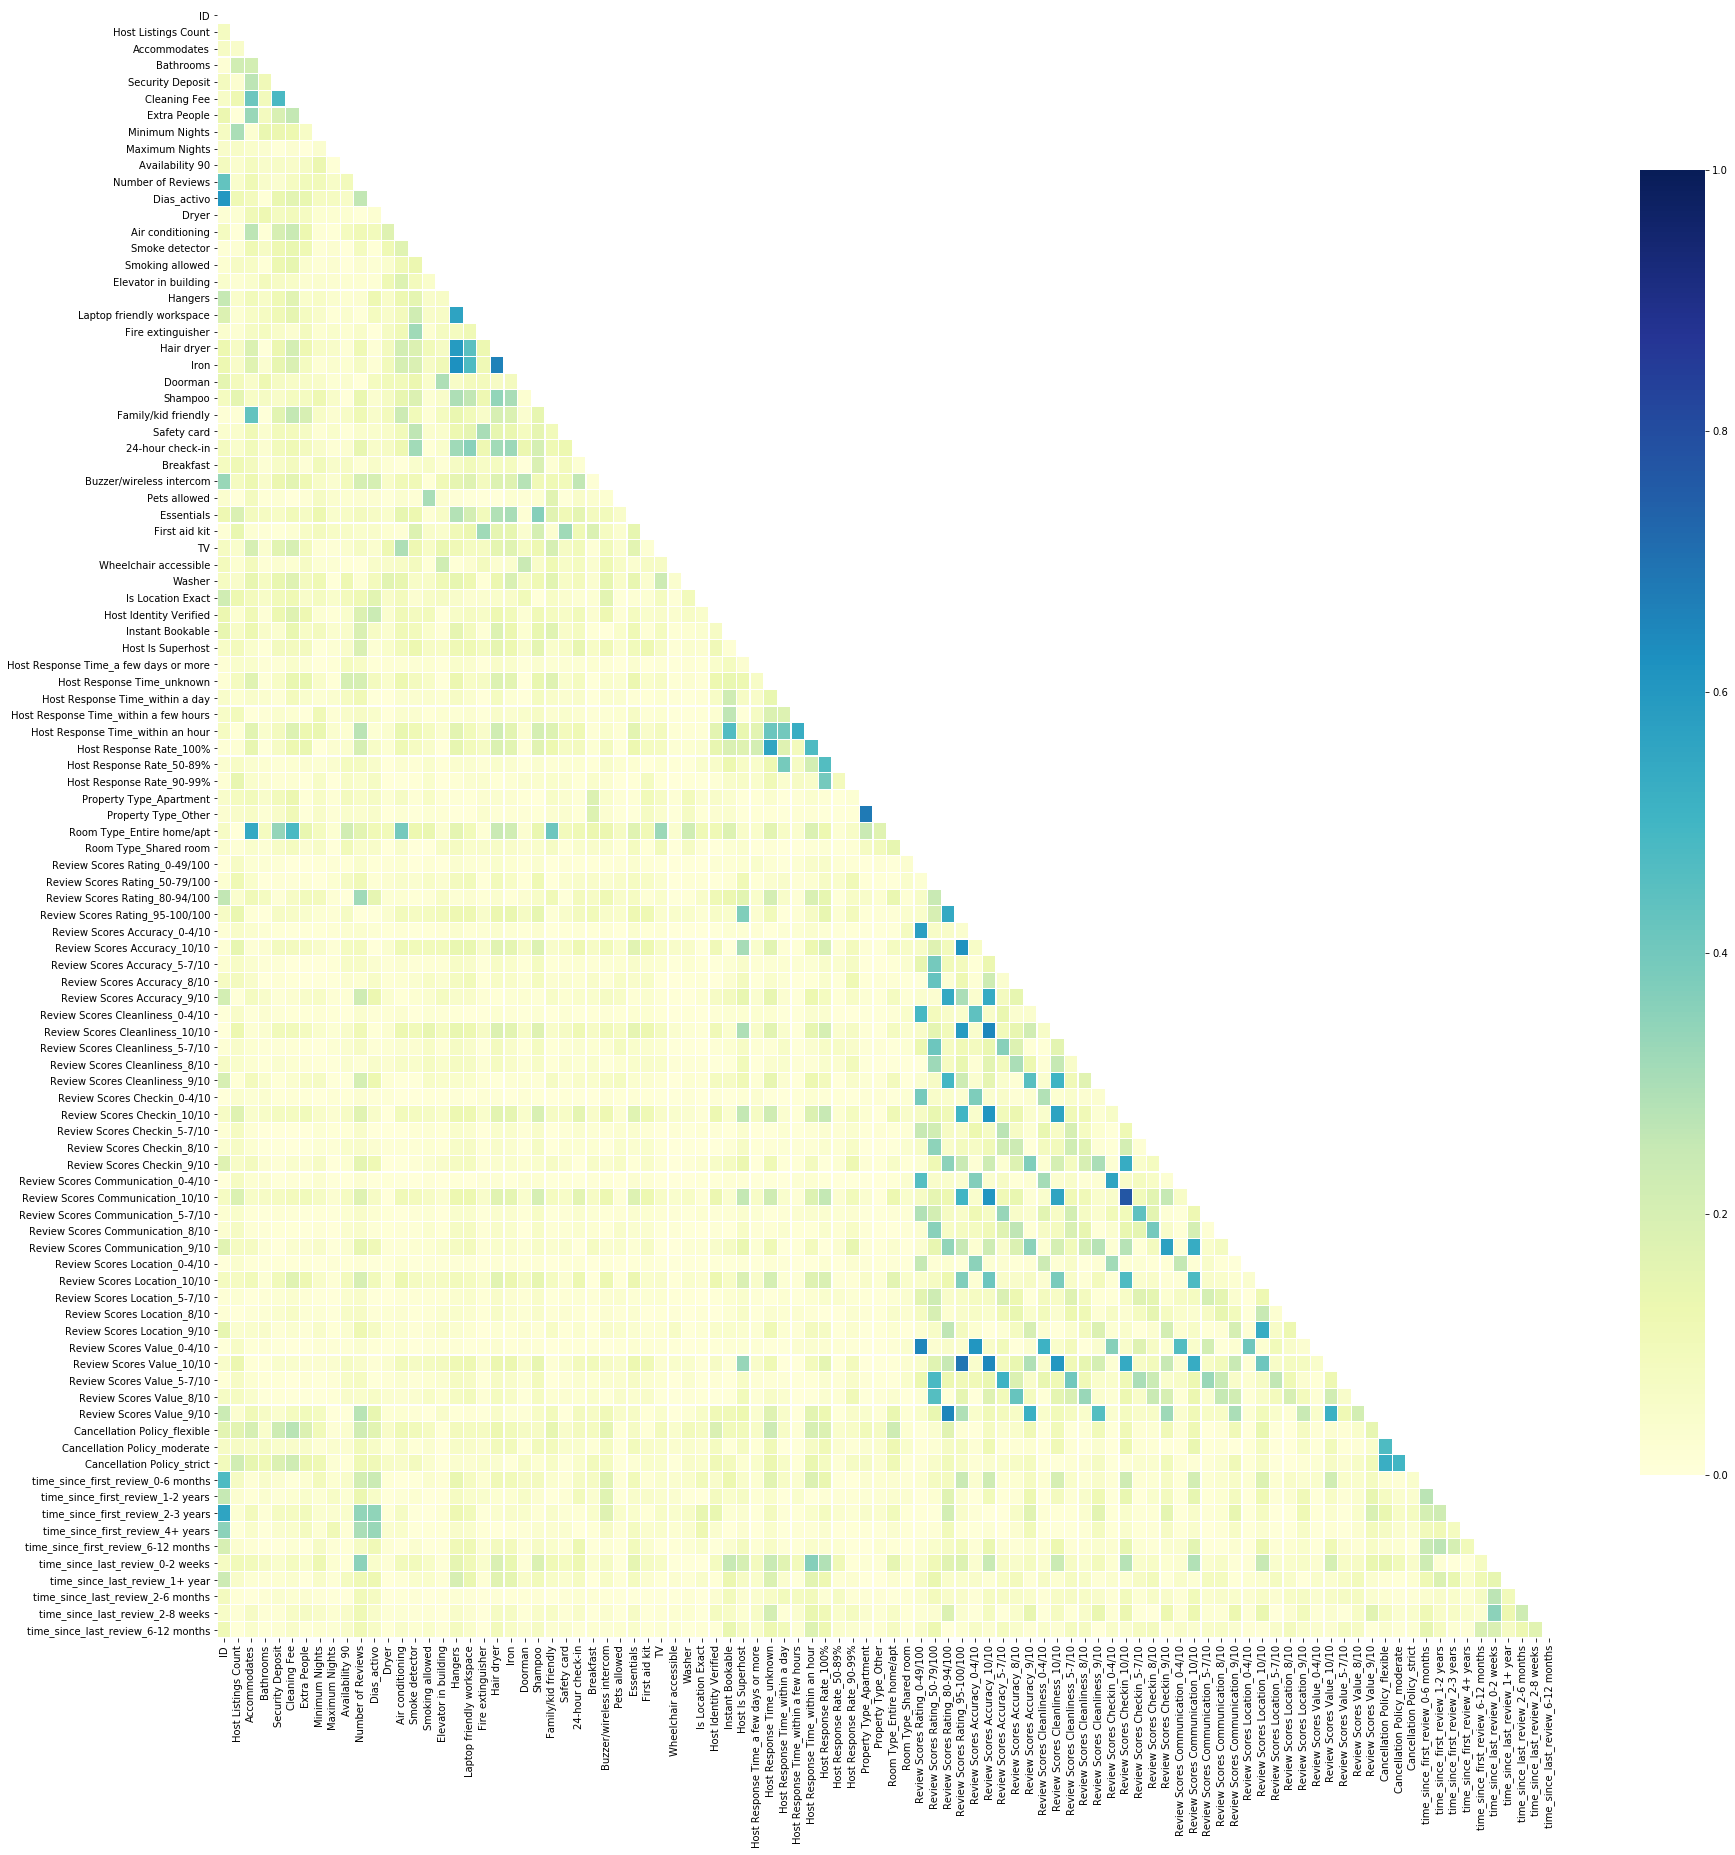

In [0]:
# Compute the correlation matrix
corr = np.abs(transformed_df_sinbarrios.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Se ve que aun quedan algunas características correladas por ejemplo si una propiedad tiene una categoría de review con 10/10 suele tener otro 10/10 en otras categorías. De momento lo voy a dejar y luego veré si experimentando con ellas se consigue mejorar el modelo

In [0]:
#Voy a volver a añadir las Picture URL que he quitado antes para hacer
#la tranformación de variables categóricas
transformed_df = transformed_df.join (house_madrid[['Picture Url']])
transformed_df.head()


ID  Host Listings Count  Accommodates  Bathrooms  Price  \
40   6478626                  3.0             2        2.0   28.0   
41   4941335                  1.0             2        1.0   58.0   
42  12510355                  2.0             3        1.0   70.0   
43   4756811                  8.0             1        1.0   26.0   
44  15332216                  2.0             6        1.0   70.0   

    Security Deposit  Cleaning Fee  Extra People  Minimum Nights  \
40               0.0           0.0             5               1   
41             100.0           0.0             0               2   
42             150.0          30.0            15               2   
43               0.0           0.0             0               7   
44               0.0          20.0            10               2   

    Maximum Nights  Availability 90  Number of Reviews  Dias_activo  Dryer  \
40            1125               12                171        823.0    0.0   
41            1125                9                 52        828.0    0.0   
42            1125               32                 36        355.0    0.0   
43            1125               59                 15       1673.0    0.0   
44            1125                0                  0       1200.0    0.0   

    Air conditioning  Smoke detector  Smoking allowed  Elevator in building  \
40               0.0             0.0              0.0                   0.0   
41               1.0             0.0              0.0                   1.0   
42               1.0             0.0              1.0                   1.0   
43               0.0             0.0              0.0                   1.0   
44               1.0             1.0              0.0                   1.0   

    Hangers  Laptop friendly workspace  Fire extinguisher  Hair dryer  Iron  \
40      0.0                        0.0                0.0         1.0   1.0   
41      0.0                        0.0                0.0         0.0   0.0   
42      1.0                        1.0                0.0         1.0   0.0   
43      0.0                        0.0                1.0         0.0   0.0   
44      1.0                        1.0                1.0         0.0   1.0   

    Doorman  Shampoo  Family/kid friendly  Safety card  24-hour check-in  \
40      0.0      0.0                  0.0          0.0               0.0   
41      0.0      1.0                  1.0          0.0               0.0   
42      0.0      1.0                  1.0          0.0               1.0   
43      1.0      0.0                  0.0          0.0               0.0   
44      1.0      1.0                  1.0          1.0               1.0   

    Breakfast  Buzzer/wireless intercom  Pets allowed  Essentials  \
40        0.0                       0.0           0.0         1.0   
41        0.0                       0.0           0.0         1.0   
42        0.0                       1.0           0.0         1.0   
43        0.0                       1.0           0.0         0.0   
44        0.0                       1.0           0.0         1.0   

    First aid kit   TV  Wheelchair accessible  Washer  Is Location Exact  \
40            0.0  1.0                    0.0     0.0                0.0   
41            1.0  1.0                    0.0     1.0                1.0   
42            0.0  1.0                    0.0     1.0                1.0   
43            0.0  0.0                    0.0     1.0                1.0   
44            1.0  1.0                    0.0     1.0                1.0   

    Host Identity Verified  Instant Bookable  Host Is Superhost  \
40                     0.0               1.0                0.0   
41                     0.0               0.0                0.0   
42                     1.0               0.0                0.0   
43                     0.0               0.0                0.0   
44                     1.0               0.0                0.0   

    Host Response Time_a few days o

En este punto voy a guardar ya el Dataset limpio


In [0]:
#La ruta está definida en el punto 0 de esta práctica
path_cleaned = ruta + 'data/airbnb_cleaned.csv'
airbnb_cleaned = transformed_df.to_csv(path_cleaned, index=id, header=True)



# 6.- Modelado 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Importo librerias
# cargo librerías necesarias
import numpy  as np  
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score


import time

from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


A continuación leo los datos desde el fichero ya limpio y los preparo para applicar diferentes modelos

In [0]:
#La ruta está definida en el punto 0 de esta práctica
path_cleaned = ruta + 'data/airbnb_cleaned.csv'

In [0]:
house_data = pd.read_csv(path_cleaned, sep =',', decimal='.', index_col=0) # cargamos fichero
print(f"El dataset original contiene {len(house_data)} viviendas Airbnb con {len(house_data.columns)} características")
pd.set_option('display.max_columns', len(house_data)) # Para ver todas las columnas
house_data.head(5)                                   # visualizamos 5 primeras filas


El dataset original contiene 12289 viviendas Airbnb con 121 características


ID  Host Listings Count  Accommodates  Bathrooms  Price  \
40   6478626                  3.0             2        2.0   28.0   
41   4941335                  1.0             2        1.0   58.0   
42  12510355                  2.0             3        1.0   70.0   
43   4756811                  8.0             1        1.0   26.0   
44  15332216                  2.0             6        1.0   70.0   

    Security Deposit  Cleaning Fee  Extra People  Minimum Nights  \
40               0.0           0.0             5               1   
41             100.0           0.0             0               2   
42             150.0          30.0            15               2   
43               0.0           0.0             0               7   
44               0.0          20.0            10               2   

    Maximum Nights  Availability 90  Number of Reviews  Dias_activo  \
40            1125               12                171        823.0   
41            1125                9                 52        828.0   
42            1125               32                 36        355.0   
43            1125               59                 15       1673.0   
44            1125                0                  0       1200.0   

    Breakfast  Laptop friendly workspace  Family/kid friendly  First aid kit  \
40        0.0                        0.0                  0.0            0.0   
41        0.0                        0.0                  1.0            1.0   
42        0.0                        1.0                  1.0            0.0   
43        0.0                        0.0                  0.0            0.0   
44        0.0                        1.0                  1.0            1.0   

    Doorman  Hangers  Wheelchair accessible  Smoking allowed  \
40      0.0      0.0                    0.0              0.0   
41      0.0      0.0                    0.0              0.0   
42      0.0      1.0                    0.0              1.0   
43      1.0      0.0                    0.0              0.0   
44      1.0      1.0                    0.0              0.0   

    Fire extinguisher  Elevator in building  Air conditioning  Pets allowed  \
40                0.0                   0.0               0.0           0.0   
41                0.0                   1.0               1.0           0.0   
42                0.0                   1.0               1.0           0.0   
43                1.0                   1.0               0.0           0.0   
44                1.0                   1.0               1.0           0.0   

    Washer  Buzzer/wireless intercom  Shampoo  24-hour check-in   TV  \
40     0.0                       0.0      0.0               0.0  1.0   
41     1.0                       0.0      1.0               0.0  1.0   
42     1.0                       1.0      1.0               1.0  1.0   
43     1.0                       1.0      0.0               0.0  0.0   
44     1.0                       1.0      1.0               1.0  1.0   

    Safety card  Dryer  Hair dryer  Iron  Smoke detector  Essentials  \
40          0.0    0.0         1.0   1.0             0.0         1.0   
41          0.0    0.0         0.0   0.0             0.0         1.0   
42          0.0    0.0         1.0   0.0             0.0         1.0   
43          0.0    0.0         0.0   0.0             0.0         0.0   
44          1.0    0.0         0.0   1.0             1.0         1.0   

    Host Is Superhost  Instant Bookable  Is Location Exact  \
40                0.0               1.0                0.0   
41                0.0               0.0                1.0   
42                0.0               0.0                1.0   
43                0.0               0.0                1.0   
44                0.0               0.0                1.0   

    Host Identity Verified  Host Response Time_a few days or more  \
40                     0.0                                      0   
41                     0.0               

Para este primer modelado no me hacen faltas las columnas "ID" y "Picture Url" así que las voy a eliminar

In [0]:
house_data.drop (['ID', 'Picture Url'], axis=1, inplace=True)

## 6.1. Estandarización y Normalización

Voy a representar el histograma de las variables numéricas para ver si a algunas de ellas se les podría aplicar alguna transformación logarítmica

In [0]:
numerical_columns = ['Price', 'Host Listings Count', 'Accommodates', 'Bathrooms', 'Security Deposit',
                    'Cleaning Fee', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 90', 'Number of Reviews',
                    'Dias_activo']

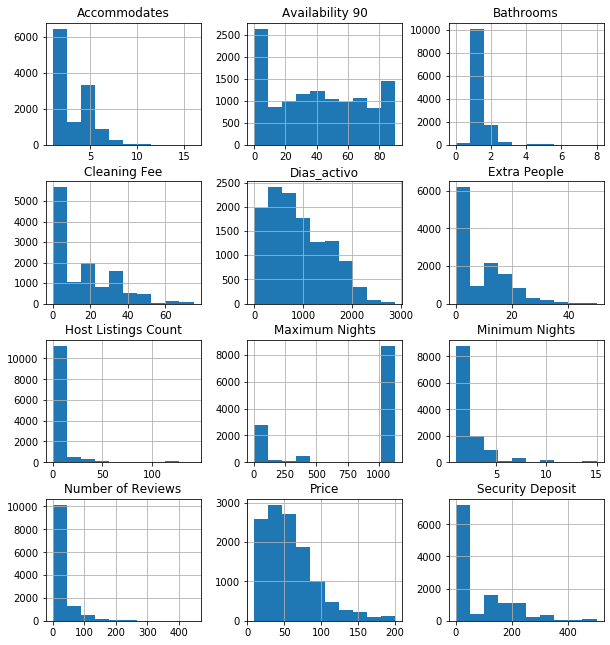

In [0]:
house_data[numerical_columns].hist(figsize=(10,11));

A exepción de  "Availability 90" y "Dias_activo" el resto de características numéricas se ve como están desplazadas hacia los laterales de la gráfica por lo que se pueden beneficiar de una transformación logarítmica 

In [0]:
# Transformación logarítmica de columnas
numerical_columns = [i for i in numerical_columns if i not in ['Availability 90', 'Dias_activo']] # Quito las que no se van a transformar

for col in numerical_columns:
    house_data[col] = house_data[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    house_data[col] = np.log(house_data[col])

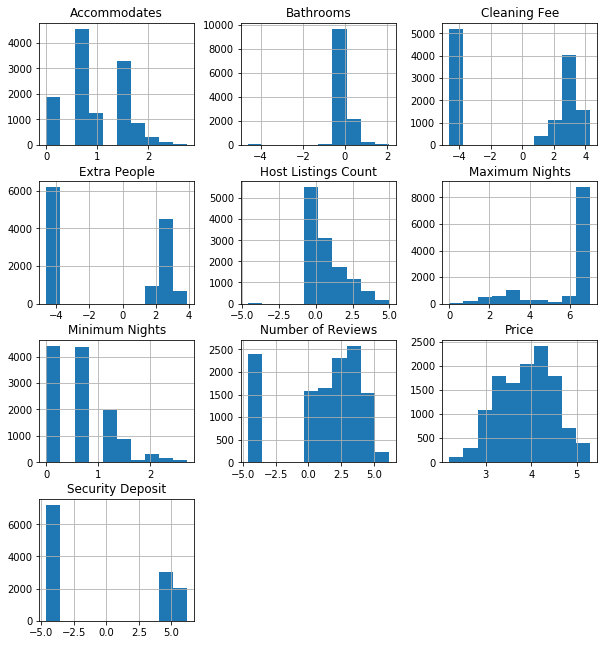

In [0]:
house_data[numerical_columns].hist(figsize=(10,11));

Vemos como la transformación ayuda al algunas variable sobre todo a la de Price que ahora aparace mucho más normalmente distribuida. Hay otras como "Cleaning Fee", "Extra People" y "Security Deposit" que contienen muchos 0 lo cual significa que no están normalmente distribuidas

Finalmente voy a separar las variables predictivas X de la variable objetivo y escalamos X. Utilizaré StandardScaler de sklearn

In [0]:
# Separamos X and y
X = house_data.drop('Price', axis=1)
y = house_data.Price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

## 6.2 .- Separación train / test

Me quedo con un 70% de muestras para train y 30% para test 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

La métrica que usaré al ser un problema de regresión es el MSE (Error cuadrático medio)

# 7.-  Modelo para predecir el precio con Redes Neuronales usando solo datos numéricos (sin imágenes)

## 7.1. Modelo 1: Red neuronal con 3 capas
Voy a comenzar con una red neuronal de 3 capas. Utilizaré 3 capas densas, una fución de activación de tipo relu y para la salida utilizaré una función lineal al ser un problema de regresión. La función de pérdidas será la "mean squered_error'. Utilizaré además como optimizador adam con su lr por defecto

In [0]:
#Voy a comprobar el número de características que tengo para que la primera capa densa tenga más neuronas que este 
#número de características
len  (list(X_train.columns))

118

In [0]:
#Creo el modelo
modelo = models.Sequential()
modelo.add (layers.Dense (128, input_shape=(X_train.shape[1],), activation='relu'))
modelo.add(layers.Dense(256, activation='relu'))
modelo.add(layers.Dense(256, activation='relu'))
modelo.add(layers.Dense(1, activation='linear'))

#Compilo el modelo 
modelo.compile(loss='mean_squared_error',
               optimizer='adam',
               metrics=['mean_squared_error'])

print(modelo.summary())








Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               15232     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 114,305
Trainable params: 114,305
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
#Entreno el modelo con 100 épocas y batch_size de 256
modelo_start = time.time()
modelo.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1  #Con esto se separa una porción del conjunto de entratamiento y se usa como
                                          #validación, con esa porción no se entrena
                  )
modelo_end = time.time()
print(f"Tiempo de ejecución: {round((modelo_end - modelo_start)/60,1)} minutes")




Train on 7741 samples, validate on 861 samples
Epoch 1/100





7741/7741 [==============================] - 10s 1ms/step - loss: 2.3520 - mean_squared_error: 2.3520 - val_loss: 0.3849 - val_mean_squared_error: 0.3849
Epoch 2/100
7741/7741 [==============================] - 0s 21us/step - loss: 0.2853 - mean_squared_error: 0.2853 - val_loss: 0.2152 - val_mean_squared_error: 0.2152
Epoch 3/100
7741/7741 [==============================] - 0s 20us/step - loss: 0.1844 - mean_squared_error: 0.1844 - val_loss: 0.1820 - val_mean_squared_error: 0.1820
Epoch 4/100
7741/7741 [==============================] - 0s 15us/step - loss: 0.1527 - mean_squared_error: 0.1527 - val_loss: 0.1664 - val_mean_squared_error: 0.1664
Epoch 5/100
7741/7741 [==============================] - 0s 19us/step - loss: 0.1327 - mean_squared_error: 0.1327 - val_loss: 0.1608 - val_mean_squared_error: 0.1608
Epoch 6/100
7741/7741 [==============================] - 0s 14us/step - loss: 0.1191 - mean_squared_error: 0.1191 -

In [0]:
#Evaluo el modelo con las muestras de test
y_test_pred = modelo.predict(X_test)
y_train_pred = modelo.predict(X_train)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 0.0186
Validation MSE: 0.1807

Training r2: 0.949
Validation r2: 0.5117


En este primer intento se ve que el resultado en train es mucho mejor que el que obtenermos en test lo cual indica que tenemos un problema de overfitting. Voy a aplicar regularización para intentar solucionar el problema

## 7.2. Modelo 2: Red neuronal con 4 capas, regularización L1 y más épocas
Para reducir el overfitting voy a usar la regularización L1. Añado además una capa adicional para ver si podemos mejorar el resultado (r2)

In [0]:
# Construyo el modelo
modelo2 = models.Sequential()
modelo2.add(layers.Dense(128, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
modelo2.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
modelo2.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
modelo2.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
modelo2.add(layers.Dense(1, activation='linear'))

# Compilo el modelo
modelo2.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['mean_squared_error'])

# Model summary
print(modelo2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               15232     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 246,145
Trainable params: 246,145
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
#Entreno el modelo con 150 épocas y batch_size de 256
modelo2_start = time.time()
modelo2.fit(X_train,
                  y_train,
                  epochs=150,
                  batch_size=256,
                  validation_split = 0.1  #Con esto se separa una porción del conjunto de entratamiento y se usa como
                                          #validación, con esa porción no se entrena
                  )
modelo2_end = time.time()
print(f"Tiempo de ejecución: {round((modelo2_end - modelo2_start)/60,1)} minutes")

Train on 7741 samples, validate on 861 samples
Epoch 1/150
7741/7741 [==============================] - 1s 71us/step - loss: 57.6506 - mean_squared_error: 2.1899 - val_loss: 46.7894 - val_mean_squared_error: 0.3710
Epoch 2/150
7741/7741 [==============================] - 0s 19us/step - loss: 39.1386 - mean_squared_error: 0.2743 - val_loss: 31.2787 - val_mean_squared_error: 0.1937
Epoch 3/150
7741/7741 [==============================] - 0s 20us/step - loss: 25.8192 - mean_squared_error: 0.1809 - val_loss: 20.6794 - val_mean_squared_error: 0.1650
Epoch 4/150
7741/7741 [==============================] - 0s 19us/step - loss: 17.3674 - mean_squared_error: 0.1536 - val_loss: 14.2028 - val_mean_squared_error: 0.1525
Epoch 5/150
7741/7741 [==============================] - 0s 22us/step - loss: 12.0454 - mean_squared_error: 0.1378 - val_loss: 9.9399 - val_mean_squared_error: 0.1326
Epoch 6/150
7741/7741 [==============================] - 0s 19us/step - loss: 8.4714 - mean_squared_error: 0.1245 

In [0]:
#Evaluo el modelo con las muestras de test

y_test_pred = modelo2.predict(X_test)
y_train_pred = modelo2.predict(X_train)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 0.0932
Validation MSE: 0.1026

Training r2: 0.7448
Validation r2: 0.7227


Este modelo se comporta mucho mejor. Se ha eliminado el problema de overfitting que teníamos antes y ha mejorado también r2

## 7.3. Modelo 3: Red neuronal con 4 capas y regularización Droput 0.5
Voy a probar con la regularización Dropout=0.5


In [0]:
# Construyo el modelo
modelo3 = models.Sequential()
modelo3.add(layers.Dropout(0.5, input_shape=(X_train.shape[1],)))
modelo3.add(layers.Dense(128, activation='relu'))
modelo3.add(layers.Dropout(0.5))
modelo3.add(layers.Dense(256, activation='relu'))
modelo3.add(layers.Dropout(0.5))
modelo3.add(layers.Dense(512, activation='relu'))
modelo3.add(layers.Dropout(0.5))
modelo3.add(layers.Dense(1, activation='linear'))

# Compilo el modelo
modelo3.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(modelo3.summary())


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 118)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               15232     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               131584    
____

In [0]:
#Entreno el modelo con 150 épocas y batch_size de 256
modelo3_start = time.time()
modelo3.fit(X_train,
                  y_train,
                  epochs=150,
                  batch_size=256,
                  validation_split = 0.1  #Con esto se separa una porción del conjunto de entratamiento y se usa como
                                          #validación, con esa porción no se entrena
                  )
modelo3_end = time.time()
print(f"Tiempo de ejecución: {round((modelo3_end - modelo3_start)/60,1)} minutes")

Train on 7741 samples, validate on 861 samples
Epoch 1/150
7741/7741 [==============================] - 1s 94us/step - loss: 3.7550 - mean_squared_error: 3.7550 - val_loss: 6.1668 - val_mean_squared_error: 6.1668
Epoch 2/150
7741/7741 [==============================] - 0s 28us/step - loss: 1.7933 - mean_squared_error: 1.7933 - val_loss: 5.7219 - val_mean_squared_error: 5.7219
Epoch 3/150
7741/7741 [==============================] - 0s 24us/step - loss: 1.4403 - mean_squared_error: 1.4403 - val_loss: 5.8750 - val_mean_squared_error: 5.8750
Epoch 4/150
7741/7741 [==============================] - 0s 20us/step - loss: 1.2676 - mean_squared_error: 1.2676 - val_loss: 5.4607 - val_mean_squared_error: 5.4607
Epoch 5/150
7741/7741 [==============================] - 0s 25us/step - loss: 1.0991 - mean_squared_error: 1.0991 - val_loss: 5.2733 - val_mean_squared_error: 5.2733
Epoch 6/150
7741/7741 [==============================] - 0s 24us/step - loss: 1.0169 - mean_squared_error: 1.0169 - val_los

In [0]:
#Evaluo el modelo con las muestras de test

y_test_pred = modelo3.predict(X_test)
y_train_pred = modelo3.predict(X_train)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 0.1848
Validation MSE: 0.1996

Training r2: 0.4939
Validation r2: 0.4605


El comportamiento de este modelo es peor que el de la regularización L1

## 7.4. Modelo 4: Red neuronal con 4 capas, regularización Dropout 0.2 y mayor batch size
Voy a probar con la regularización Droput al 0.2 y un aumento del batch_size a 512

In [0]:
# Construyo el modelo
modelo4 = models.Sequential()
modelo4.add(layers.Dropout(0.2, input_shape=(X_train.shape[1],)))
modelo4.add(layers.Dense(128, activation='relu'))
modelo4.add(layers.Dropout(0.2))
modelo4.add(layers.Dense(256, activation='relu'))
modelo4.add(layers.Dropout(0.2))
modelo4.add(layers.Dense(512, activation='relu'))
modelo4.add(layers.Dropout(0.2))
modelo4.add(layers.Dense(1, activation='linear'))

# Compiling the model
modelo4.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(modelo4.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_5 (Dropout)          (None, 118)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               15232     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)              

In [0]:
#Entreno el modelo con 150 épocas y batch_size de 512
modelo4_start = time.time()
modelo4.fit(X_train,
                  y_train,
                  epochs=150,
                  batch_size=512,
                  validation_split = 0.1  #Con esto se separa una porción del conjunto de entratamiento y se usa como
                                          #validación, con esa porción no se entrena
                  )
modelo4_end = time.time()
print(f"Tiempo de ejecución: {round((modelo4_end - modelo4_start)/60,1)} minutes")

Train on 7741 samples, validate on 861 samples
Epoch 1/150
7741/7741 [==============================] - 1s 74us/step - loss: 4.1471 - mean_squared_error: 4.1471 - val_loss: 3.5896 - val_mean_squared_error: 3.5896
Epoch 2/150
7741/7741 [==============================] - 0s 11us/step - loss: 1.2200 - mean_squared_error: 1.2200 - val_loss: 1.4014 - val_mean_squared_error: 1.4014
Epoch 3/150
7741/7741 [==============================] - 0s 11us/step - loss: 0.7027 - mean_squared_error: 0.7027 - val_loss: 0.8400 - val_mean_squared_error: 0.8400
Epoch 4/150
7741/7741 [==============================] - 0s 12us/step - loss: 0.5630 - mean_squared_error: 0.5630 - val_loss: 0.9371 - val_mean_squared_error: 0.9371
Epoch 5/150
7741/7741 [==============================] - 0s 13us/step - loss: 0.4763 - mean_squared_error: 0.4763 - val_loss: 0.9661 - val_mean_squared_error: 0.9661
Epoch 6/150
7741/7741 [==============================] - 0s 10us/step - loss: 0.4400 - mean_squared_error: 0.4400 - val_los

In [0]:
#Evaluo el modelo con las muestras de test

y_test_pred = modelo4.predict(X_test)
y_train_pred = modelo4.predict(X_train)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 0.3143
Validation MSE: 0.3634

Training r2: 0.1394
Validation r2: 0.0179


Esto ha emperado aun más el modelo.Seguimos quedándonos por tanto con el modelo 2 y la regularización L1

## 7.5. Modelo 5: Red neuronal con 4 capas, regularización L1 y eliminación de más características correladas

En el limpiado del dataset vi que existía correlación entre las características review pero no las eliminé en ese momento. Voy a probar si al eliminarlas y usar el modelo de regularización L1 conseguimos mejor resultado

In [0]:
all_review = list(X_train.columns[X_train.columns.str.startswith("Review Scores")])
review_to_keep = list(X_train.columns[X_train.columns.str.startswith("Review Scores Rating")])
review_to_drop = [x for x in all_review if x not in review_to_keep]

X_train_short = X_train.drop(review_to_drop, axis=1)

#Misma transformación para test
X_test_short = X_test.drop(review_to_drop, axis=1)

In [0]:
# Construyo el modelo igual que el modelo2
modelo5 = models.Sequential()
modelo5.add(layers.Dense(128, input_shape=(X_train_short.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
modelo5.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
modelo5.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
modelo5.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
modelo5.add(layers.Dense(1, activation='linear'))

# Compilo el modelo
modelo5.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['mean_squared_error'])

# Model summary
print(modelo5.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               11392     
_________________________________________________________________
dense_19 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_21 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 513       
Total params: 242,305
Trainable params: 242,305
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
#Entreno el modelo con 150 épocas y batch_size de 256
modelo5_start = time.time()
modelo5.fit(X_train_short,
                  y_train,
                  epochs=150,
                  batch_size=256,
                  validation_split = 0.1  #Con esto se separa una porción del conjunto de entratamiento y se usa como
                                          #validación, con esa porción no se entrena
                  )
modelo5_end = time.time()
print(f"Tiempo de ejecución: {round((modelo5_end - modelo5_start)/60,1)} minutes")

Train on 7741 samples, validate on 861 samples
Epoch 1/150
7741/7741 [==============================] - 1s 104us/step - loss: 56.3958 - mean_squared_error: 2.2122 - val_loss: 45.4640 - val_mean_squared_error: 0.4247
Epoch 2/150
7741/7741 [==============================] - 0s 25us/step - loss: 37.7653 - mean_squared_error: 0.2635 - val_loss: 30.0002 - val_mean_squared_error: 0.1846
Epoch 3/150
7741/7741 [==============================] - 0s 22us/step - loss: 24.7264 - mean_squared_error: 0.1689 - val_loss: 19.8296 - val_mean_squared_error: 0.1563
Epoch 4/150
7741/7741 [==============================] - 0s 21us/step - loss: 16.6903 - mean_squared_error: 0.1459 - val_loss: 13.6922 - val_mean_squared_error: 0.1421
Epoch 5/150
7741/7741 [==============================] - 0s 21us/step - loss: 11.6535 - mean_squared_error: 0.1317 - val_loss: 9.6621 - val_mean_squared_error: 0.1317
Epoch 6/150
7741/7741 [==============================] - 0s 17us/step - loss: 8.2699 - mean_squared_error: 0.1202

In [0]:
#Evaluo el modelo con las muestras de test

y_test_pred = modelo5.predict(X_test_short)
y_train_pred = modelo5.predict(X_train_short)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 0.0957
Validation MSE: 0.1039

Training r2: 0.7378
Validation r2: 0.7193


Conseguimos resultados similares al del modelo 2 pero he eliminado 30 características con lo que la complejidad es menor por lo que nos quedamos de momento con esta opción

## 7.6. Modelo 6: Red neuronal con 5 capas, regularización L1 y eliminación de características correladas

Viendo que el mejor modelo es modelo 5 voy a intentar mejorar sus prestaciones añadiendo una capa densa más

In [0]:
# Construyo el modelo igual que el modelo2
modelo6 = models.Sequential()
modelo6.add(layers.Dense(128, input_shape=(X_train_short.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
modelo6.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
modelo6.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
modelo6.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
modelo6.add(layers.Dense(1024, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
modelo6.add(layers.Dense(1, activation='linear'))

# Compilo el modelo
modelo6.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['mean_squared_error'])

# Model summary
print(modelo6.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               11392     
_________________________________________________________________
dense_24 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_25 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_26 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_27 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 1025      
Total params: 768,129
Trainable params: 768,129
Non-trainable params: 0
________________________________________________

In [0]:
#Entreno el modelo con 150 épocas y batch_size de 256
modelo6_start = time.time()
modelo6.fit(X_train_short,
                  y_train,
                  epochs=150,
                  batch_size=256,
                  validation_split = 0.1  #Con esto se separa una porción del conjunto de entratamiento y se usa como
                                          #validación, con esa porción no se entrena
                  )
modelo6_end = time.time()
print(f"Tiempo de ejecución: {round((modelo6_end - modelo6_start)/60,1)} minutes")

Train on 7741 samples, validate on 861 samples
Epoch 1/150
7741/7741 [==============================] - 1s 111us/step - loss: 112.4220 - mean_squared_error: 1.7619 - val_loss: 76.7497 - val_mean_squared_error: 0.4745
Epoch 2/150
7741/7741 [==============================] - 0s 23us/step - loss: 54.7623 - mean_squared_error: 0.2444 - val_loss: 36.5069 - val_mean_squared_error: 0.1786
Epoch 3/150
7741/7741 [==============================] - 0s 20us/step - loss: 27.8390 - mean_squared_error: 0.1631 - val_loss: 20.4099 - val_mean_squared_error: 0.1527
Epoch 4/150
7741/7741 [==============================] - 0s 23us/step - loss: 16.3271 - mean_squared_error: 0.1384 - val_loss: 12.6637 - val_mean_squared_error: 0.1272
Epoch 5/150
7741/7741 [==============================] - 0s 23us/step - loss: 10.4285 - mean_squared_error: 0.1230 - val_loss: 8.3273 - val_mean_squared_error: 0.1194
Epoch 6/150
7741/7741 [==============================] - 0s 22us/step - loss: 6.9671 - mean_squared_error: 0.119

In [0]:
#Evaluo el modelo con las muestras de test

y_test_pred = modelo6.predict(X_test_short)
y_train_pred = modelo6.predict(X_train_short)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 0.0947
Validation MSE: 0.1036

Training r2: 0.7407
Validation r2: 0.72


No se consigue mejorar

## 7.7. Conclusión. Modelo Red Neuronal con datos solo numéricos

Tras las diversas pruebas se selecciona el modelo 5 con mejor modelo: Red neuronal con 4 capas, regularización L1, optimización de Adam y eliminación de características review correladas:

Training r2: 0.7438

Validation r2: 0.723

# 8.-  Modelo para predecir el precio con Redes Neuronales usando imágenes (CNNs)

##8.1 Descarga de imágenes

En el dataset con el que estamos trabajando de Airbnb he dejado una columna que contiene la "Picture Url" que nos da acceso a una imagen de la habitación/piso en alquiler

En primer lugar cargo las librerias necesarias:

In [0]:
#Importo librerias
# cargo librerías necesarias
import numpy  as np  
import pandas as pd
import requests
from imutils import paths
import cv2
import os
import pickle
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time

from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot


import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


En segundo lugar cargo el dataset:

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#La ruta está definida en el punto 0 de esta práctica
path_cleaned = ruta + 'data/airbnb_cleaned.csv'
house_data = pd.read_csv(path_cleaned, sep =',', decimal='.', index_col =0) # cargamos fichero
print(f"El dataset original contiene {len(house_data)} viviendas Airbnb con {len(house_data.columns)} características")
pd.set_option('display.max_columns', len(house_data)) # Para ver todas las columnas
house_data.head(5)                                   # visualizamos 5 primeras filas

El dataset original contiene 12289 viviendas Airbnb con 121 características


ID  Host Listings Count  Accommodates  Bathrooms  Price  \
40   6478626                  3.0             2        2.0   28.0   
41   4941335                  1.0             2        1.0   58.0   
42  12510355                  2.0             3        1.0   70.0   
43   4756811                  8.0             1        1.0   26.0   
44  15332216                  2.0             6        1.0   70.0   

    Security Deposit  Cleaning Fee  Extra People  Minimum Nights  \
40               0.0           0.0             5               1   
41             100.0           0.0             0               2   
42             150.0          30.0            15               2   
43               0.0           0.0             0               7   
44               0.0          20.0            10               2   

    Maximum Nights  Availability 90  Number of Reviews  Dias_activo  \
40            1125               12                171        823.0   
41            1125                9                 52        828.0   
42            1125               32                 36        355.0   
43            1125               59                 15       1673.0   
44            1125                0                  0       1200.0   

    Breakfast  Laptop friendly workspace  Family/kid friendly  First aid kit  \
40        0.0                        0.0                  0.0            0.0   
41        0.0                        0.0                  1.0            1.0   
42        0.0                        1.0                  1.0            0.0   
43        0.0                        0.0                  0.0            0.0   
44        0.0                        1.0                  1.0            1.0   

    Doorman  Hangers  Wheelchair accessible  Smoking allowed  \
40      0.0      0.0                    0.0              0.0   
41      0.0      0.0                    0.0              0.0   
42      0.0      1.0                    0.0              1.0   
43      1.0      0.0                    0.0              0.0   
44      1.0      1.0                    0.0              0.0   

    Fire extinguisher  Elevator in building  Air conditioning  Pets allowed  \
40                0.0                   0.0               0.0           0.0   
41                0.0                   1.0               1.0           0.0   
42                0.0                   1.0               1.0           0.0   
43                1.0                   1.0               0.0           0.0   
44                1.0                   1.0               1.0           0.0   

    Washer  Buzzer/wireless intercom  Shampoo  24-hour check-in   TV  \
40     0.0                       0.0      0.0               0.0  1.0   
41     1.0                       0.0      1.0               0.0  1.0   
42     1.0                       1.0      1.0               1.0  1.0   
43     1.0                       1.0      0.0               0.0  0.0   
44     1.0                       1.0      1.0               1.0  1.0   

    Safety card  Dryer  Hair dryer  Iron  Smoke detector  Essentials  \
40          0.0    0.0         1.0   1.0             0.0         1.0   
41          0.0    0.0         0.0   0.0             0.0         1.0   
42          0.0    0.0         1.0   0.0             0.0         1.0   
43          0.0    0.0         0.0   0.0             0.0         0.0   
44          1.0    0.0         0.0   1.0             1.0         1.0   

    Host Is Superhost  Instant Bookable  Is Location Exact  \
40                0.0               1.0                0.0   
41                0.0               0.0                1.0   
42                0.0               0.0                1.0   
43                0.0               0.0                1.0   
44                0.0               0.0                1.0   

    Host Identity Verified  Host Response Time_a few days or more  \
40                     0.0                                      0   
41                     0.0               

In [0]:
lista_id = list (house_data['ID'])
#Cambio el index del dataset
house_data.set_index('ID',inplace=True)
pd.set_option('display.max_columns', len(house_data)) # Para ver todas las columnas
house_data.head(5)  

Host Listings Count  Accommodates  Bathrooms  Price  \
ID                                                              
6478626                   3.0             2        2.0   28.0   
4941335                   1.0             2        1.0   58.0   
12510355                  2.0             3        1.0   70.0   
4756811                   8.0             1        1.0   26.0   
15332216                  2.0             6        1.0   70.0   

          Security Deposit  Cleaning Fee  Extra People  Minimum Nights  \
ID                                                                       
6478626                0.0           0.0             5               1   
4941335              100.0           0.0             0               2   
12510355             150.0          30.0            15               2   
4756811                0.0           0.0             0               7   
15332216               0.0          20.0            10               2   

          Maximum Nights  Availability 90  Number of Reviews  Dias_activo  \
ID                                                                          
6478626             1125               12                171        823.0   
4941335             1125                9                 52        828.0   
12510355            1125               32                 36        355.0   
4756811             1125               59                 15       1673.0   
15332216            1125                0                  0       1200.0   

          Breakfast  Laptop friendly workspace  Family/kid friendly  \
ID                                                                    
6478626         0.0                        0.0                  0.0   
4941335         0.0                        0.0                  1.0   
12510355        0.0                        1.0                  1.0   
4756811         0.0                        0.0                  0.0   
15332216        0.0                        1.0                  1.0   

          First aid kit  Doorman  Hangers  Wheelchair accessible  \
ID                                                                 
6478626             0.0      0.0      0.0                    0.0   
4941335             1.0      0.0      0.0                    0.0   
12510355            0.0      0.0      1.0                    0.0   
4756811             0.0      1.0      0.0                    0.0   
15332216            1.0      1.0      1.0                    0.0   

          Smoking allowed  Fire extinguisher  Elevator in building  \
ID                                                                   
6478626               0.0                0.0                   0.0   
4941335               0.0                0.0                   1.0   
12510355              1.0                0.0                   1.0   
4756811               0.0                1.0                   1.0   
15332216              0.0                1.0                   1.0   

          Air conditioning  Pets allowed  Washer  Buzzer/wireless intercom  \
ID                                                                           
6478626                0.0           0.0     0.0                       0.0   
4941335                1.0           0.0     1.0                       0.0   
12510355               1.0           0.0     1.0                       1.0   
4756811                0.0           0.0     1.0                       1.0   
15332216               1.0           0.0     1.0                       1.0   

          Shampoo  24-hour check-in   TV  Safety card  Dryer  Hair dryer  \
ID                                                                         
6478626       0.0               0.0  1.0          0.0    0.0         1.0   
4941335       1.0               0.0  1.0          0.0    0.0         0.0   
12510355      1.0               1.0  1.0          0.0    0.0         1.0   
4756811       0.0               0.0  0.0          0.0    0.0         0.0   
15332216      1.0         

Voy a comprobar si hay valores nulos para "Picture Url" y si es así elimino estas observaciones

In [0]:
print("Valores nulos:", house_data['Picture Url'].isna().sum())
house_data.dropna(subset=['Picture Url'], inplace=True)
print("Valores nulos:", house_data['Picture Url'].isna().sum())


Valores nulos: 18
Valores nulos: 0


Para la descarga de imágenes utilizo la librería requests que he importado antes

In [0]:
lista_imagenes = list (house_data['Picture Url'])
#lista_id = list (house_data['ID'])
total_imagenes = len (lista_imagenes)   #12271


In [0]:
#Construyo el path para guardar las imágenes. El nombre de la imagen será el ID
#La ruta está definida en el punto 0 de esta práctica
path = ruta + 'imagenes/'
#path = "/content/gdrive/My Drive/KeepCoding/DeepLearning/imagenes/"
indice_id = -1
for url in lista_imagenes:
  indice_id = indice_id+1
  try:
      #se intenta bajar la imagen
      r = requests.get(url, timeout=60)
      p = path + str (lista_id[indice_id]) + ".jpg"
      f = open(p, "wb")
      f.write(r.content)
      f.close()
      print("[INFO] downloaded: {}".format(p))

  except:  
     print("[INFO] error downloading {}...skipping".format(p))

In [0]:
import glob
#La ruta está definida en el punto 0 de esta práctica
path = ruta + 'imagenes/'
archivos = path + '*.jpg'
#Numero=len(glob.glob("/content/gdrive/My Drive/KeepCoding/DeepLearning/imagenes/*.jpg"))
Numero=len(glob.glob(archivos))

In [0]:
Numero

12271

A continuación vamos a hacer un recorrido intentando cargar las imágenes por si hubiera alguna que no se pueda cargar eliminarla. Puede haber habido algún fallo en la descarga o estar corrupta

In [0]:
#La ruta está definida en el punto 0 de esta práctica
path = ruta + 'imagenes/'
#path = "/content/gdrive/My Drive/KeepCoding/DeepLearning/imagenes/"
total = 1
for imagePath in paths.list_images (path):
  delete = False
  print ("[INFO] cargand {}".format (total))
  #se intenta cargar la imagen
  try:
    image = cv2.imread (imagePath)
    #Si el resultado es None quiere decir que no se ha podido cargar correctamente. Lo marcamos para borrar 
    if image is None:
      delete = True
  #Si Open CV no lo ha podido abrir lo marcamos para borrar
  except:
    print ("Except")    
    delete = True
  #Si tenemos marca para borrar procedemos a eliminarla
  if delete:
    print ("[INFO] deleting {}".format(imagePath))  
    os.remove (imagePath)
  total=total+1  

In [0]:
import glob
#La ruta está definida en el punto 0 de esta práctica
path = ruta + 'imagenes/'
archivos = path + '*.jpg'
#Numero=len(glob.glob("/content/gdrive/My Drive/KeepCoding/DeepLearning/imagenes/*.jpg"))
Numero=len(glob.glob(archivos))
Numero

12271

Tengo 12271 imagenes correctas, no hay ninguna erronea 

##8.2 Construir el dataset de imágenes y precio

A continuación voy a construir el dataset que servirá de entrada a la red covolucional. Este dataset contendrá 12271 imágenes de 50x50x3 y el precio correspondiente. A la vez que voy generando esa estructura, voy a crear otro dataset con los datos de airbnb siguiendo el mismo orden de carga de la estructura de imágenes. Es decir, cuando se carga una imagen, con su ID voy al dataset original cojo esa fila y la añado al nuevo dataset. Así tendré un dataset de datos ordenado igual que la estructura de imágenes y con los mismos registros para luego poder combinarlos en el punto 9 de esta prática 



In [0]:
import numpy  as np  
import pandas as pd
import requests
from imutils import paths
import cv2
import os
import pickle
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time

from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot


import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Cargo el dataset de datos
#La ruta está definida en el punto 0 de esta práctica
path_cleaned = ruta + 'data/airbnb_cleaned.csv'
house_data = pd.read_csv(path_cleaned, sep =',', decimal='.', index_col =0) # cargamos fichero
lista_id = list (house_data['ID'])
#Cambio el index del dataset
house_data.set_index('ID',inplace=True)

#Contruyo un nuevo dataset con las mismas columnas que el original y donde voy a colocar las lineas conforme
#vaya leyendo las imagenes para montar la estructura. De esta forma tendré el mismo orden y número
columnas = list (house_data.columns)
house_data_img=pd.DataFrame (columns=columnas)



In [0]:
#Decido que el tamaño de las imagenes sea 50x50
IMG_SIZE = 50
X=[]

training_data = []
#La ruta está definida en el punto 0 de esta práctica
path = ruta + 'imagenes/'
#path = "/content/gdrive/My Drive/KeepCoding/DeepLearning/imagenes/"
total=0

#Voy montando la estructura leyendo las imágenes desde su path
for imagePath in paths.list_images (path):
  try:
    img_array = cv2.imread (imagePath, cv2.IMREAD_UNCHANGED)
    if (img_array.shape[2]==3):  #Por si hay alguna imagen en blanco y negro no cogerla
                                 #Hay una de hecho: 11690390.jpg
                                 
        new_array = cv2.resize (img_array, (IMG_SIZE, IMG_SIZE))
        print ("[INFO] cargando {}".format(total))
        print ("[INFO] imagen {}".format(imagePath))
        #Obtengo el ID
        partes = os.path.splitext(imagePath)  #Con esto me quedo con algo como divido en nombre y extensión y me quedo con [0] que es el nombre
                                              #/content/gdrive/My Drive/KeepCoding/DeepLearning/imagenes/11690390
        a=partes[0].split("/") #Divido por el caracter "/"
        iden = a[-1]   #Me quedo con el último que es el nombre ó ID
        identif = int (iden)
        training_data.append ([new_array, house_data.loc[identif, 'Price'] ])
        #Añado la linea correspodiente al nuevo dataset de datos
        house_data_img = house_data_img.append(house_data.loc[[identif]])
        

  except Exception as e:
    pass
  total = total + 1  
   
X = [] #features - pixels
y = [] #precio

for features, label in training_data:
	X.append(features)
	y.append(label)
 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)   

[INFO] cargando 0
[INFO] imagen /content/gdrive/My Drive/KeepCoding/DeepLearning/imagenes/11692717.jpg
[INFO] cargando 1
[INFO] imagen /content/gdrive/My Drive/KeepCoding/DeepLearning/imagenes/6138801.jpg
[INFO] cargando 2
[INFO] imagen /content/gdrive/My Drive/KeepCoding/DeepLearning/imagenes/7304123.jpg
[INFO] cargando 3
[INFO] imagen /content/gdrive/My Drive/KeepCoding/DeepLearning/imagenes/18007530.jpg
[INFO] cargando 4
[INFO] imagen /content/gdrive/My Drive/KeepCoding/DeepLearning/imagenes/15405680.jpg
[INFO] cargando 5
[INFO] imagen /content/gdrive/My Drive/KeepCoding/DeepLearning/imagenes/3910587.jpg
[INFO] cargando 6
[INFO] imagen /content/gdrive/My Drive/KeepCoding/DeepLearning/imagenes/15838617.jpg
[INFO] cargando 7
[INFO] imagen /content/gdrive/My Drive/KeepCoding/DeepLearning/imagenes/11550638.jpg
[INFO] cargando 8
[INFO] imagen /content/gdrive/My Drive/KeepCoding/DeepLearning/imagenes/15325195.jpg
[INFO] cargando 9
[INFO] imagen /content/gdrive/My Drive/KeepCoding/DeepLear

In [0]:
X.shape

(12270, 50, 50, 3)

In [0]:
# Creo los ficheros que contendrá toda información, para poder acceder posteriormente a ellos desde cualquier modelo
#que construya

#La ruta está definida en el punto 0 de esta práctica
path_Xpickle = ruta + 'datasetImagenes/X.pickle'
path_Ypickle = ruta + 'datasetImagenes/y.pickle'

#pickle_out = open("/content/gdrive/My Drive/KeepCoding/DeepLearning/datasetImagenes/X.pickle", "wb")
pickle_out = open(path_Xpickle, "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open(path_Ypickle, "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open(path_Xpickle, "rb")
X = pickle.load(pickle_in)     


In [0]:
#Guardo el dataset ordenado según las imágenes. Me será útil en el punto 9 de la prática
#La ruta está definida en el punto 0 de esta práctica
path_dataset = ruta + 'data/airbnb_segun_img.csv'
airbnb_segun_img = house_data_img.to_csv(path_dataset, index=id, header=True)

##8.3. Modelo 1 con 3 capas convolucionales, maxpolling2D y Dropout

In [0]:
import sys
import time
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from keras.regularizers import l1
import time

Construcción del modelo

In [0]:


#Cargamos los datos
from google.colab import drive
drive.mount('/content/gdrive')

path_Xpickle = ruta + 'datasetImagenes/X.pickle'
path_Ypickle = ruta + 'datasetImagenes/y.pickle'

#X = pickle.load(open("/content/gdrive/My Drive/KeepCoding/DeepLearning/datasetImagenes/X.pickle", "rb"))
#y = pickle.load(open("/content/gdrive/My Drive/KeepCoding/DeepLearning/datasetImagenes/y.pickle", "rb"))

X = pickle.load(open(path_Xpickle, "rb"))
y = pickle.load(open(path_Ypickle, "rb"))

#Separo en train  test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#Normalización de datos
X = X/255.0

#Contrucción del modelo
modelo1 = Sequential ()

#Añado 3 niveles de capas convolucionales
modelo1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 3)))
modelo1.add(MaxPooling2D(pool_size=(2, 2)))


modelo1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
modelo1.add(MaxPooling2D(pool_size=(2, 2)))


modelo1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
modelo1.add(MaxPooling2D(pool_size=(2, 2)))
modelo1.add(Dropout(0.5))

#Etapa clasificadora

modelo1.add(Flatten())
modelo1.add(Dense(128, activation='relu'))
modelo1.add(Dropout(0.5))
#modelo1.add(Dense(128, activation='relu', ))
modelo1.add(Dense(1, activation='linear'))  #regresión


# Compilo el modelo
modelo1.compile(loss='mean_squared_error',
                #optimizer='adam',
                optimizer=Adam(lr=0.0001),
                metrics=['mean_squared_error'])

# Model summary
print(modelo1.summary())


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 64)          

In [0]:
#Entreno el modelo con 100 épocas y batch_size de 32
modelo1_start = time.time()
modelo1.fit(X_train,
            y_train,
            epochs=100,
            shuffle=True,
            batch_size=32,
            validation_split = 0.1  #Con esto se separa una porción del conjunto de entratamiento y se usa como
                                          #validación, con esa porción no se entrena
                  )
modelo1_end = time.time()
print(f"Tiempo de ejecución: {round((modelo1_end - modelo1_start)/60,1)} minutes")

Train on 7730 samples, validate on 859 samples
Epoch 1/100
7730/7730 [==============================] - 2s 300us/step - loss: 1561.2962 - mean_squared_error: 1561.2962 - val_loss: 1067.3098 - val_mean_squared_error: 1067.3098
Epoch 2/100
7730/7730 [==============================] - 2s 198us/step - loss: 1326.4276 - mean_squared_error: 1326.4276 - val_loss: 1037.3288 - val_mean_squared_error: 1037.3288
Epoch 3/100
7730/7730 [==============================] - 2s 196us/step - loss: 1307.9024 - mean_squared_error: 1307.9024 - val_loss: 1057.3233 - val_mean_squared_error: 1057.3233
Epoch 4/100
7730/7730 [==============================] - 2s 218us/step - loss: 1280.9690 - mean_squared_error: 1280.9690 - val_loss: 1054.8395 - val_mean_squared_error: 1054.8395
Epoch 5/100
7730/7730 [==============================] - 1s 188us/step - loss: 1257.0695 - mean_squared_error: 1257.0695 - val_loss: 1122.4090 - val_mean_squared_error: 1122.4090
Epoch 6/100
7730/7730 [==============================] - 1

In [0]:
y_test_pred = modelo1.predict(X_test)
y_train_pred = modelo1.predict(X_train)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 275.5319
Validation MSE: 1225.171

Training r2: 0.7822
Validation r2: 0.0003


Por el resultado que tenemos:

R2 en training = 0.7822

R2 en test = 0.0003

Se ve que claramente estamos en overffiting. Hasta la época 77 iban bajando los dos pero a partir de ahí training sigue bajando pero validación se estanca incluso llega a subir

## 8.4 Modelo 2 con 3 capas convolucionales, BatchNormalizacion, MaxPoolling y Dropout

Voy a intentar reducir el overffiting incluyendo otra técnica adicional de normalización: BatchNormalization

In [0]:
import sys
import time
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from keras.regularizers import l1
import time

#Cargamos los datos
from google.colab import drive
drive.mount('/content/gdrive')

path_Xpickle = ruta + 'datasetImagenes/X.pickle'
path_Ypickle = ruta + 'datasetImagenes/y.pickle'



X = pickle.load(open(path_Xpickle, "rb"))
y = pickle.load(open(path_Ypickle, "rb"))

#Separo en train  test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#Normalización de datos
X = X/255.0

#Contrucción del modelo
modelo2 = Sequential ()

#Añado 3 niveles de capas convolucionales


modelo2.add(Conv2D(32, kernel_size=(3, 3), input_shape=(50, 50, 3)))
modelo2.add(BatchNormalization())
modelo2.add(Activation('relu'))
modelo2.add(MaxPooling2D(pool_size=(2, 2)))


modelo2.add(Conv2D(64, kernel_size=(3, 3)))
modelo2.add(BatchNormalization())
modelo2.add(Activation('relu'))
modelo2.add(MaxPooling2D(pool_size=(2, 2)))


modelo2.add(Conv2D(64, kernel_size=(3, 3)))
modelo2.add(BatchNormalization())
modelo2.add(Activation('relu'))
modelo2.add(MaxPooling2D(pool_size=(2, 2)))

#Etapa clasificadora

modelo2.add(Flatten())
modelo2.add(Dense(128))
modelo2.add(BatchNormalization())
modelo2.add(Activation('relu'))
modelo2.add(Dropout(0.5))
modelo2.add(Dense(1, activation='linear'))  #regresión


# Compilo el modelo
modelo2.compile(loss='mean_squared_error',
                #optimizer='adam', 
                optimizer=Adam(lr=0.0001),              
                metrics=['mean_squared_error'])

# Model summary
print(modelo2.summary())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 22, 22, 64)        

In [0]:
#Entreno el modelo con 100 épocas y batch_size de 32
modelo2_start = time.time()
modelo2.fit(X_train,
            y_train,
            epochs=100,
            shuffle=True,
            batch_size=32,
            validation_split = 0.1  #Con esto se separa una porción del conjunto de entratamiento y se usa como
                                          #validación, con esa porción no se entrena
                  )
modelo2_end = time.time()
print(f"Tiempo de ejecución: {round((modelo2_end - modelo2_start)/60,1)} minutes")

Train on 7730 samples, validate on 859 samples
Epoch 1/100
7730/7730 [==============================] - 4s 550us/step - loss: 4466.7817 - mean_squared_error: 4466.7817 - val_loss: 3786.9322 - val_mean_squared_error: 3786.9322
Epoch 2/100
7730/7730 [==============================] - 3s 325us/step - loss: 4242.0906 - mean_squared_error: 4242.0906 - val_loss: 3997.2480 - val_mean_squared_error: 3997.2480
Epoch 3/100
7730/7730 [==============================] - 3s 354us/step - loss: 4047.9412 - mean_squared_error: 4047.9412 - val_loss: 3662.7496 - val_mean_squared_error: 3662.7496
Epoch 4/100
7730/7730 [==============================] - 3s 344us/step - loss: 3841.0743 - mean_squared_error: 3841.0743 - val_loss: 3894.8274 - val_mean_squared_error: 3894.8274
Epoch 5/100
7730/7730 [==============================] - 3s 360us/step - loss: 3642.3601 - mean_squared_error: 3642.3601 - val_loss: 3585.9146 - val_mean_squared_error: 3585.9146
Epoch 6/100
7730/7730 [==============================] - 3

In [0]:
y_test_pred = modelo2.predict(X_test)
y_train_pred = modelo2.predict(X_train)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 178.4278
Validation MSE: 1366.6247

Training r2: 0.859
Validation r2: -0.1151


No se consigue un buen resultado tampoco, de hecho el overffiting ha aumentado incluso

R2 en training = 0,859

R2 en trest = -0.1151

##8.5 Modelo 3 VGG16 con finetunning reentrenando desde el principio

Voy a utlizar como base los pesos entrenados para VGG16 de Imagenet. Como el dataset es bastante diferente usaré finetunning pero reentrenando todas las capas

In [0]:
#Modelo VGG16 con finetunning reentrenando desde el principio

import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.engine import Model
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.datasets import cifar10
import numpy as np
from keras.regularizers import l1
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import pickle
import time

#Cargamos los datos
from google.colab import drive
drive.mount('/content/gdrive')

# primero cargo mi dataset y lo redimensiono a las dimensiones mínimas
# permitidas por la VGG16 -> (48, 48, 3)

input_shape = (48, 48, 3)

#ruta está definida en el punto 0 de la práctica
path_Xpickle = ruta + 'datasetImagenes/X.pickle'
path_Ypickle = ruta + 'datasetImagenes/y.pickle'



X = pickle.load(open(path_Xpickle, "rb"))
y = pickle.load(open(path_Ypickle, "rb"))


#Separo en train  test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# redimensiono train set
X_train_resized = []
for img in X_train:
  X_train_resized.append(np.resize(img, input_shape) / 255)
  
X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

# redimensiono test set
X_test_resized = []
for img in X_test:
  X_test_resized.append(np.resize(img, input_shape) / 255)
  
X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(8589, 48, 48, 3)
(3681, 48, 48, 3)


In [0]:
# creo el modelo base
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
______________________________________________________________

In [0]:
#permito que se reentrenen todas las capas convolucionales
# cojo la última capa del modelo y le añado la última capa para la regresión
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(128, activation='relu', name='fc1')(x)
#x = Dense(128, activation='relu', name='fc2')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='linear', name='predictions')(x)
model3 = Model(base_model.input, x)

# compilamos el modelo
model3.compile(optimizer=Adam(lr=0.0001), loss='mean_squared_error', metrics=['mean_squared_error'])  #lr=0.001, 0.0001

# vemos la nueva estructura del modelo
model3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [0]:
#Entreno el modelo
model3_start = time.time()
model3.fit(X_train_resized,
            y_train,
            epochs=100,
            batch_size=32,
            shuffle=True,
            validation_split = 0.1  #Con esto se separa una porción del conjunto de entratamiento y se usa como
                                          #validación, con esa porción no se entrena
                  )
model3_end = time.time()
print(f"Tiempo de ejecución: {round((model3_end - model3_start)/60,1)} minutes")

Train on 7730 samples, validate on 859 samples
Epoch 1/100
7730/7730 [==============================] - 16s 2ms/step - loss: 1391.3360 - mean_squared_error: 1391.3360 - val_loss: 1372.7835 - val_mean_squared_error: 1372.7835
Epoch 2/100
7730/7730 [==============================] - 12s 2ms/step - loss: 1208.5361 - mean_squared_error: 1208.5361 - val_loss: 1214.3825 - val_mean_squared_error: 1214.3825
Epoch 3/100
7730/7730 [==============================] - 13s 2ms/step - loss: 1166.4121 - mean_squared_error: 1166.4121 - val_loss: 974.2296 - val_mean_squared_error: 974.2296
Epoch 4/100
7730/7730 [==============================] - 13s 2ms/step - loss: 1155.2490 - mean_squared_error: 1155.2490 - val_loss: 1000.7998 - val_mean_squared_error: 1000.7998
Epoch 5/100
7730/7730 [==============================] - 13s 2ms/step - loss: 1093.4901 - mean_squared_error: 1093.4901 - val_loss: 1093.2911 - val_mean_squared_error: 1093.2911
Epoch 6/100
7730/7730 [==============================] - 13s 2ms/

In [0]:
y_test_pred = model3.predict(X_test_resized)
y_train_pred = model3.predict(X_train_resized)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 141.829
Validation MSE: 1152.5091

Training r2: 0.8879
Validation r2: 0.0596


Algo mejor pero sigue siendo muy malo y seguimos en overffiting

R2 en training = 0.8879

R2 en test = 0.0596

##8.6. Modelo 4 ResNet50 con finetunning reentrenando desde el principio

Voy a probar otra arquitectura

In [0]:
#Modelo ResNet50 con finetunning reentrenando desde el principio

import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.engine import Model
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
import numpy as np
from keras.regularizers import l1
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import pickle
import time

# primero cargo mi dataset y lo redimensiono a las dimensiones mínimas
# permitidas por la ResNet50 -> (48, 48, 3)
#Cargamos los datos
from google.colab import drive
drive.mount('/content/gdrive')

input_shape = (48, 48, 3)

#Ruta está definida en el punto 0 de la práctica
path_Xpickle = ruta + 'datasetImagenes/X.pickle'
path_Ypickle = ruta + 'datasetImagenes/y.pickle'

X = pickle.load(open(path_Xpickle, "rb"))
y = pickle.load(open(path_Ypickle, "rb"))

#Separo en train  test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# redimensiono train set
X_train_resized = []
for img in X_train:
  X_train_resized.append(np.resize(img, input_shape) / 255)
  
X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

# redimensiono test set
X_test_resized = []
for img in X_test:
  X_test_resized.append(np.resize(img, input_shape) / 255)
  
X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(8589, 48, 48, 3)
(3681, 48, 48, 3)


In [0]:
# creo el modelo base
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()


94658560/94653016 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 48, 48, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 54, 54, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 24, 24, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 24, 24, 64)   256         conv1[0][0]                      
_________________________

In [0]:
#permito que se reentrenen todas las capas convolucionales
# cojo la última capa del modelo y le añado la última capa 
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(128, activation='relu', name='fc1')(x)
#x = Dense(128, activation='relu', name='fc2')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='linear', name='predictions')(x)
model4 = Model(base_model.input, x)

# compilamos el modelo
model4.compile(optimizer=Adam(lr=0.0001), loss='mean_squared_error', metrics=['mean_squared_error'])  #lr=0.001, 0.0001

# vemos la nueva estructura del modelo
model4.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 48, 48, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 54, 54, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 24, 24, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 24, 24, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
model4_start = time.time()
model4.fit(X_train_resized,
            y_train,
            epochs=100,
            batch_size=32,
            shuffle=True,
            validation_split = 0.1  #Con esto se separa una porción del conjunto de entratamiento y se usa como
                                          #validación, con esa porción no se entrena
                  )
model4_end = time.time()
print(f"Tiempo de ejecución: {round((model4_end - model4_start)/60,1)} minutes")

Train on 7730 samples, validate on 859 samples
Epoch 1/100
7730/7730 [==============================] - 38s 5ms/step - loss: 1484.9428 - mean_squared_error: 1484.9428 - val_loss: 1143.1816 - val_mean_squared_error: 1143.1816
Epoch 2/100
7730/7730 [==============================] - 22s 3ms/step - loss: 1006.2682 - mean_squared_error: 1006.2682 - val_loss: 1076.5969 - val_mean_squared_error: 1076.5969
Epoch 3/100
7730/7730 [==============================] - 22s 3ms/step - loss: 729.8912 - mean_squared_error: 729.8912 - val_loss: 1140.6404 - val_mean_squared_error: 1140.6404
Epoch 4/100
7730/7730 [==============================] - 22s 3ms/step - loss: 549.9575 - mean_squared_error: 549.9575 - val_loss: 1191.0441 - val_mean_squared_error: 1191.0441
Epoch 5/100
7730/7730 [==============================] - 22s 3ms/step - loss: 437.6912 - mean_squared_error: 437.6912 - val_loss: 1200.9917 - val_mean_squared_error: 1200.9917
Epoch 6/100
7730/7730 [==============================] - 22s 3ms/step

In [0]:
y_test_pred = model4.predict(X_test_resized)
y_train_pred = model4.predict(X_train_resized)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 155.5681
Validation MSE: 1242.409

Training r2: 0.877
Validation r2: -0.0137


Me salen peores resultados que con VGG16

R2 en train: 0.877

R2 en test -0.0137

# 8.7 Modelo 5. VGG con finetunning aumentando número de capas densas al final y reentrenando desde el principio

In [0]:
#Modelo VGG16 con finetunning reentrenando desde el principio

import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.engine import Model
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.datasets import cifar10
import numpy as np
from keras.regularizers import l1
from keras.layers import BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import pickle
import time

#Cargamos los datos
from google.colab import drive
drive.mount('/content/gdrive')

input_shape = (48, 48, 3)

#Ruta está definida en el punto 0 de la práctica
path_Xpickle = ruta + 'datasetImagenes/X.pickle'
path_Ypickle = ruta + 'datasetImagenes/y.pickle'

X = pickle.load(open(path_Xpickle, "rb"))
y = pickle.load(open(path_Ypickle, "rb"))



#Separo en train  test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


# redimensiono train set
X_train_resized = []
for img in X_train:
  X_train_resized.append(np.resize(img, input_shape) / 255)
  
X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

# redimensiono test set
X_test_resized = []
for img in X_test:
  X_test_resized.append(np.resize(img, input_shape) / 255)
  
X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)

# creo el modelo base
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(9816, 48, 48, 3)
(2454, 48, 48, 3)
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)     

In [0]:
#permito que se reentrenen todas las capas convolucionales
# cojo la última capa del modelo y le añado la última capa 
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dense(1000, activation='relu', name='fc2')(x)
x = Dense(1000, activation='relu', name='fc3')(x)


x = Dropout(0.3)(x)
x = Dense(1, activation='linear', name='predictions')(x)
model5 = Model(base_model.input, x)

# compilamos el modelo

model5.compile(optimizer=Adam(lr=0.0001, decay=1e-6), loss='mean_squared_error', metrics=['mean_squared_error'])  #lr=0.001, 0.0001

# vemos la nueva estructura del modelo
model5.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [0]:
model5_start = time.time()
model5.fit(X_train_resized,
            y_train,
            epochs=100,
            batch_size=32,
            shuffle=True,
            validation_split = 0.1  #Con esto se separa una porción del conjunto de entratamiento y se usa como
                                          #validación, con esa porción no se entrena
                  )
model5_end = time.time()
print(f"Tiempo de ejecución: {round((model5_end - model5_start)/60,1)} minutes")



Train on 8834 samples, validate on 982 samples
Epoch 1/100
8834/8834 [==============================] - 16s 2ms/step - loss: 1265.2571 - mean_squared_error: 1265.2571 - val_loss: 1119.8021 - val_mean_squared_error: 1119.8021
Epoch 2/100
8834/8834 [==============================] - 9s 993us/step - loss: 1162.2918 - mean_squared_error: 1162.2918 - val_loss: 974.0488 - val_mean_squared_error: 974.0488
Epoch 3/100
8834/8834 [==============================] - 9s 991us/step - loss: 1098.7553 - mean_squared_error: 1098.7553 - val_loss: 979.6419 - val_mean_squared_error: 979.6419
Epoch 4/100
8834/8834 [==============================] - 9s 985us/step - loss: 1063.1363 - mean_squared_error: 1063.1363 - val_loss: 967.2014 - val_mean_squared_error: 967.2014
Epoch 5/100
8834/8834 [==============================] - 9s 989us/step - loss: 992.9571 - mean_squared_error: 992.9571 - val_loss: 1066.6240 - val_mean_squared_error: 1066.6240
Epoch 6/100
8834/8834 [==============================] - 9s 989us

In [0]:
y_test_pred = model5.predict(X_test_resized)
y_train_pred = model5.predict(X_train_resized)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 123.1899
Validation MSE: 1196.7012

Training r2: 0.9024
Validation r2: 0.0174


Seguimos obteniendo resultados parecidos y seguimos en overfitting

R2 en train: 0.9024

R2 en test: 0.0174

##8.8. Modelo 6 InceptionV3 con finetunning reentrenando desde el principio

In [0]:

#Modelo InceptionV3 con finetunning reentrenando desde el principio

import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.engine import Model
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
import numpy as np
from keras.regularizers import l1
from keras.layers import BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import pickle
import time
from keras.applications import InceptionV3

#Cargamos los datos
from google.colab import drive
drive.mount('/content/gdrive')



# primero cargo mi dataset y lo redimensiono a las dimensiones mínimas
# permitidas por la InceptionV3 -> (75, 75, 3)

input_shape = (75, 75, 3)

#Ruta está definida en el punto 0 de la práctica
path_Xpickle = ruta + 'datasetImagenes/X.pickle'
path_Ypickle = ruta + 'datasetImagenes/y.pickle'

X = pickle.load(open(path_Xpickle, "rb"))
y = pickle.load(open(path_Ypickle, "rb"))


#Separo en train  test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# redimensiono train set
X_train_resized = []
for img in X_train:
  X_train_resized.append(np.resize(img, input_shape) / 255)
  
X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

# redimensiono test set
X_test_resized = []
for img in X_test:
  X_test_resized.append(np.resize(img, input_shape) / 255)
  
X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(8589, 75, 75, 3)
(3681, 75, 75, 3)


In [0]:
# creo el modelo base
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()



87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 37, 37, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 37, 37, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 37, 37, 32)   0           batch_normalization_1[0][0]      
____________________

In [0]:
#permito que se reentrenen todas las capas convolucionales
# cojo la última capa del modelo y le añado la última capa 
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(128, activation='relu', name='fc1')(x)
#x = BatchNormalization(axis=-1)(x)
#x = Dense(1000, activation='relu', name='fc2')(x)
#x = Dense(1000, activation='relu', name='fc3')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='linear', name='predictions')(x)
model6 = Model(base_model.input, x)

# compilamos el modelo

model6.compile(optimizer=Adam(lr=0.0001, decay=1e-6), loss='mean_squared_error', metrics=['mean_squared_error'])  #lr=0.001, 0.0001

# vemos la nueva estructura del modelo
model6.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 37, 37, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 37, 37, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 37, 37, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [0]:
model6_start = time.time()
model6.fit(X_train_resized,
            y_train,
            epochs=100,
            batch_size=32,
            shuffle=True,
            validation_split = 0.1  #Con esto se separa una porción del conjunto de entratamiento y se usa como
                                          #validación, con esa porción no se entrena
                  )
model6_end = time.time()
print(f"Tiempo de ejecución: {round((model6_end - model6_start)/60,1)} minutes")

Train on 7730 samples, validate on 859 samples
Epoch 1/100
7730/7730 [==============================] - 37s 5ms/step - loss: 2028.1116 - mean_squared_error: 2028.1116 - val_loss: 1175.2327 - val_mean_squared_error: 1175.2327
Epoch 2/100
7730/7730 [==============================] - 22s 3ms/step - loss: 1222.4406 - mean_squared_error: 1222.4406 - val_loss: 1076.7069 - val_mean_squared_error: 1076.7069
Epoch 3/100
7730/7730 [==============================] - 22s 3ms/step - loss: 1120.3464 - mean_squared_error: 1120.3464 - val_loss: 1217.0800 - val_mean_squared_error: 1217.0800
Epoch 4/100
7730/7730 [==============================] - 22s 3ms/step - loss: 1036.4734 - mean_squared_error: 1036.4734 - val_loss: 1278.7807 - val_mean_squared_error: 1278.7807
Epoch 5/100
7730/7730 [==============================] - 22s 3ms/step - loss: 919.0762 - mean_squared_error: 919.0762 - val_loss: 1231.3981 - val_mean_squared_error: 1231.3981
Epoch 6/100
7730/7730 [==============================] - 23s 3ms/

In [0]:
y_test_pred = model6.predict(X_test_resized)
y_train_pred = model6.predict(X_train_resized)
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 228.6387
Validation MSE: 1183.981

Training r2: 0.8193
Validation r2: 0.034


Seguimos sin conseguir mejorar el resultado

R2 en train: 0.8193

R2 en test: 0.034

## 8.9 Conclusión

Está claro que el dataset que tenemos de fotos no es de calidad. De hecho basta con echarles un vistazo. Hay fotos de diversas estancias, de exteriores, hasta de mascotas :). 
Para poder hacer un entranamiento correcto se debería tener más imagenes y además se debería clasificar por distintos tipos de estancia. Una vez separadas se podría montar una imagen compuesta a base de varias estancias para cada anuncio o bien entrenar solo con las fotos de determinada tipo de estancia: salón, cocina.....

#9.- Combinar datos númericos y categóricos con imágenes

A continuación voy a definir un modelo que sea capaz de aceptar como entrada datos numércios y categóricos como los tratados en el punto 7 e imagénes como las tratadas en el  punto 8 de esta práctica.

Se trata de crear una red con dos ramas, cada una de ellas encargada de trabajar con un tipo de datos. Posteriormente los resultados de ambas ramas se combinarán para obtener la predicción

Al ser una predicción de precio (continuo) es un problema de regresión pero voy a resolverlo también como si fuera un problema de clasificación

#9.1 Problema de Regresión

##9.1.1. Datos numéricos y categóricos

Tomo como entrada el dataset de airbnb que ya tengo limpio y ordenado según la estructura de imagenes que cargamos en el punto 8. Este dataset se crea en concreto en el punto 8.2

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Importo librerias
# cargo librerías necesarias
import numpy  as np  
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [0]:
#La ruta está definida en el punto 0 de esta práctica
path_cleaned = ruta + 'data/airbnb_segun_img.csv'

#Cargo los datos del dataset limpio
house_data = pd.read_csv(path_cleaned, sep =',', decimal='.', index_col=0) # cargamos fichero
                                

#Elimino "Picture Url" que no la necesito para la parte numérica/categórica
house_data.drop (['Picture Url'], axis=1, inplace=True)



#Normalización - tranformación logarítmica
numerical_columns = ['Price', 'Host Listings Count', 'Accommodates', 'Bathrooms', 'Security Deposit',
                    'Cleaning Fee', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 90', 'Number of Reviews',
                    'Dias_activo']
numerical_columns = [i for i in numerical_columns if i not in ['Availability 90', 'Dias_activo']] # Quito las que no se van a transformar

for col in numerical_columns:
    house_data[col] = house_data[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    house_data[col] = np.log(house_data[col])      

#Escalado
# Separamos X and y
X = house_data.drop('Price', axis=1)
y = house_data.Price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))    

#Separo en train, test y val
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=123)

###### MODELO 5 del punto 7 de esta práctica ###########
#Elimino características correladas
all_review = list(X_train.columns[X_train.columns.str.startswith("Review Scores")])
review_to_keep = list(X_train.columns[X_train.columns.str.startswith("Review Scores Rating")])
review_to_drop = [x for x in all_review if x not in review_to_keep]

X_train_short = X_train.drop(review_to_drop, axis=1)

#Misma transformación para test y para val
X_test_short = X_test.drop(review_to_drop, axis=1)

X_val_short = X_val.drop(review_to_drop, axis=1)



In [0]:
#dim=X_train_short.shape[1]
def create_mlp (dim):
  #Defino la red. Para ello utilizo las capas del modelo que conseguí en el punto 7 de esta práctica
  modelo = models.Sequential()
  modelo.add(layers.Dense(128, input_shape=(dim,), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
  modelo.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
  modelo.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
  modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
  #No incluyo la última capa densa con la función de activación linear, ya que la regresión se realizará cuando
  #se combinen ambas ramas
  return modelo
  

  

##9.1.2. Imágenes

Tomo como datos de entrada el dataset que ya tengo preparado de las imágenes y su precio. Este dataset se creó en el punto 8.2

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.engine import Model
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.datasets import cifar10
import numpy as np
from keras.regularizers import l1
from keras.layers import BatchNormalization, Activation
import pickle
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import time

In [0]:
#Tomo el dataset de estructura de las imágenes que he generado antes en el punto 7 de la práctica

# primero cargo mi dataset y lo redimensiono a las dimensiones mínimas
# permitidas por la VGG16 -> (48, 48, 3)

input_shape = (48, 48, 3)
#Xi = pickle.load(open("/content/gdrive/My Drive/KeepCoding/DeepLearning/datasetImagenes/X.pickle", "rb"))
#yi = pickle.load(open("/content/gdrive/My Drive/KeepCoding/DeepLearning/datasetImagenes/y.pickle", "rb"))

#Ruta está definida en el punto 0 de la práctica
path_Xpickle = ruta + 'datasetImagenes/X.pickle'
path_Ypickle = ruta + 'datasetImagenes/y.pickle'

Xi = pickle.load(open(path_Xpickle, "rb"))
yi = pickle.load(open(path_Ypickle, "rb"))



#Separo en train, test y val
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.3, random_state=123)

Xi_train, Xi_val, yi_train, yi_val = train_test_split(Xi_train, yi_train, test_size=0.1, random_state=123)


# redimensiono train set
X_train_resized = []
for img in Xi_train:
  X_train_resized.append(np.resize(img, input_shape) / 255)
  
X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

# redimensiono test set
X_test_resized = []
for img in Xi_test:
  X_test_resized.append(np.resize(img, input_shape) / 255)
  
X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)

# redimensiono val set
X_val_resized = []
for img in Xi_val:
  X_val_resized.append(np.resize(img, input_shape) / 255)
  
X_val_resized = np.array(X_val_resized)
print(X_val_resized.shape)

(7730, 48, 48, 3)
(3681, 48, 48, 3)
(859, 48, 48, 3)


In [0]:
#dim es input_shape
#Creo el modelo partiendo como base del VGG16 con imagenet y reentrenando todas las capas
def create_cnn (dim):
  inputs = layers.Input (shape=dim)
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=dim)
  last = base_model.layers[-1].output
  x = Flatten()(last)  
  x = Dense(1024, name='fc1')(x)
  x = BatchNormalization ()(x)
  x = Activation('relu')(x)
  x = Dropout(0.5)(x)

  #Aplico otra capa densa de 512 para que coincida con el número final de neuronas de la rama Mlp
  x = Dense(512)(x)
  x = Activation('relu')(x)

  #No introduzco la última capa Dense con la función de activación Linear, esto lo haré cuando realice la combinación
  model = Model(base_model.input, x)
  #model = Model (inputs, x)
  return model


##9.1.3. Combinación de ambas ramas

Ahora creo los dos modelos y combino su resultado



In [0]:
mlp = create_mlp (X_train_short.shape[1])
cnn = create_cnn(input_shape)

#Combino ambos modelos
combinedInput = layers.concatenate([mlp.output, cnn.output])

#Últimas capas y regresión
x = Dense(256, activation="relu")(combinedInput)
x = Dense(1, activation="linear")(x)

#Modelo final
model = Model(inputs=[mlp.input, cnn.input], outputs=x)






58892288/58889256 [==============================] - 1s 0us/step







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


##9.1.4. Compilación y entrenamiento


In [0]:
#Compilamos el modelo
model.compile(optimizer=Adam(lr=0.001), 
              loss='mean_squared_error', 
              metrics=['mean_squared_error'])




#Entrenamos. El conjunto y de los datos es el mismo que el yi de las imagenes
model.fit(
	[X_train_short, X_train_resized], y_train,
	validation_data=([X_val_short, X_val_resized], y_val),
	epochs=50, batch_size=256)






Train on 7730 samples, validate on 859 samples
Epoch 1/50
7730/7730 [==============================] - 20s 3ms/step - loss: 52.9126 - mean_squared_error: 2.2466 - val_loss: 150.4826 - val_mean_squared_error: 112.2145
Epoch 2/50
7730/7730 [==============================] - 6s 765us/step - loss: 29.0742 - mean_squared_error: 0.2295 - val_loss: 24.4652 - val_mean_squared_error: 4.9063
Epoch 3/50
7730/7730 [==============================] - 6s 763us/step - loss: 13.9707 - mean_squared_error: 0.1561 - val_loss: 10.3765 - val_mean_squared_error: 1.4805
Epoch 4/50
7730/7730 [==============================] - 6s 769us/step - loss: 6.5010 - mean_squared_error: 0.1322 - val_loss: 5.8363 - val_mean_squared_error: 1.6013
Epoch 5/50
7730/7730 [==============================] - 6s 769us/step - loss: 3.2413 - mean_squared_error: 0.1218 - val_loss: 2.5591 - val_mean_squared_error: 0.4008
Epoch 6/50
7730/7730 [==============================] - 6s 777us/step - loss: 1.7607 - mean_squared_error: 0.125

In [0]:
#Evaluamos el modelo
y_test_pred = model.predict([X_test_short, X_test_resized])
y_train_pred = model.predict([X_train_short, X_train_resized])
print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

Training MSE: 0.1248
Validation MSE: 0.1315

Training r2: 0.6595
Validation r2: 0.6421


Obtengo como resultado algo un poco peor que cuando se usaba el análisis solo sobre los datos numéricos, lo cual es lógico ya que antes se ha visto que el modelo convolucional para las imágenes no tenía una buena precisión

R2 en train: 0.6595

R2 en test: 0.6421

#9.2 Problema de Clasificación

## 9.2.1. Datos numericos

Tomo como entrada el dataset de airbnb que ya tengo limpio y ordenado según la estructura de imagenes que cargamos en el punto 8. Este dataset se crea en concreto en el punto 8.2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
#Importo librerias
# cargo librerías necesarias
import numpy  as np  
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import pickle
from keras.applications import VGG16
from keras.layers import Dropout, Flatten, Dense
from keras.layers import BatchNormalization, Activation
from keras.engine import Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
#La ruta está definida en el punto 0 de esta práctica
path_cleaned = ruta + 'data/airbnb_segun_img.csv'

#Cargo los datos del dataset limpio
house_data = pd.read_csv(path_cleaned, sep =',', decimal='.', index_col=0) # cargamos fichero
                                

#Elimino "Picture Url" que no la necesito para la parte numérica/categórica
house_data.drop (['Picture Url'], axis=1, inplace=True)

En mi análisis exploratorio de la columna Precio quité outliers que estuvieran por encima de 200 € así que sé que el precio que tengo en el dataset está entre 0 - 200 €. Voy a clasificar en 3 categorías
- Barato: 0-70 €
- Medio: 70 - 140 €
- Caro: 140 - 200 €

En el Dataset sustituyo el valor que tento en Price por su etiqueta

In [0]:
def bin_column(col, bins, labels):
    """
    Toma la columna, agrupa por etiquetas y reemplaza el contenido original por la
    nueva etiqueta. 
    """
    house_data[col] = pd.cut(house_data[col], bins=bins, labels=labels, include_lowest=True)
    house_data[col] = house_data[col].astype('str')

bin_column('Price',
           bins=[0, 70, 140, 200],
           labels=['barato',
                   'medio',
                   'caro'])    

#Aplico LabelEncoder para transformar la etiqueta en un valor entero
LE = LabelEncoder()
house_data['Price'] = LE.fit_transform(house_data['Price'])

In [0]:
#Normalización - tranformación logarítmica
numerical_columns = ['Host Listings Count', 'Accommodates', 'Bathrooms', 'Security Deposit',
                    'Cleaning Fee', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 90', 'Number of Reviews',
                    'Dias_activo']
numerical_columns = [i for i in numerical_columns if i not in ['Availability 90', 'Dias_activo']] # Quito las que no se van a transformar

for col in numerical_columns:
    house_data[col] = house_data[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    house_data[col] = np.log(house_data[col])      

#Escalado
# Separamos X and y
X = house_data.drop('Price', axis=1)
y = house_data.Price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))    


#Separo en train, test y val
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=123)

###### MODELO 5 del punto 7 de esta práctica ###########
#Elimino características correladas
all_review = list(X_train.columns[X_train.columns.str.startswith("Review Scores")])
review_to_keep = list(X_train.columns[X_train.columns.str.startswith("Review Scores Rating")])
review_to_drop = [x for x in all_review if x not in review_to_keep]

X_train_short = X_train.drop(review_to_drop, axis=1)

#Misma transformación para test y para val
X_test_short = X_test.drop(review_to_drop, axis=1)

X_val_short = X_val.drop(review_to_drop, axis=1)

In [0]:
#Creo el modelo
#dim=X_train_short.shape[1]
def create_mlp (dim):
  #Defino la red. Para ello utilizo las capas del modelo 5 que conseguí en el punto 7 de esta práctica
  modelo = models.Sequential()
  modelo.add(layers.Dense(128, input_shape=(dim,), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
  modelo.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
  modelo.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
  modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
  #No incluyo la última capa densa con la función de activación softmax, ya que la clasificación se realizará cuando
  #se combinen ambas ramas
  return modelo

## 9.2.2. Imágenes

Tomo como datos de entrada el dataset que ya tengo preparado de las imágenes y su precio. Este dataset se creó en el punto 8.2

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
#Tomo el dataset de estructura de las imágenes que he generado antes en el punto 7 de la práctica

# primero cargo mi dataset y lo redimensiono a las dimensiones mínimas
# permitidas por la VGG16 -> (48, 48, 3)

input_shape = (48, 48, 3)
#Xi = pickle.load(open("/content/gdrive/My Drive/KeepCoding/DeepLearning/datasetImagenes/X.pickle", "rb"))
#yi = pickle.load(open("/content/gdrive/My Drive/KeepCoding/DeepLearning/datasetImagenes/y.pickle", "rb"))

#Ruta está definida en el punto 0 de la práctica
path_Xpickle = ruta + 'datasetImagenes/X.pickle'
path_Ypickle = ruta + 'datasetImagenes/y.pickle'

Xi = pickle.load(open(path_Xpickle, "rb"))
yi = pickle.load(open(path_Ypickle, "rb"))

#Aunque la yi tenga precios continuos, no los voy a clasificar ya que cuando una ambas ramas en el entrenamiento
#usaré las labels que ya tengo en el dataset de datos numéricos. Como ese dataset está ordenada según esta misma
#estructura de las imagénes coinciden las y

#Separo en train, test y val
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.3, random_state=123)

Xi_train, Xi_val, yi_train, yi_val = train_test_split(Xi_train, yi_train, test_size=0.1, random_state=123)


# redimensiono train set
X_train_resized = []
for img in Xi_train:
  X_train_resized.append(np.resize(img, input_shape) / 255)
  
X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

# redimensiono test set
X_test_resized = []
for img in Xi_test:
  X_test_resized.append(np.resize(img, input_shape) / 255)
  
X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)

# redimensiono val set
X_val_resized = []
for img in Xi_val:
  X_val_resized.append(np.resize(img, input_shape) / 255)
  
X_val_resized = np.array(X_val_resized)
print(X_val_resized.shape)

(7730, 48, 48, 3)
(3681, 48, 48, 3)
(859, 48, 48, 3)


In [0]:
#dim es input_shape
#Creo el modelo partiendo como base del VGG16 con imagenet y reentrenando todas las capas
def create_cnn (dim):
  inputs = layers.Input (shape=dim)
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=dim)
  last = base_model.layers[-1].output
  x = Flatten()(last)  
  x = Dense(1024, name='fc1')(x)
  x = BatchNormalization ()(x)
  x = Activation('relu')(x)
  x = Dropout(0.5)(x)

  #Aplico otra capa densa de 512 para que coincida con el número final de neuronas de la rama Mlp
  x = Dense(512)(x)
  x = Activation('relu')(x)

  #No introduzco la última capa Dense con la función de activación softmax, esto lo haré cuando realice la combinación
  model = Model(base_model.input, x)
  #model = Model (inputs, x)
  return model

## 9.2.3 Combinación de ambas ramas

Ahora creo los dos modelos y combino su resultado

In [10]:
mlp = create_mlp (X_train_short.shape[1])
cnn = create_cnn(input_shape)

#Combino ambos modelos
combinedInput = layers.concatenate([mlp.output, cnn.output])

#Últimas capas y regresión
x = Dense(256, activation="relu")(combinedInput)
x = Dense(3, activation="softmax")(x)   #Capa densa de 3 neuronas para mi clasificación: barata, media, cara

#Modelo final
model = Model(inputs=[mlp.input, cnn.input], outputs=x)





58892288/58889256 [==============================] - 2s 0us/step







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## 9.2.4 Compilación y entrenamiento

In [11]:

#Compilamos el modelo
model.compile(optimizer=Adam(lr=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])




#Entrenamos. El conjunto y de los datos es el mismo que el yi de las imagenes
model.fit(
	[X_train_short, X_train_resized], to_categorical(y_train),
	validation_data=([X_val_short, X_val_resized], to_categorical(y_val)),
	epochs=50, batch_size=256)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7730 samples, validate on 859 samples
Epoch 1/50
7730/7730 [==============================] - 20s 3ms/step - loss: 47.1515 - acc: 0.6840 - val_loss: 32.5338 - val_acc: 0.7066
Epoch 2/50
7730/7730 [==============================] - 6s 778us/step - loss: 21.3919 - acc: 0.7224 - val_loss: 12.8822 - val_acc: 0.7066
Epoch 3/50
7730/7730 [==============================] - 6s 782us/step - loss: 6.8673 - acc: 0.7201 - val_loss: 3.3151 - val_acc: 0.7066
Epoch 4/50
7730/7730 [==============================] - 6s 789us/step - loss: 2.0151 - acc: 0.7225 - val_loss: 1.3209 - val_acc: 0.7066
Epoch 5/50
7730/7730 [==============================] - 6s 793us/step - loss: 1.0168 - acc: 0.7233 - val_loss: 0.8966 - val_acc: 0.7078
Epoch 6/50
7730/7730 [==============================] - 6s 796us/step - loss: 0.8217 - acc: 0.7217 - val_loss: 2.1639 - val_acc: 0.7066
Epoch 7/50
7730/7730 [==============

In [12]:
# Evaluamos el modelo
scores = model.evaluate([X_test_short, X_test_resized], to_categorical(y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

3681/3681 [==============================] - 2s 577us/step
Loss: 3.848
Accuracy: 0.408


Resultados:

Loss: 3.848

Accuracy: 0.408